# **1. Business Problem**

## 1.1. Description

Mercari is a Japanese e-commerce company founded in February 2013 and currently operating in Japan and the United States.

The Mercari marketplace app, was first launched in Japan in July 2013, and has since grown to become Japan's largest community-powered marketplace with over JPY 10 billion in transactions carried out on the platform each month. Among those Japanese users utilizing one of the country's many community marketplace apps, 94% were found to be using Mercari. Features such as Mercari Channel (live streaming e-commerce) and the Mercari NOW service, which allows users to instantly receive cash for their items, have contributed to the app's widespread success Mercari expanded to the United States in 2014 and the United Kingdom in 2016. The Mercari app has been downloaded over 100 million times worldwide (as of 16 December 2017) and the company is the first in Japan to reach unicorn status.

Mercari's main product is the Mercari marketplace app, which allows users to buy and sell items quickly from their smartphones. In Japan, the app is known for its ease of use and unique shipping system, which allows users to ship items anonymously from local convenience stores through agreements with Yamato Transport and Japan Post. In the United States, Mercari collaborates with USPS and FedEx to let users print shipping labels, etc.

Mercari shares its Tokyo offices with its wholly owned subsidiary Souzoh, Inc., which operates several other C2C applications in Japan.

## **Problem Statement**

First-time sellers in market places often find it difficult to suggest prices on online marketplaces. Thus Mercari has discovered this problem and they would like to solve this probem for the sellers.
For example, It can be hard to know how much something’s really worth. Small details can mean big differences in pricing. For example, one of these sweaters cost 335 dollars and the other cost 9.99 dollars. Can you guess which one’s which?

<img src = "https://storage.googleapis.com/kaggle-media/competitions/mercari/mercari_comparison.png">

Thus, product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

Mercari’s challenging us to build an algorithm that automatically suggests the right product prices. We’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition. Based on this data we have to suggest the best price to the seller.


## 1.2. Real World / Business Objectives and Constraints



1.   Predict the price of an item based on the provided features such as item description, item name, its condition id and other related features.
2.   No strict latency concerns.
3.   Interpretability is partially important.
4.   Minimizing the RMSLE.

## 1.3. Use Cases



1.   It can be used in websites such as Olx and Quikr where there are lots of categories and listings.
2.   For sellers which are very new to Amazon and Flipkart too could find this useful to compete with different sellers of the same product.



# **2. Machine Learning Problem**

## 2.1. Data

The data is available on kaggle.

Link - https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

In [ ]:
import pandas as pd
# Reading the data
train = pd.read_csv("/content/drive/My Drive/mercari data/train.csv")
del train['Unnamed: 0']
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
# Printing the column names
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

*Here, we can see is that there are 8 columns in all in the dataset where* :


*1.  train_id - the id of the listing.*

*2.  name (Textual data) - the title of the listing.*

*3.  item_condition_id (Ordinal Data) - the condition of the items provided by the seller.*

*4.  category_name (Categorical Data) - category of the listing.*

*5.  brand_name (Categorical Data) - brand name of the listing.*

*6.  price (**Target**) (Continuous Data) - the price that the item was sold for.*

*7.  shipping (Binary Data)- 1 if shipping fee is paid by seller and 0 by buyer.*

*8.  item_description (Textual Data)- the full description of the item.*



In [ ]:
#Printing the datatypes of the columns
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [ ]:
train.shape

(1482535, 8)

*Thus there are 1482535 entries in the train data*

In [ ]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

*There are a lot of missing values in the brand names' column and less amount of missing values in the category name and item description columns*

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem

Since the target variable (**Price**) is continuous in nature, this is a
regression problem.

### 2.2.2 Performance Metric

The metric to be used is The **Root Mean Squared Log Error (RMSLE)**
and can be defined using a slight modification on sklearn's
mean_squared_log_error function, which itself is a modification on the
familiar Mean Squared Error(MSE) metric. This is the metric used for
the competition itself and it is a common metric for regression
problems. It is mainly used when predictions have large deviations,
which is the case with this price prediction competition.


**Root Mean Squared Error (RMSE) and Root Mean Squared Logarithmic Error (RMSLE)** both are the techniques to find out the **difference** between the values predicted by the machine learning model and the actual values.


To understand these concepts and their differences, it is important to know what does **Mean Squared Error (MSE)** mean. MSE incorporates both the **variance** and the **bias** of the predictor. **RMSE** is the **square root** of MSE. In case of unbiased estimator, RMSE is just the square root of **variance**, which is actually **Standard Deviation**.


In case of **RMSLE**, you take the **log** of the predictions and actual values. So basically, what **changes is the variance** that you are measuring. RMSLE is usually used when you **don't want to penalize huge differences** in the predicted and the actual values when both predicted and true values are huge numbers.


The formula for RMSLE is represented as follows:

$\varepsilon = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(log(p_i+1)-log(a_i+1))^2}}$

Where:
1.   $\varepsilon$ is the RMSLE value (score).
2.   ${n}$ is the total number of observations in the (public/private)
dataset.
3.   ${p_i}$ is the prediction of price of ${i^{th}}$ item.
4.   ${a_i}$ is the actual sale price of ${i^{th}}$ item.
5.   ${log(x)}$ is the natural logarithm of ${x}$.

# **3. Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotnine as p9
import math
import warnings
import statistics
import re
from collections import Counter
from tqdm import tqdm
from numba import jit
warnings.filterwarnings('ignore')

# **4. Item condition id**

## 4.1. Univariate Analysis

After going through Mercari's website, I found out that the structure of the permalink for each condition id is such that it represents : 

1 - New

2 - Like New

3 - Good

4 - Fair

5 - Poor

For example if the permalink is "www..mercari.com/search/?categoryIds=2&deliveryType=all&facets=2&**itemConditions=1**&length=30", here the text written in bold is the filter of products with condition id **"New"** which is **"1"**.

In [ ]:
# Printing the counts of various condition ids of the products of the listing
train["item_condition_id"].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

*The **Majority** of products have condition id as **1** which is **"New"**.*

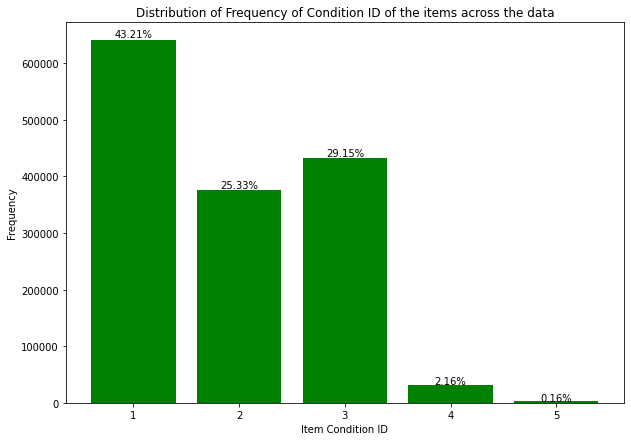

In [ ]:
# Creating a dictionary with condition ids as keys and their counts as values
count_item_cond = dict(train["item_condition_id"].value_counts())
# Getting the total number of items in the train data to calculate the percentages later on
total = len(train["item_condition_id"])

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='green',
             width = 0.8) 
plt.xlabel("Item Condition ID") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Condition ID of the items across the data")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*Thus, in this case, we can see that **majority** of the products have **condition levels less than 4** which is **"Fair"** and therefore are still in a good state.*

# **5. Shipping**

## 5.1. Univariate Analysis

The Shipping Column denotes whether the item's shipping charges have been beared by the seller or the buyer.

**"1"** : This category represents that the shipping charge has to be paid by the **seller**.

**"0"** : This category represents that the shipping charge has to be paid by the **buyer**.

In [ ]:
# Printing the frequency of the listing w.r.t. shipping id
train["shipping"].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

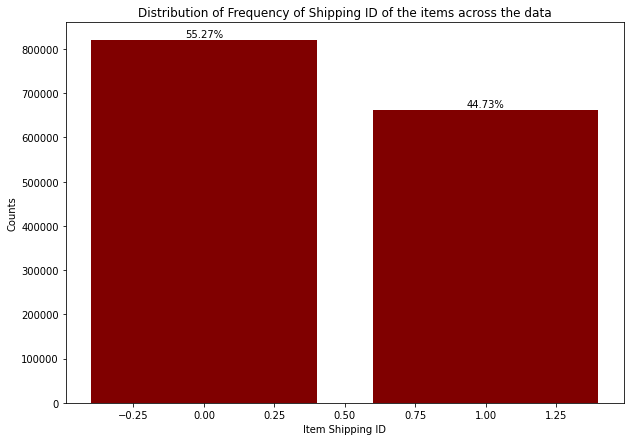

In [ ]:
# Creating a dictionary with shipping status as keys and their counts as values
count_item_cond = dict(train["shipping"].value_counts())
# Getting the total number of items in the train data to calculate the percentages later on
total = len(train["shipping"])

# Code to output barplot with respect to the above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='maroon',
             width = 0.8) 
plt.xlabel("Item Shipping ID") 
plt.ylabel("Counts") 
plt.title("Distribution of Frequency of Shipping ID of the items across the data")

# Code to print percentages of the frequency of shipping status w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')
plt.show()

*There is very **close difference** between the number of shipping charges paid by the seller(1) and those paid by the buyer(0), although the majority lies within the shipping charges paid by the buyer(0).*

## 5.2. Shipping vs Item_condition_id

In [ ]:
pd.crosstab(train['shipping'],train['item_condition_id'])

item_condition_id,1,2,3,4,5
shipping,,,,,
0,280107,232509,283691,21603,1525
1,360442,142970,148470,10359,859


*Since the products are still **New**(Item_condition_ID = 1) the **shipping charges have been beared by the Seller** for most of the listings. For other types of condition ids the shipping charges are to be paid by the buyer as it has the majority according to the numbers.*

*This can also suggest that most of the sellers might have an online market on Mercari where they **sell brand new products along with free shipping**.*

# **6. Brand name**

## 6.1. Univariate Analysis

In [ ]:
#Code to get the set of unique brand names
train_brands = list(train['brand_name'])
unique_brands = set(train_brands)
unique_brands = list(unique_brands)

print("Number of unique brand names :- \t\t{}".format(len(unique_brands)))
print("Number of datapoints with category NULL :- \t{}".format(train['brand_name'].isnull().sum()))
print("Total number of datapoints :- \t\t\t{}".format(len(train['brand_name'])))
print("Percentage of null data :- \t\t\t{}%".format((train['brand_name'].isnull().sum()*100)/(len(train['brand_name']))))

## 100 brands and others unknown

Number of unique brand names :- 		4810
Number of datapoints with category NULL :- 	632682
Total number of datapoints :- 			1482535
Percentage of null data :- 			42.67568725190299%


*There are a lot of missing datapoints in this column. **43% of the total** number of the datapoints in the column are a lot of **missing values** and so it should be worked on, to get achieve better results while modelling.*

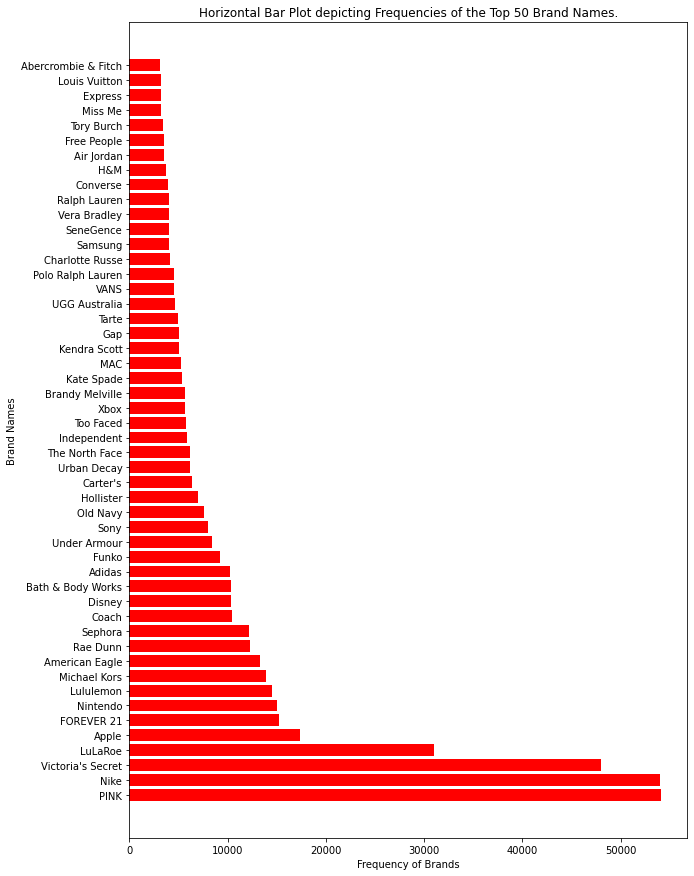

In [ ]:
# Getting the top 50 brands along with their frequencies
top_brands = train['brand_name'].value_counts()[:50]

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 15)) 
ax = plt.barh(list(top_brands.index),
             list(top_brands.values),
             color ='red') 
plt.xlabel("Frequency of Brands") 
plt.ylabel("Brand Names") 
plt.title("Horizontal Bar Plot depicting Frequencies of the Top 50 Brand Names.")

plt.show()

*With this graph we can see that the top brands in terms of frequency are **PINK, Nike, Victoria's Secret and LuLaRoe**.*

## 6.2. Missing Value Imputation

Let's see whether we can get the brand names from the item name and item descriptions of the listings and replace them with the Nan values.

In [ ]:
# Filling the Nan values in the column with the string value "NA"
train['filled_brand_name'] = train['brand_name'].fillna("NA")

**TO UNDERSTAND THE CODE GIVEN BELOW PLEASE GO THROUGH THIS MARKDOWN SECTION.**

The steps which are mentioned here have commented in the code as #STEP 1, #STEP 2 and so on.
Please go through the steps mentioned in this markdown and check the steps in the code accordingly.

***STEP 1 :*** 

Using the in-built function "Counter" which is present in the "collections" library package, we get the dictionary where the keys are the unique categories in the column and the values are the frequencies of those unique categories in that column.

The .most_common() function is used to set these keys in the dictionary in the descending order with respect to their frequencies.

Thus in this way the list **"temp"** is set in a descending order with repect to their frequencies.

I have created a list **"brands"** where the brands are present in this descending order and also a sanity check is performed as to whether the brands have been repeated or not.


***STEP 2 :***

There are brands which have one word and also the ones which have more than one word. In this step I have considered brands with more than one word. The variable **"brands_more_than_1_word"** have these brands with more than one word. Now, in this case, there are brands with apostrophe characters. For example, **"Victoria's Secret"** is a brand where an apostrophe character is present which is **'s**. Thus, for these brands I have replaced them with a whitespace so that it becomes **"Victoria Secret"**. When I had a detailed look at the data, some of the item descriptions had strings in the form of **"VictoriaSecret"** and thus I have included that in the loop as well. 

There are many brands with the character **"&"** as well. For example, one of them is **"Bath & Body works"**. Thus in this case I have replaced **"&"** with **"and"** as again some of the item descriptions had these present.ven in this case I replaced the spaces with empty spaces so that it becomes either **"Bath&Bodyworks"**, **"BathandBodyWorks"**, **"Bath Body works"**, **"Bath & Body works"** or **"Bath and Body works"**. 

Now in the final scenario there are some brands which have numbers and special characters too and also **©, ® and ™**. Thus for these brands I have used a regex expression which removes these and substitutes it with an empty space.

I had observed one thing is that brands named **"K & W"** and **"% Pure"** resulted in unnecessary missing values imputations with the combinations such as **"Pure"** and **"KW"** and **"K W"** and so I got rid of them.

These brands have been stored like a hashtable format in a dictionary where the keys are the brand names and the values are the preprocessed formats of the key. I have stored them in the variable **"final_brands_more_than_1_word"**.


***STEP 3 :***

Over here things might get a bit complicated. This step is to deal with words which have no whitespaces at all and so they are just one word. 

Based on my observations, there were 1478 brands out of the total 4809 brands which had frequencies less than 10. As those brands contain are very less majority, I considered them as a totally different brand section which I stored in the variable **"brands_with_one_word_junk"**. So from here on which ever variable which has the word **"junk"** in them are the brands with frequencies less than 10.

As seen in the first code cell output under 4.3 Brand Name section there were a total of 4810 brands. There was a category of "NA" which was a part of it too! And so I got rid of it by removing "NA" from the variable **"brand_with_one_word"**.

There are just around 10-12 brands with lengths equal to 2 and also their frequencies were just around 1 to 5 which isn't that great and so I had to ditch them. There was only one brand **"LG"** which I had to keep as it had a majority in the frequency and I have included it in the if condition accordingly.

Many brands had a hyphen in between. For example **"Fit-bit"** has been converted to **"Fitbit"** and **"Fit bit"**.

Many brands had the special character **"&"** in them but preprocessing them like I did in the STEP 2 didn't work out that well for me since many brands produced unnecessary imputations and so I commented them out. For example, there was this brand named **"H&M"** which produced **"H and M"**, **"H M"**, **"H&M"**, **"HM"** and **"H & M"**. As you can see they're pretty unnecessary and they produced false imputations. But to get rid of this problem I have written a BIG if condition where even if the brand has **"&"** it could be worked on with if the length of brand is above 2 when the variable **"&"** is substituted with an empty space. For example, **"AT&T"** has more than 2 characters when **"&"** is removed since it becomes **"ATT"**.

These brands have been stored like a hashtable format in a dictionary where the keys are the brand names and the values are the preprocessed formats of the key. I have stored them in the variable **"final_brands_with_1_word"**.

Finaly I replaced the punctutations with a whitespace in the last step of this step's iteration. Even in this case the condition has been used to check whether the length is above 3 instead of 2 since **"H&M"** becomes **"H M"** which has a length of 3 and should be rejected. Since including a whitespace suggests that the brand name has more that 1 word, I have included the in a separate variable named **"final_brands_with_1_word_extra"**.


***STEP 4 :***

In this step, since the brands in this step have the same characteristics as present in the STEP 2, same preprocessing steps have been considered. The only main difference is that the variable names are **"final_brands_with_1_word_junk"** and **"final_brands_with_1_word_junk_extra"** instead of **"final_brands_with_1_word"** and **"final_brands_with_1_word_extra"**.


***STEP 5 :***

In this step I have printed all the numbers which denote the number of keys in the dictionaries I have created.

***STEP 6 :***

In this step, I have replaced all the null values in the item description with a constant string **"No description yet."** since they cannot be manipulated like brands. 

Also I have merged the item name with the item description to make the searching faster.


***STEP 7 :***

Here, I have created to lists wherein one will have strings with punctuations and the other with no punctutations at all and replacing them with a whitespace to carry out an in depth search in the future. I have accordinglyl created variables namely **"all_text"** and **"all_text_no_punc"**.

***STEP 8 :***

I have printed the sample text from the two variables as created in STEP 7.

***STEP 9 :***

FINALLY I have returned all the preprocessed brands and text.


**PLEASE NOTE** - I have converted all the brands and text to lowercase to make the search faster and more practically possible. Also I have used a dictionary ormat for every brand since it makes the execution more fast and optimized.

In [ ]:
def prep_up(train):
  
  #====================STEP 1====================

  # Setting the brands in the descending order in the list
  temp = [item for items, c in Counter(list(train['filled_brand_name'])).most_common() for item in [items] * c]

  # intilize a null list
  brands = [] 
 
  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in brands:
      brands.append(x)

  #====================STEP 2====================

  # Creating the variable to store brands with more than one word.
  brands_more_than_1_word = [i for i in brands if len(i.split()) > 1]

  #Initializing the dictionary to store the original brand name as keys and the preprocessed versions of them as value in the form of a list
  final_brands_more_than_1_word = {}
  
  #Taking into consideration all special combinations of special chars as possible
  special_chars = ["\'m","n\'t","\'re","\'s","\'d","\'ll","\'t","\'ve"]
  #For every brand in brands more than one word
  for brand in tqdm(brands_more_than_1_word):
    #Initializing a temporary list to append them as a value in the final_brands_more_than_1_word with brands as keys
    brand_values = []
    for specs in special_chars:
      #Checking if those special combinations are present
      if specs in brand:
        #if the combination is present then substitute it white an empty space and append the lowercase version of it to the temporary list brand_values
        temp_brand = re.sub(specs, "", brand)
        brand_values.append(temp_brand.lower())
        #Replace the spaces with empty space as even that could be helpful
        brand_values.append(temp_brand.replace(" ","").lower())
        #If & is present in the brand which had those special combinations above then replace it with "and" and append the lowercase version of it 
        if "&" in brand:
          temp_brand = brand.replace("&","and")
          brand_values.append(temp_brand.lower())
    #If & is present in the brand which didn't have or had those special combinations above then replace it with "and" and append the lowercase version of it
    if "&" in brand:
      temp_brand = brand.replace("&","and")
      brand_values.append(temp_brand.lower())
      # Also append the version which has no spaces in them
      brand_values.append(temp_brand.replace(" ","").lower())
    #Append the lowercase version of the original string
    brand_values.append(brand.lower())
    #Append the lowercase version of the original string without whitespaces
    brand_values.append(brand.replace(" ","").lower())
    #Replace the chars other than alphanumeric with empty space and append it
    if brand.lower() != re.sub('[^a-zA-Z0-9 *]', '', brand.lower()):
      temp = " ".join(re.sub('[^a-zA-Z0-9 *]', '', brand.lower()).split())
      brand_values.append(temp)
      #Also append the version which doesn't has whitespaces in temporary list brand_values
      brand_values.append(temp.replace(" ",""))
    #Finally append the key as brand and value has the temporary list to the dictionary
    final_brands_more_than_1_word[brand] = brand_values  

  #Getting rid of some combinnations which is explained in the markdown above
  del final_brands_more_than_1_word["K & W"][4:]
  del final_brands_more_than_1_word["% Pure"][2:]

  #====================STEP 3====================

  #Creating the variable to store brands with one word.
  brands_with_1_word = [i for i in brands if len(i.split()) == 1]
  temp_brands_with_1_word = []
  
  # Initializing list which consists of brands with one word but with frequencies less than 10 in the dataset.
  brands_with_1_word_junk = []
  for i in tqdm(range(len(brands_with_1_word))):
    if list(train['filled_brand_name']).count(brands_with_1_word[i]) > 10:
      temp_brands_with_1_word.append(brands_with_1_word[i])
    else:
      brands_with_1_word_junk.append(brands_with_1_word[i])
  
  #Recreating the variable to store brands with one word but with frequencies less than 10 in the dataset..
  brands_with_1_word = temp_brands_with_1_word
  #Removing NA as it is of no use
  brands_with_1_word.remove('NA')
  
  # Creating a dictionary same as above to append the keys as brands and values as lists of the preprocessed versions of those brands
  final_brands_with_1_word = {}
  # Creating a to append the keys as brands and values as lists of the derived verions of "brands with one word" with more thn one word.
  final_brands_with_1_word_extra = {}
  for brand in tqdm(brands_with_1_word):
    #Checking if the length of the brand is above 2 except for the brand 'LG'
    if len(brand)>2 or brand=="LG":
      #Initializing a temporary list just like in Step 2
      brand_values = []
      # This loop does the same thing as done in step 2
      for specs in special_chars:
        if specs in brand:
          temp_brand = re.sub(specs, "", brand)
          brand_values.append(temp_brand.lower())
      if brand=='Style&co.':
        temp_brand = re.sub("\s*&\s*"," and ", brand)
        final_brands_with_1_word_extra[brand] = [temp_brand.lower(), temp_brand.replace('.','').lower()]
      brand_values.append(brand.lower())
      # Even in this case it's the same as step 2 except to check whether the length of the string after removal of special characters in more than 2 or not
      if brand.lower() != re.sub('[^a-zA-Z0-9 *]', '', brand.lower()) and (len(re.sub('[^a-zA-Z0-9 *]', '', brand.lower()))>2 or any(i.isdigit() for i in re.sub('[^a-zA-Z0-9 *]', '', brand.lower()))):
        brand_values.append(" ".join(re.sub('[^a-zA-Z0-9 *]', '', brand.lower()).split()))
      punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~©®™'''
      no_punct = ""
      # Even this has the same functuality as mentioned in step 2 except for that if there are words more than 1 then append it to final_brands_with_1_word_extra
      for char in brand:
        if char not in punctuations:
          no_punct = no_punct + char
        else:
          no_punct = no_punct + " "
      if len(no_punct.split())>1 and len(" ".join(no_punct.split()))>3:
        if brand != 'Style&co.':
          final_brands_with_1_word_extra[brand] = [(" ".join(no_punct.split())).lower()]
      #Finally key=brand and value=temporary list with all the preprocessed versions of that brand
      final_brands_with_1_word[brand] = brand_values

  #====================STEP 4====================

  # Everything is the same here as that of STEP 3 that's why ignored commenting everything
  # The only difference is that these are the brands with one word and frequencies less than 10.
  final_brands_with_1_word_junk = {}
  final_brands_with_1_word_junk_extra = {}
  for brand in tqdm(brands_with_1_word_junk):
    if len(brand)>2 or brand=="LG":
      brand_values = []
      for specs in special_chars:
        if specs in brand:
          temp_brand = re.sub(specs, "", brand)
          brand_values.append(temp_brand.lower())
      if brand=='Pull&Bear':
        temp_brand = re.sub("\s*&\s*"," and ", brand)
        final_brands_with_1_word_junk_extra[brand] = [temp_brand.lower()]
      brand_values.append(brand.lower())
      if brand.lower() != re.sub('[^a-zA-Z0-9 *]', '', brand.lower()) and (len(re.sub('[^a-zA-Z0-9 *]', '', brand.lower()))>2 or any(i.isdigit() for i in re.sub('[^a-zA-Z0-9 *]', '', brand.lower()))):
        brand_values.append(" ".join(re.sub('[^a-zA-Z0-9 *]', '', brand.lower()).split()))
      punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~©®™'''
      no_punct = ""
      for char in brand:
        if char not in punctuations:
          no_punct = no_punct + char
        else:
          no_punct = no_punct + " "
      if len(no_punct.split())>1 and len(" ".join(no_punct.split()))>3:
        if brand != 'Pull&Bear':
          final_brands_with_1_word_junk_extra[brand] = [(" ".join(no_punct.split())).lower()]
      final_brands_with_1_word_junk[brand] = brand_values
  final_brands_with_1_word_junk['All'] = final_brands_with_1_word['All']
  #Getting rid of "All" key as it created unnecessary imputations
  del final_brands_with_1_word['All'] 
  del final_brands_with_1_word_junk_extra['AT&T'] 
  del final_brands_with_1_word_junk['AT&T'][1]
  # I realized that "AND", "Ask" and "All" resulted in unnecessary imputations and so I got rid of them.
  # Since their frequencies are less than 10 as well, it's better to get rid of them.
  del final_brands_with_1_word_junk["AND"]
  del final_brands_with_1_word_junk["Ask"]
  del final_brands_with_1_word_junk["All"]

  #====================STEP 5====================
  print("\n\nNumber of brands with more than one word : ",len(brands_more_than_1_word))
  count_final_brands_more_than_1_word = 0
  for k,v in final_brands_more_than_1_word.items():
    count_final_brands_more_than_1_word = count_final_brands_more_than_1_word + len(v)
  print("Number of all preprocessed brands with more than 1 word : ", count_final_brands_more_than_1_word)

  print("\n\nNumber of brands with one word : ",len(brands_with_1_word))
  count_final_brands_with_1_word = 0
  for k,v in final_brands_with_1_word.items():
    count_final_brands_with_1_word = count_final_brands_with_1_word + len(v)
  print("Number of all preprocessed brands with 1 word : ", count_final_brands_with_1_word)

  count_final_brands_with_1_word_extra = 0
  for k,v in final_brands_with_1_word_extra.items():
    count_final_brands_with_1_word_extra = count_final_brands_with_1_word_extra + len(v)
  print("Number of all preprocessed brands generated from brands with 1 word : ", count_final_brands_with_1_word_extra)

  print("\n\nNumber of brands with one word with frequencies below 10 : ",len(brands_with_1_word_junk))
  count_final_brands_with_1_word_junk = 0
  for k,v in final_brands_with_1_word_junk.items():
    count_final_brands_with_1_word_junk = count_final_brands_with_1_word_junk + len(v)
  print("Number of all preprocessed brands with 1 word with frequencies below 10 : ", count_final_brands_with_1_word_junk)

  count_final_brands_with_1_word_junk_extra = 0
  for k,v in final_brands_with_1_word_junk_extra.items():
    count_final_brands_with_1_word_junk_extra = count_final_brands_with_1_word_junk_extra + len(v)
  print("Number of all preprocessed brands generated from brands with 1 word with frequencies below 10 : ", count_final_brands_with_1_word_junk_extra)

  total = count_final_brands_with_1_word+count_final_brands_more_than_1_word+count_final_brands_with_1_word_extra+count_final_brands_with_1_word_junk+count_final_brands_with_1_word_junk_extra
  print("\nIn all, there are {} preprocessed brands to deal with.\n".format(total))

  # STEP 6
  train["item_description"] = train["item_description"].fillna(value="No description yet.")
  all_text = train['name']+" "+train['item_description']

  # STEP 7
  #define punctuation
  all_text_no_punc = []
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~©®™'''
  for i in tqdm(range(len(all_text))):
    no_punct = ""
    for char in all_text[i]:
      if char not in punctuations:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + " "
    #Appending the text version with no punctuations
    all_text_no_punc.append((" ".join(no_punct.split())).lower())
    #Appending the text version with punctuations
    all_text[i] = all_text[i].lower()

  # STEP 8
  print("\n\nSample text with no punctuation : ",all_text_no_punc[1])
  print("\nSample text with punctuation : ",all_text[1])

  # STEP 9
  return final_brands_more_than_1_word, final_brands_with_1_word, final_brands_with_1_word_extra, final_brands_with_1_word_junk, final_brands_with_1_word_junk_extra, all_text, all_text_no_punc

In [ ]:
brands_more_than_1_word, brands_with_1_word, brands_with_1_word_extra, brands_with_1_word_junk, brands_with_1_word_junk_extra, all_text, all_text_no_punc = prep_up(train)

100%|██████████| 1478/1478 [00:00<00:00, 186598.68it/s]




Number of brands with more than one word :  2426
Number of all preprocessed brands with more than 1 word :  5811


Number of brands with one word :  905
Number of all preprocessed brands with 1 word :  966
Number of all preprocessed brands generated from brands with 1 word :  45


Number of brands with one word with frequencies below 10 :  1478
Number of all preprocessed brands with 1 word with frequencies below 10 :  1566
Number of all preprocessed brands generated from brands with 1 word with frequencies below 10 :  66

In all, there are 8454 preprocessed brands to deal with.



100%|██████████| 1482535/1482535 [01:07<00:00, 21972.82it/s]



Sample text with no punctuation :  razer blackwidow chroma keyboard this keyboard is in great condition and works like it came out of the box all of the ports are tested and work perfectly the lights are customizable via the razer synapse app on your pc

Sample text with punctuation :  razer blackwidow chroma keyboard this keyboard is in great condition and works like it came out of the box. all of the ports are tested and work perfectly. the lights are customizable via the razer synapse app on your pc.


In [ ]:
# I have merged the brands_more_than_1_word and brands_with_1_word_extra(derived from brands with 1 word) to make the searching more fast
merge_brands_more_than_1_word = {}

for k,v in brands_more_than_1_word.items():
  merge_brands_more_than_1_word[k] = v

for k,v in brands_with_1_word_extra.items():
  merge_brands_more_than_1_word[k] = v

**THIS IS WHERE THE MISSING VALUE IMPUTATION TAKES PLACE IN THE CODE CELL GIVEN BELOW. PLEASE GO THROUGH THIS MARKDOWN FOR A DETAILED EXPLANATION.**


Firstly this isn't very complex to understand if you've completely understood the preprocessing steps as mentioned above. Here, I have performed string comparison operation in order considering the priority to be given to the right brands and the type of pre processed brands.

***STEP 1 :***

According to my observations the highest priority  was to be given to the brands with more than one word. I have merged the dictionaries **"brands_more_than_1_word"** and the derived **"brands_with_1_word_extra"** from **"brands_with_1_word"** in the above cell into the dictionary **"merge_brands_more_than_1_word"**. In this case I'm just checking whether the strings in list present in every value in every key value pair in the **"merge_brands_more_than_1_word"** are present in **"all_text"** and **"all_text_no_punc"**.


***STEP 2 :***

The second priority was to be given to the brands with one word. In this case I have split the **"all_text"** and **"all_text_no_punc"** with respect to whitespaces and then compared every word in the value in every key value pair in
**"brands_with_1_word"** with those splitted words.

***STEP 3 :***

It's just the same as STEP 1 except that it's now **"brands_with_1_word_junk_extra"** instead of **"merge_brands_more_than_1_word"**.


***STEP 4 :***

It's just the same as STEP 2 except that it's now **"brands_with_1_word_junk"** instead of **"brands_with_1_word"**.

In [ ]:
def missing_values_compute(train_brand_name):

  # **********IMPUTATION STARTS HERE**********
  
  for counter in tqdm(range(len(train_brand_name))):
    #====================================
    # STEP 1
    #====================================

    # merge_brands_more_than_1_word --- text with punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in merge_brands_more_than_1_word.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text[counter]:
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break
        
    if train_brand_name[counter] != "NA":
      continue

    # merge_brands_more_than_1_word --- text with no punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in merge_brands_more_than_1_word.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text_no_punc[counter]:
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

    if train_brand_name[counter] != "NA":
      continue

    #====================================
    # STEP 2
    #====================================

    # brands_with_1_word --- text with punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text[counter].split():
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

    if train_brand_name[counter] != "NA":
      continue

    #brands_with_1_word --- text with no punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text_no_punc[counter].split():
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

    if train_brand_name[counter] != "NA":
      continue

    #====================================
    # STEP 3
    #====================================

    #brands_with_1_word_junk_extra --- text with punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word_junk_extra.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text[counter]:
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break
        
    if train_brand_name[counter] != "NA":
      continue

    # brands_with_1_word_junk_extra --- text with no punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word_junk_extra.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text_no_punc[counter]:
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

    if train_brand_name[counter] != "NA":
      continue

    #====================================
    # STEP 4
    #====================================

    # brands_with_1_word_junk --- text with punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word_junk.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text[counter].split():
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

    if train_brand_name[counter] != "NA":
      continue

    #brands_with_1_word_junk --- text with no punctuation
    if train_brand_name[counter] == "NA":
      count = 0
      for brand, preprocessed_brands in brands_with_1_word_junk.items():
        for preprocessed_brand in preprocessed_brands:
          if preprocessed_brand in all_text_no_punc[counter].split():
            train_brand_name[counter] = brand
            count = 1
            break
        if count>0:
          break

  return train_brand_name

In [ ]:
brand_name_column = train['filled_brand_name']
train_brand_name = missing_values_compute(brand_name_column)

100%|██████████| 1482535/1482535 [5:57:21<00:00, 69.14it/s]


In [ ]:
# Printing the number of NA yet present have imputation
list(train_brand_name).count("NA")

238448

In [ ]:
#Creating a new column with the imputed brands
train['filled_brand_name'] = train_brand_name

This is the horizontal bar graph for the top 50 brands after the imputation

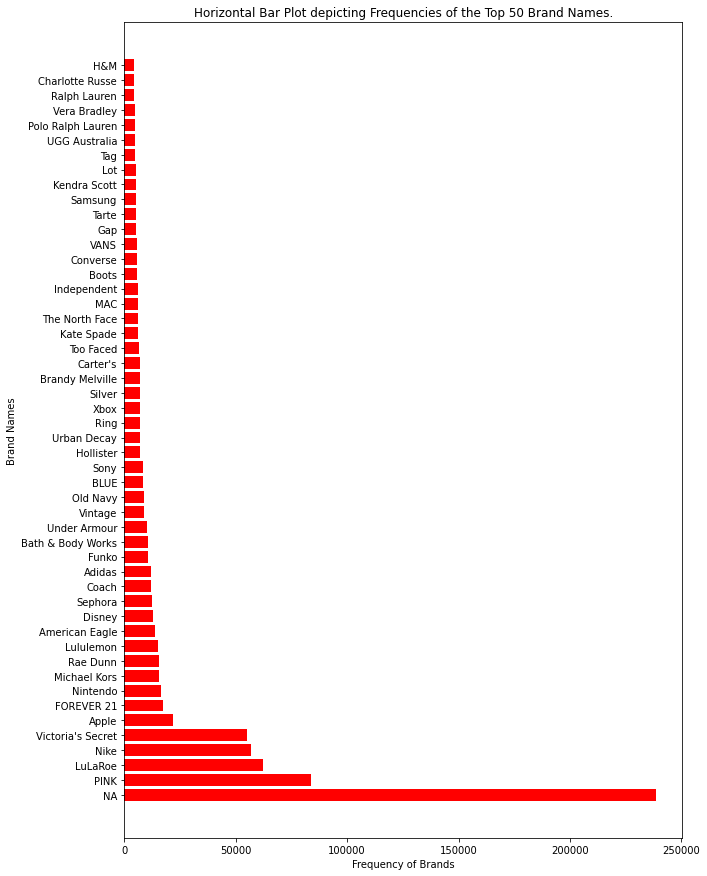

In [ ]:
# Getting the top 50 brands along with their frequencies after imputation
top_brands = train['filled_brand_name'].value_counts()[:50]

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 15)) 
ax = plt.barh(list(top_brands.index),
             list(top_brands.values),
             color ='red') 
plt.xlabel("Frequency of Brands") 
plt.ylabel("Brand Names") 
plt.title("Horizontal Bar Plot depicting Frequencies of the Top 50 Brand Names.")

plt.show()

You can have a look at the part of dataframes printed below and I thereby conclude that the imputation has worked pretty good even if it's not the best!

In [ ]:
train.head(60)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,filled_brand_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,MLB
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Target
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,NA
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Complete
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Banana Republic
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Acacia Swimwear
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Soffe
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Nike
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,HEAD


In [ ]:
train.tail(60)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,filled_brand_name
1482475,1482475,VS SMALL BIKINI BOTTOM NWT,1,Women/Swimwear/Two-Piece,Victoria's Secret,33.0,0,I DO COMBINE SHIPPING LET'S BUNDLE!!! NEW WITH...,Victoria's Secret
1482476,1482476,Versace Yellow Diamond Mini,1,Beauty/Fragrance/Women,Sephora,8.0,1,This is a 0.17oz mini splash on perfume. No bo...,Sephora
1482477,1482477,Orangetheory Heart rate Monitor Xs/s,1,Sports & Outdoors/Exercise/Fitness accessories,NaN,39.0,1,Brand new in box. Orange theory Heart rate Mon...,Theory
1482478,1482478,Large Wax Warmer,3,Home/Home Décor/Home Fragrance,NaN,14.0,0,"Works excellent! 6 1/2"" high x 5"" round. Beaut...",NA
1482479,1482479,Jr girls shoes,2,Women/Shoes/Sandals,l.e.i.,8.0,1,Size 7.5 and 7/8. Black pair are LEI worn mayb...,l.e.i.
1482480,1482480,Mary kay botanical effects,1,Beauty/Skin Care/Face,Mary Kay,19.0,0,Comes with the entire set! Dry/ sensitive skin...,Mary Kay
1482481,1482481,Cherry Blossom Perfume (B&BW),1,Beauty/Skin Care/Body,Bath & Body Works,10.0,1,"-new, just bought -shipping is included -bough...",Bath & Body Works
1482482,1482482,Ankle boots size 6.5,2,Women/Shoes/Boots,FOREVER 21,31.0,0,Worn once but didn't like how they fit me.,FOREVER 21
1482483,1482483,Bath & Body Works for LebonGirl,1,Beauty/Skin Care/Body,Bath & Body Works,9.0,0,Bath and Bodyworks,Bath & Body Works
1482484,1482484,Mac studio fix powder,1,Beauty/Makeup/Face,MAC,20.0,1,Mac studio fix powder in Nc30 new with sponge ❤️,MAC


In [ ]:
# Saving the imputed version of csv 
train.to_csv('/content/drive/My Drive/mercari data/final_train_brands_updated.csv') 

## 6.3. Brands vs (Item_condition_id and Shipping)

Now let's read the updated dataset and analyze with some categorical features.

In [2]:
import pandas as pd
# Reading the new updated dataset
train = pd.read_csv("/content/drive/My Drive/mercari data/final_train_brands_updated.csv")
del train['Unnamed: 0']
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,filled_brand_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,MLB
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Target
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,NaN
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Complete


In [3]:
brands_with_condition_id_1 = []
brands_with_condition_id_2 = []
brands_with_condition_id_3 = []
brands_with_condition_id_4 = []
brands_with_condition_id_5 = []

brands_with_shipping_0 = []
brands_with_shipping_1 = []

brands_with_condition_id_1_shipping_0 = []
brands_with_condition_id_1_shipping_1 = []
brands_with_condition_id_5_shipping_0 = []
brands_with_condition_id_5_shipping_1 = []

def create_and_print_top_15_brands(list_of_brands, index_of_nan):
  # Setting the brands in descending order based on frequency
  temp = [item for items, c in Counter(list_of_brands).most_common() for item in [items] * c]
  # intilize a null list
  list_of_brands = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_brands:
      list_of_brands.append(x)

  if index_of_nan != -1:
    del list_of_brands[index_of_nan]
  
  if len(list_of_brands)>=15:  
    for i in range(15):
      print(list_of_brands[i])
  else:
    for i in list_of_brands:
      print(i)

for i in range(len(train['item_condition_id'])):
  if train['item_condition_id'][i] == 1:
    brands_with_condition_id_1.append(train['filled_brand_name'][i])
  elif train['item_condition_id'][i] == 2:
    brands_with_condition_id_2.append(train['filled_brand_name'][i])
  elif train['item_condition_id'][i] == 3:
    brands_with_condition_id_3.append(train['filled_brand_name'][i])
  elif train['item_condition_id'][i] == 4:
    brands_with_condition_id_4.append(train['filled_brand_name'][i])
  elif train['item_condition_id'][i] == 5:
    brands_with_condition_id_5.append(train['filled_brand_name'][i])

for i in range(len(train['shipping'])):
  if train['shipping'][i]==0:
    brands_with_shipping_0.append(train['filled_brand_name'][i])
  elif train['shipping'][i]==1:
    brands_with_shipping_1.append(train['filled_brand_name'][i])

for a,b in zip(brands_with_condition_id_1,brands_with_shipping_0):
  if a==b:
    brands_with_condition_id_1_shipping_0.append(a)

for a,b in zip(brands_with_condition_id_1,brands_with_shipping_1):
  if a==b:
    brands_with_condition_id_1_shipping_1.append(a)

for a,b in zip(brands_with_condition_id_5,brands_with_shipping_0):
  if a==b:
    brands_with_condition_id_5_shipping_0.append(a)

for a,b in zip(brands_with_condition_id_5,brands_with_shipping_1):
  if a==b:
    brands_with_condition_id_5_shipping_1.append(a)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 15 brands based on frequency with item_condition_id = 1 are : ")
create_and_print_top_15_brands(brands_with_condition_id_1,0)
print("\nTop 15 brands based on frequency with item_condition_id = 2 are : ")
create_and_print_top_15_brands(brands_with_condition_id_2,0)
print("\nTop 15 brands based on frequency with item_condition_id = 3 are : ")
create_and_print_top_15_brands(brands_with_condition_id_3,0)
print("\nTop 15 brands based on frequency with item_condition_id = 4 are : ")
create_and_print_top_15_brands(brands_with_condition_id_4,0)
print("\nTop 15 brands based on frequency with item_condition_id = 5 are : ")
create_and_print_top_15_brands(brands_with_condition_id_5,1)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 15 brands based on frequency where shipping charges are paid by the buyer are : ")
create_and_print_top_15_brands(brands_with_shipping_0,0)
print("\nTop 15 brands based on frequency where shipping charges are paid by the seller are : ")
create_and_print_top_15_brands(brands_with_shipping_1,0)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 15 brands based on frequency where shipping charges are paid by the seller and item condition id is 1 are : ")
create_and_print_top_15_brands(brands_with_condition_id_1_shipping_1,-1)
print("\nTop 15 brands based on frequency where shipping charges are paid by the buyer and item condition id is 1 are : ")
create_and_print_top_15_brands(brands_with_condition_id_1_shipping_0,-1)
print("\nTop 15 brands based on frequency where shipping charges are paid by the seller and item condition id is 5 are : ")
create_and_print_top_15_brands(brands_with_condition_id_5_shipping_1,-1)
print("\nTop 15 brands based on frequency where shipping charges are paid by the buyer and item condition id is 5 are : ")
create_and_print_top_15_brands(brands_with_condition_id_5_shipping_0,-1)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 15 brands based on frequency with item_condition_id = 1 are : 
LuLaRoe
PINK
Victoria's Secret
Rae Dunn
Nike
Apple
Sephora
Bath & Body Works
Funko
Disney
Michael Kors
Ring
Too Faced
Independent
Urban Decay

Top 15 brands based on frequency with item_condition_id = 2 are : 
PINK
Nike
LuLaRoe
Victoria's Secret
FOREVER 21
Lululemon
American Eagle
Michael Kors
Apple
Nintendo
Adidas
Under Armour
Coach
Disney
Sony

Top 15 brands based on frequency with item_condition_id = 3 are : 
Nike
PINK
Victoria's Secret
Nintendo
LuLaRoe
American Eagle
Lululemon
Coach
FOREVER 21
Michael Kors
Apple
Vintage
Under Armour
Adidas
Old Navy

Top 15 brands based on frequency with item_condition_id = 4 are : 
Nike
PINK
Apple
Coach
Nintendo
Victoria's Secret
Michael Kors
Vintage
UGG Australia
Converse
Air Jordan
LuLaRoe
Lululemon
Louis Vuitton
VANS

Top 15 brands based on frequency with item_condition_id = 5 are : 
Apple
Nintendo
Sony
Samsung
Nike
Vintage
Xbox

*Having a look at top 15 brands for every combinations with the categories, here are some useful insights :*



1.   *It looks like most of the **fashion based brands are brand new** since the condition id is 1. Therefore, in the category where the shipping charges are paid by the buyer as well as the seller and the item condition id is the best which is 1, we can see a lot of fashion based brands in majority.*
2.   *Similarly, most of the **Electronics based brands have the least quality** since condition id is 5. Therefore, in the category where the shipping charges are paid by the buyer as well as the seller and the item condition id is the least which is 5, we can see brands such as Apple, Nintendo, Sony and Xbox as a majority.*



Let's convert the string based brands to numbers for further analysis.

In [4]:
# Converting the strings to numerical categorical data for multivariate analysis.
train["brand_name_codes"] = train["filled_brand_name"].astype('category').cat.codes

# **7. Category Name**

## 7.1. Univariate Analysis

In [5]:
#Code to get the set of unique category types
train_cats = list(train['category_name'])
unique_cats = set(train_cats)
unique_cats = list(unique_cats)

print("Number of unique categories along with their main sub-categories and sub-categories :   {}".format(len(unique_cats)))
print("Number of datapoints with category NULL : \t\t\t\t\t\t{}".format(train['category_name'].isnull().sum()))
print("Total number of datapoints : \t\t\t\t\t\t\t\t{}".format(len(train['category_name'])))
print("Percentage of null data : \t\t\t\t\t\t\t\t{}%".format((train['category_name'].isnull().sum()*100)/(len(train['category_name']))))

Number of unique categories along with their main sub-categories and sub-categories :   1288
Number of datapoints with category NULL : 						6327
Total number of datapoints : 								1482535
Percentage of null data : 								0.42676901388500105%


*In this case there are only **0.42% of the total datapoints** which have **NULL values** which is better with respect to the Brand Names' column.*

Let's replace the null values in the column with a constant string 'NA' and split the categories into different columns.

In [6]:
# Replacing the NULL values with a string
train['category_name'].fillna(value="NA",inplace=True)

In [7]:
# There are 3 categories per Category Name in the data.
# The format of the category is : main_category/main_sub_category/sub_category
# So I have created 3 lists to split them with respect to the punctuation '/'.

# This is the code to create lists of main and its sub-categories

categories = list(train['category_name'])
main_category = []
main_sub_category = []
sub_category = []

for i in categories:
  if not i=="NA":
    temp = i.split('/')
    main_category.append(temp[0])
    main_sub_category.append(temp[1])
    sub_category.append(temp[2])
  else:
    main_category.append("NA")
    main_sub_category.append("NA")
    sub_category.append("NA")

## 7.2. Main Category

### 7.2.1. Univariate Analysis

In [8]:
# Printing the first 10 Main Categories as per the dataset
main_category[:10]

['Men',
 'Electronics',
 'Women',
 'Home',
 'Women',
 'Women',
 'Women',
 'Sports & Outdoors',
 'Sports & Outdoors',
 'Vintage & Collectibles']

In [9]:
# Printing the Frequencies of the Main Categories
print("There are {} unique Main Categories\n".format(len(Counter(main_category))))
print("The unique Main categories along with their counts : ")
Counter(main_category)

There are 11 unique Main Categories

The unique Main categories along with their counts : 


Counter({'Beauty': 207828,
         'Electronics': 122690,
         'Handmade': 30842,
         'Home': 67871,
         'Kids': 171689,
         'Men': 93680,
         'NA': 6327,
         'Other': 45351,
         'Sports & Outdoors': 25342,
         'Vintage & Collectibles': 46530,
         'Women': 664385})

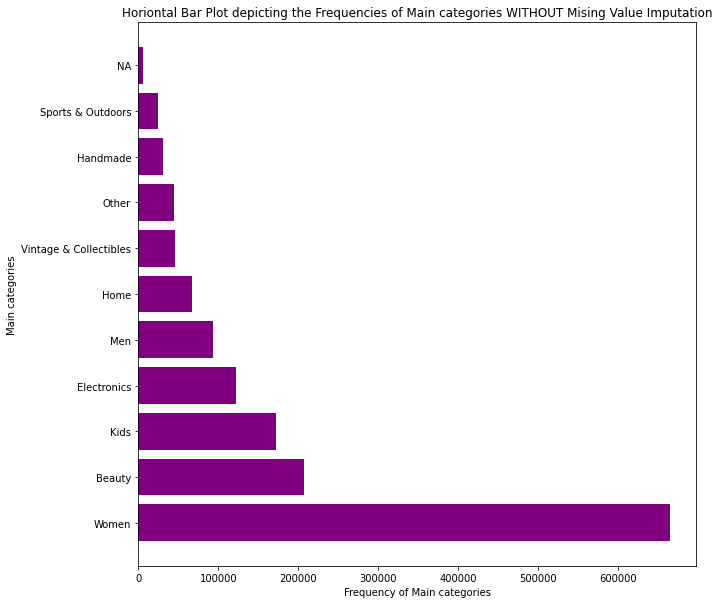

In [10]:
# Getting the Main Categories along with their frequencies
temp = dict(Counter(main_category))
data_dict = {"main_cat":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 10)) 
ax = plt.barh(df_sorted_desc['main_cat'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Main categories") 
plt.ylabel("Main categories") 
plt.title("Horiontal Bar Plot depicting the Frequencies of Main categories WITHOUT Mising Value Imputation")

plt.show()

*Thus we can se that there are a **majority** of **Women-Based Listings**.*

### 7.2.2. Missing value Imputation.

Let's try to fill in the missing values in main categories

In [11]:
# This code creates a dictionary where key represents the actual category and the value represents preprocessed versions of it in the form of a list.

#Getting unique categories 
temp_unique_categories = dict(Counter(main_category))
unique_categories = {}

#for each key in unique categories
for k,v in temp_unique_categories.items():
  # This step is to et rid of NA category since it isn't useful
  if k!= 'NA':
    #if there's only one word in the category the append the lowercase version of it
    if len(k.split())<2:
      unique_categories[k] = [k.lower()]
    else:
      temp_cats = []
      for i in k.split():
        # Replace "&" with "and" are create useful versions just as it had been done while preprocessing brands.
        if i != '&':
          temp_cats.append(i.lower())
      temp_cats.append(k.replace(" ",""))
      temp_cats.append(re.sub("\s*&\s*"," and ",k))
      unique_categories[k] = temp_cats

unique_categories

{'Beauty': ['beauty'],
 'Electronics': ['electronics'],
 'Handmade': ['handmade'],
 'Home': ['home'],
 'Kids': ['kids'],
 'Men': ['men'],
 'Other': ['other'],
 'Sports & Outdoors': ['sports',
  'outdoors',
  'Sports&Outdoors',
  'Sports and Outdoors'],
 'Vintage & Collectibles': ['vintage',
  'collectibles',
  'Vintage&Collectibles',
  'Vintage and Collectibles'],
 'Women': ['women']}

In [12]:
# Prepping the text data by merging the item name with item desription and then converting it to lowercase
train["item_description"] = train["item_description"].fillna(value="No description yet.")
all_text = train['name']+" "+train['item_description']
for i in range(len(all_text)):
  all_text[i] = all_text[i].lower()

In [13]:
#Missing value imputation of main categories starts here
for i in tqdm(range(len(main_category))):
  if main_category[i] == 'NA':
    count = 0
    for k,v in unique_categories.items():
      for cat in v:
        if cat in all_text[i]:
          main_category[i] = k
          count = 1
          break
      if count>0:
        break

100%|██████████| 1482535/1482535 [00:00<00:00, 1700321.75it/s]


In [14]:
print("Number of NA values in Main categories is",main_category.count("NA"))

Number of NA values in Main categories is 5122


*Thus the count has reduced from **6327** to **5122** of NA values in Main category and hence we could **consider NA as a separate category**.*

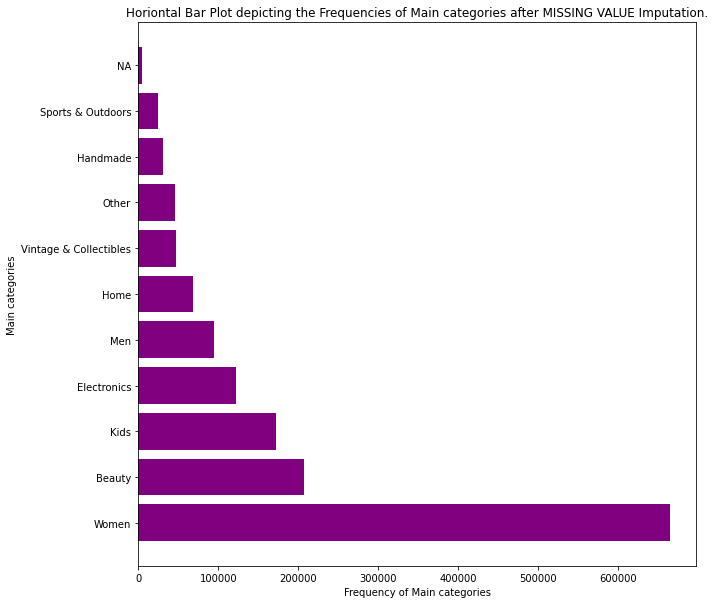

In [15]:
# Getting the Main Categories along with their frequencies
temp = dict(Counter(main_category))
data_dict = {"main_cat":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 10)) 
ax = plt.barh(df_sorted_desc['main_cat'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Main categories") 
plt.ylabel("Main categories") 
plt.title("Horiontal Bar Plot depicting the Frequencies of Main categories after MISSING VALUE Imputation.")

plt.show()

*Even after the **mising value Imputation** there is **no change** in this graph as seen before.*

### 7.2.3. Main Category vs (Item_condition_id and Shipping)

Let's gain some insights with respect to the item condition ids and shipping.

In [16]:
# Contingency Table
train["filled_main_category"] = main_category
table = pd.crosstab(train['filled_main_category'],[train['shipping'],train['item_condition_id']])
table

shipping                     0                         ...      1                  
item_condition_id            1       2       3      4  ...      2      3     4    5
filled_main_category                                   ...                         
Beauty                   51321   15349   13531    907  ...  15110  12148   769   32
Electronics              12929   15318   19855   2158  ...  12566  17863  1542  441
Handmade                  5622    2988    3100    251  ...   2908   1901   135    6
Home                     30180    9298    8649    516  ...   3320   2646   122    9
Kids                     28547   23114   46454   3230  ...  15547  23979  1587   60
Men                      15438   17959   25708   2634  ...   8052   9773   877   47
NA                         943    1208    1019     84  ...    595    386    34    3
Other                    10746    4805    5154    441  ...   3232   3427   277   19
Sports & Outdoors         5287    3681    4762    388  ...   2049   2135   170    3
Vintage & Collectibles    7345    4957    7440    843  ...   7206   6924   708   80
Women                   111749  133832  148019  10151  ...  72385  67288  4138  159

[11 rows x 10 columns]

*In majority of the cases, the counts of categories is **greater** for the scenario where the shipping charges are **paid by the seller(Shipping = 1)**.*

In [17]:
main_categories_with_condition_id_1 = []
main_categories_with_condition_id_2 = []
main_categories_with_condition_id_3 = []
main_categories_with_condition_id_4 = []
main_categories_with_condition_id_5 = []

main_categories_with_shipping_0 = []
main_categories_with_shipping_1 = []

main_categories_with_condition_id_1_shipping_0 = []
main_categories_with_condition_id_1_shipping_1 = []
main_categories_with_condition_id_5_shipping_0 = []
main_categories_with_condition_id_5_shipping_1 = []

def create_and_print_top_categories(list_of_categories):
  # Setting the categories in descending order based on frequency
  temp = [item for items, c in Counter(list_of_categories).most_common() for item in [items] * c]
  # intilize a null list
  list_of_categories = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_categories:
      list_of_categories.append(x)

  for i in list_of_categories:
      print(i)

for i in range(len(train['item_condition_id'])):
  if train['item_condition_id'][i] == 1:
    main_categories_with_condition_id_1.append(train['filled_main_category'][i])
  elif train['item_condition_id'][i] == 2:
    main_categories_with_condition_id_2.append(train['filled_main_category'][i])
  elif train['item_condition_id'][i] == 3:
    main_categories_with_condition_id_3.append(train['filled_main_category'][i])
  elif train['item_condition_id'][i] == 4:
    main_categories_with_condition_id_4.append(train['filled_main_category'][i])
  elif train['item_condition_id'][i] == 5:
    main_categories_with_condition_id_5.append(train['filled_main_category'][i])

for i in range(len(train['shipping'])):
  if train['shipping'][i]==0:
    main_categories_with_shipping_0.append(train['filled_main_category'][i])
  elif train['shipping'][i]==1:
    main_categories_with_shipping_1.append(train['filled_main_category'][i])

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_1_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_1_shipping_1.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_5_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_5_shipping_1.append(a)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop categories based on frequency with item_condition_id = 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1)
print("\nTop categories based on frequency with item_condition_id = 2 are : ")
create_and_print_top_categories(main_categories_with_condition_id_2)
print("\nTop categories based on frequency with item_condition_id = 3 are : ")
create_and_print_top_categories(main_categories_with_condition_id_3)
print("\nTop categories based on frequency with item_condition_id = 4 are : ")
create_and_print_top_categories(main_categories_with_condition_id_4)
print("\nTop categories based on frequency with item_condition_id = 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop categories based on frequency where shipping charges are paid by the buyer are : ")
create_and_print_top_categories(main_categories_with_shipping_0)
print("\nTop categories based on frequency where shipping charges are paid by the seller are : ")
create_and_print_top_categories(main_categories_with_shipping_1)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop categories based on frequency where shipping charges are paid by the seller and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_1)
print("\nTop categories based on frequency where shipping charges are paid by the buyer and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_0)
print("\nTop categories based on frequency where shipping charges are paid by the seller and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_1)
print("\nTop categories based on frequency where shipping charges are paid by the buyer and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_0)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top categories based on frequency with item_condition_id = 1 are : 
Women
Beauty
Kids
Electronics
Home
Men
Other
Handmade
Vintage & Collectibles
Sports & Outdoors
NA

Top categories based on frequency with item_condition_id = 2 are : 
Women
Kids
Beauty
Electronics
Men
Home
Vintage & Collectibles
Other
Handmade
Sports & Outdoors
NA

Top categories based on frequency with item_condition_id = 3 are : 
Women
Kids
Electronics
Men
Beauty
Vintage & Collectibles
Home
Other
Sports & Outdoors
Handmade
NA

Top categories based on frequency with item_condition_id = 4 are : 
Women
Kids
Electronics
Men
Beauty
Vintage & Collectibles
Other
Home
Sports & Outdoors
Handmade
NA

Top categories based on frequency with item_condition_id = 5 are : 
Electronics
Women
Men
Kids
Vintage & Collectibles
Other
Beauty
Home
Handmade
Sports & Outdoors
NA

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top categories based on frequency where shipping charges are p

*Thus in this case we can see is that **Women**, **Kids** and **Beauty** Categories have the majority share in every category. But, the interesting insight here is that, listing based on **Electronics** and **Men** categories do not have a good condition id which is 5 and this was observed even while working with the analysis with brands.*

### 7.2.4. Main Category vs Brands

In [18]:
def get_unique_categories(list_of_categories):
  # Setting the categories in descending order based on frequency
  temp = [item for items, c in Counter(list_of_categories).most_common() for item in [items] * c]
  # intilize a null list
  list_of_categories = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_categories:
      list_of_categories.append(x)

  return list_of_categories

def print_top_10_brands_for_categories(categories,brands):
  list_of_categories = get_unique_categories(categories)
  # Setting the categories in descending order based on frequency
  for unique_cat in list_of_categories:
    brands_unique_cat = []
    for i in range(len(categories)):
      if categories[i] == unique_cat:
        brands_unique_cat.append(brands[i])
    brands_unique_cat = get_unique_categories(brands_unique_cat)
    print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")
    print("\nTop 5 brands for the category {0} are ".format(unique_cat))
    for i in range(6):
      print(brands_unique_cat[i])
  print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

In [19]:
print_top_10_brands_for_categories(list(train['filled_main_category']),list(train['filled_brand_name']))


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Women are 
nan
PINK
LuLaRoe
Victoria's Secret
Nike
FOREVER 21

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Beauty are 
nan
Sephora
Bath & Body Works
Victoria's Secret
Urban Decay
Too Faced

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Kids are 
nan
Nike
Carter's
Funko
Disney
PINK

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Electronics are 
nan
Apple
Nintendo
Sony
Xbox
Samsung

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Men are 
Nike
nan
Adidas
Air Jordan
Polo Ralph Lauren
Under Armour

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Home are 
nan
Rae Dunn
Scentsy
PINK
Bath & Body Works
Target

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Vintage & Collectibles are 
nan
Funko
Vintage
Pokemon


*Over here we can see is that **during the missing value imputation of the brands**, the brand **'PINK'** might have defaulted as a **colour** in some of the imputations and hence it might have created a **majority** in most of the categories.*

## 7.3. Main Sub-Category

### 7.3.1. Univariate Analysis

In [20]:
# Printing the first 10 Main Sub-categories as per the dataset
main_sub_category[:10]

['Tops',
 'Computers & Tablets',
 'Tops & Blouses',
 'Home Décor',
 'Jewelry',
 'Other',
 'Swimwear',
 'Apparel',
 'Apparel',
 'Collectibles']

In [21]:
# Printing the Frequencies of the Main Sub-categories
print("There are {} unique Main Sub-categories\n".format(len(Counter(main_sub_category))))
print("These are the unique Main Sub-categories along with their counts : \n")
Counter(main_sub_category)

There are 114 unique Main Sub-categories

These are the unique Main Sub-categories along with their counts : 



Counter({'Accessories': 8213,
         'Antique': 6093,
         'Apparel': 2918,
         'Art': 656,
         'Artwork': 1264,
         'Athletic Apparel': 134383,
         'Automotive': 2480,
         'Bags and Purses': 6338,
         'Bath': 1192,
         'Bath & Body': 7758,
         'Bathing & Skin Care': 744,
         'Bedding': 4229,
         'Blazers & Sport Coats': 69,
         'Book': 1642,
         'Books': 7794,
         'Books and Zines': 46,
         'Boys (4+)': 14747,
         'Boys 0-24 Mos': 15372,
         'Boys 2T-5T': 14382,
         'Cameras & Photography': 3976,
         'Candles': 64,
         'Car Audio, Video & GPS': 516,
         'Car Seats & Accessories': 920,
         'Cell Phones & Accessories': 53290,
         'Ceramics and Pottery': 57,
         'Children': 1242,
         'Cleaning Supplies': 2367,
         'Clothing': 8330,
         'Coats & Jackets': 18391,
         'Collectibles': 5811,
         'Computers & Tablets': 7439,
         'Crochet': 234,


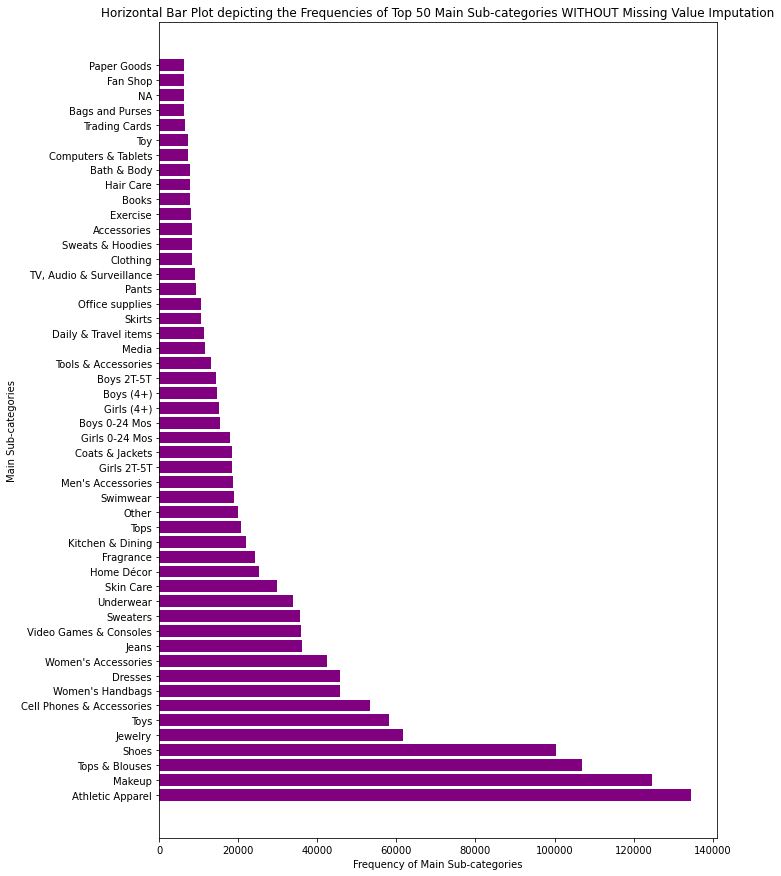

In [22]:
# Getting the top 50 Main Sub-Categories along with their frequencies
temp = dict(Counter(main_sub_category))
data_dict = {"sub_cat1":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 15)) 
ax = plt.barh(df_sorted_desc['sub_cat1'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Main Sub-categories") 
plt.ylabel("Main Sub-categories") 
plt.title("Horizontal Bar Plot depicting the Frequencies of Top 50 Main Sub-categories WITHOUT Missing Value Imputation")

plt.show()

*Since there are **majority** of **Women-based listings**, it's pretty obvious that the main sub-categories too have a majority of women-based main sub-categories.*

### 7.3.2. Missing Value Imputation

Let's preprocess the Main Sub-categories and then fill the missing values in the column with the appropriate Main Sub-category.

In [23]:
# This code creates a dictionary where key represents the actual category and the value represents preprocessed versions of it in the form of a list.
# Since it's the same code from above as the Main categories apart from some changes based on observations, I have ignored commenting out different steps.
temp_unique_categories = dict(Counter(main_sub_category))
unique_categories = {}
for k,v in temp_unique_categories.items():
  if k!= 'NA':
    if len(k.split())<2:
      unique_categories[k] = [k.lower()]
    else:
      temp_cats = []
      for i in k.split():
        if i != '&' and i != 'and' and i != 'And':
          temp_cats.append(i.lower())
        else:
          temp_cats.append(k)
      temp_cats.append(k.replace(" ",""))
      temp_cats.append(re.sub("\s*&\s*"," and ",k))
      unique_categories[k] = temp_cats

unique_categories

{'Accessories': ['accessories'],
 'Antique': ['antique'],
 'Apparel': ['apparel'],
 'Art': ['art'],
 'Artwork': ['artwork'],
 'Athletic Apparel': ['athletic',
  'apparel',
  'AthleticApparel',
  'Athletic Apparel'],
 'Automotive': ['automotive'],
 'Bags and Purses': ['bags',
  'Bags and Purses',
  'purses',
  'BagsandPurses',
  'Bags and Purses'],
 'Bath': ['bath'],
 'Bath & Body': ['bath', 'Bath & Body', 'body', 'Bath&Body', 'Bath and Body'],
 'Bathing & Skin Care': ['bathing',
  'Bathing & Skin Care',
  'skin',
  'care',
  'Bathing&SkinCare',
  'Bathing and Skin Care'],
 'Bedding': ['bedding'],
 'Blazers & Sport Coats': ['blazers',
  'Blazers & Sport Coats',
  'sport',
  'coats',
  'Blazers&SportCoats',
  'Blazers and Sport Coats'],
 'Book': ['book'],
 'Books': ['books'],
 'Books and Zines': ['books',
  'Books and Zines',
  'zines',
  'BooksandZines',
  'Books and Zines'],
 'Boys (4+)': ['boys', '(4+)', 'Boys(4+)', 'Boys (4+)'],
 'Boys 0-24 Mos': ['boys', '0-24', 'mos', 'Boys0-24Mos'

In [24]:
#Missing value imputation of main categories starts here

for i in tqdm(range(len(main_sub_category))):
  if main_sub_category[i] == 'NA':
    count = 0
    for k,v in unique_categories.items():
      for cat in v:
        if cat in all_text[i]:
          main_sub_category[i] = k
          count = 1
          break
      if count>0:
        break

100%|██████████| 1482535/1482535 [00:05<00:00, 290813.61it/s]


In [25]:
print("Number of NA values in Main Sub-categories is",main_sub_category.count("NA"))

Number of NA values in Main Sub-categories is 3210


*Thus the count has reduced from **6327** to **3210** of **NA values** in Main Sub-category and hence we could consider **NA as a separate category**.*

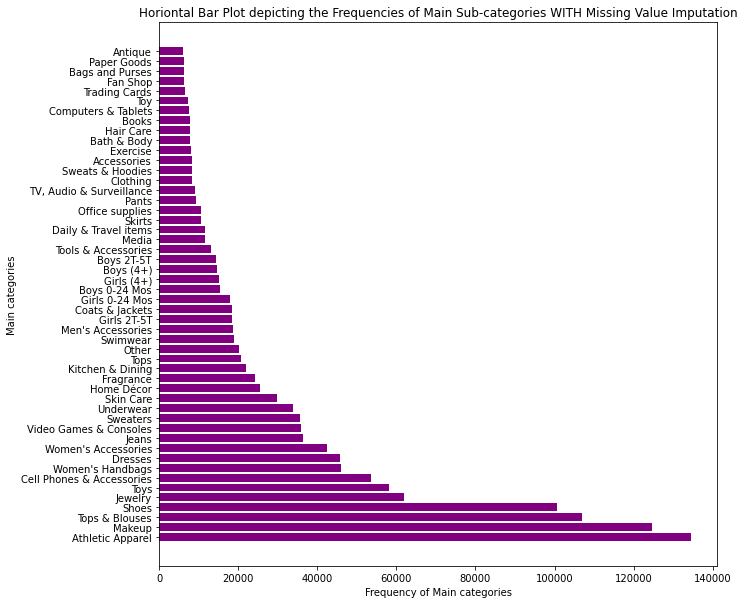

In [26]:
# Getting the Main Categories along with their frequencies
temp = dict(Counter(main_sub_category))
data_dict = {"main_cat":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 10)) 
ax = plt.barh(df_sorted_desc['main_cat'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Main categories") 
plt.ylabel("Main categories") 
plt.title("Horiontal Bar Plot depicting the Frequencies of Main Sub-categories WITH Missing Value Imputation")

plt.show()

*The graph presented here is also **somewhat similar** as the one before the imputation and it's just that the **frequencies have changed**.*

### 7.3.3. Main Sub-Category vs (Item_condition_id and Shipping)

In [27]:
train["filled_main_sub_category"] = main_sub_category

main_categories_with_condition_id_1 = []
main_categories_with_condition_id_2 = []
main_categories_with_condition_id_3 = []
main_categories_with_condition_id_4 = []
main_categories_with_condition_id_5 = []

main_categories_with_shipping_0 = []
main_categories_with_shipping_1 = []

main_categories_with_condition_id_1_shipping_0 = []
main_categories_with_condition_id_1_shipping_1 = []
main_categories_with_condition_id_5_shipping_0 = []
main_categories_with_condition_id_5_shipping_1 = []

def create_and_print_top_categories(list_of_categories):
  # Setting the categories in descending order based on frequency
  temp = [item for items, c in Counter(list_of_categories).most_common() for item in [items] * c]
  # intilize a null list
  list_of_categories = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_categories:
      list_of_categories.append(x)

  for i in list_of_categories[:10]:
      print(i)

for i in range(len(train['item_condition_id'])):
  if train['item_condition_id'][i] == 1:
    main_categories_with_condition_id_1.append(train['filled_main_sub_category'][i])
  elif train['item_condition_id'][i] == 2:
    main_categories_with_condition_id_2.append(train['filled_main_sub_category'][i])
  elif train['item_condition_id'][i] == 3:
    main_categories_with_condition_id_3.append(train['filled_main_sub_category'][i])
  elif train['item_condition_id'][i] == 4:
    main_categories_with_condition_id_4.append(train['filled_main_sub_category'][i])
  elif train['item_condition_id'][i] == 5:
    main_categories_with_condition_id_5.append(train['filled_main_sub_category'][i])

for i in range(len(train['shipping'])):
  if train['shipping'][i]==0:
    main_categories_with_shipping_0.append(train['filled_main_sub_category'][i])
  elif train['shipping'][i]==1:
    main_categories_with_shipping_1.append(train['filled_main_sub_category'][i])

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_1_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_1_shipping_1.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_5_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_5_shipping_1.append(a)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Main Sub-categories based on frequency with item_condition_id = 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1)
print("\nTop 10 Main Sub-categories based on frequency with item_condition_id = 2 are : ")
create_and_print_top_categories(main_categories_with_condition_id_2)
print("\nTop 10 Main Sub-categories based on frequency with item_condition_id = 3 are : ")
create_and_print_top_categories(main_categories_with_condition_id_3)
print("\nTop 10 Main Sub-categories based on frequency with item_condition_id = 4 are : ")
create_and_print_top_categories(main_categories_with_condition_id_4)
print("\nTop 10 Main Sub-categories based on frequency with item_condition_id = 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the buyer are : ")
create_and_print_top_categories(main_categories_with_shipping_0)
print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the seller are : ")
create_and_print_top_categories(main_categories_with_shipping_1)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the seller and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_1)
print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the buyer and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_0)
print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the seller and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_1)
print("\nTop 10 Main Sub-categories based on frequency where shipping charges are paid by the buyer and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_0)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 10 Main Sub-categories based on frequency with item_condition_id = 1 are : 
Makeup
Athletic Apparel
Cell Phones & Accessories
Jewelry
Tops & Blouses
Toys
Skin Care
Shoes
Women's Accessories
Underwear

Top 10 Main Sub-categories based on frequency with item_condition_id = 2 are : 
Athletic Apparel
Tops & Blouses
Shoes
Makeup
Dresses
Jewelry
Women's Handbags
Jeans
Sweaters
Women's Accessories

Top 10 Main Sub-categories based on frequency with item_condition_id = 3 are : 
Shoes
Athletic Apparel
Tops & Blouses
Video Games & Consoles
Toys
Women's Handbags
Makeup
Jeans
Sweaters
Jewelry

Top 10 Main Sub-categories based on frequency with item_condition_id = 4 are : 
Shoes
Women's Handbags
Athletic Apparel
Video Games & Consoles
Tops & Blouses
Toys
Cell Phones & Accessories
Women's Accessories
Makeup
Sweaters

Top 10 Main Sub-categories based on frequency with item_condition_id = 5 are : 
Cell Phones & Accessories
Video Games & Consoles


*Even in this case, we can see that there are many **electronic based main sub categories** with **condition id 5** in all scenarios.*

### 7.3.4. Main Sub-Category vs Brands

In [28]:
def get_unique_categories(list_of_categories):
  # Setting the categories in descending order based on frequency
  temp = [item for items, c in Counter(list_of_categories).most_common() for item in [items] * c]
  # intilize a null list
  list_of_categories = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_categories:
      list_of_categories.append(x)

  return list_of_categories

def print_top_10_brands_for_categories(categories,brands):
  list_of_categories = get_unique_categories(categories)
  # Setting the categories in descending order based on frequency
  print("****These brands are for the top 10 Main Sub-Categories****")
  for unique_cat in list_of_categories[:10]:
    brands_unique_cat = []
    for i in range(len(categories)):
      if categories[i] == unique_cat:
        brands_unique_cat.append(brands[i])
    brands_unique_cat = get_unique_categories(brands_unique_cat)
    print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")
    print("\nTop 5 brands for the category {0} are ".format(unique_cat))
    for i in range(6):
      print(brands_unique_cat[i])
  print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

These are the top 5 brands for the top 10 Main sub-categories.

In [29]:
print_top_10_brands_for_categories(list(train['filled_main_sub_category']),list(train['filled_brand_name']))

****These brands are for the top 10 Main Sub-Categories****

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Athletic Apparel are 
LuLaRoe
PINK
Nike
Lululemon
nan
Victoria's Secret

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Makeup are 
nan
Sephora
Urban Decay
Too Faced
MAC
Tarte

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Tops & Blouses are 
nan
PINK
LuLaRoe
FOREVER 21
Victoria's Secret
Brandy Melville

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Shoes are 
Nike
nan
Adidas
Boots
Converse
VANS

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Jewelry are 
nan
Ring
Kendra Scott
Silver
PANDORA
Stamped

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Toys are 
nan
Funko
Disney
American Girl ®
American Boy & Girl
LEGO

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands 

*As we saw that there were a majority of **Women based main category**, this we see that there are more of **Women based brands** in this as well.*

## 7.4 Sub-Category

### 7.4.1. Univariate Analysis

In [30]:
# Printing the first 10 Sub-categories as per the dataset
sub_category[:10]

['T-shirts',
 'Components & Parts',
 'Blouse',
 'Home Décor Accents',
 'Necklaces',
 'Other',
 'Two-Piece',
 'Girls',
 'Girls',
 'Doll']

In [31]:
# Printing the Frequencies of the Main Sub-categories
print("There are {} unique Sub categories\n".format(len(Counter(sub_category))))
print("These are the unique Sub categories along with their counts : \n")
Counter(sub_category)

There are 871 unique Sub categories

These are the unique Sub categories along with their counts : 



Counter({'100 Years or Older': 140,
         '50 To 75 Years': 92,
         '75 To 100 Years': 42,
         'A-Line': 756,
         'Above Knee, Mini': 20082,
         'Accessories': 10297,
         'Accessory': 31,
         'Aceo': 1,
         'Action Figure': 5354,
         'Action Figures & Statues': 12524,
         'Action, Adventure': 14,
         'Activity Centers & Entertainers': 20,
         'Advertisement': 3,
         'Afghan': 9,
         'Air Conditioners': 42,
         'Air Fresheners': 441,
         'Air Purifiers': 31,
         'All Other Sports': 61,
         'Amplifiers & Effects': 52,
         'Animal': 253,
         'Animals': 2,
         'Animation': 2954,
         'Apron': 56,
         'Area Rugs & Pads': 214,
         'Art': 88,
         'Art Doll': 8,
         'Artist Bears': 1,
         'Arts & Crafts': 7205,
         'Arts & Photography': 205,
         'Asymmetrical': 117,
         'Asymmetrical Hem': 3370,
         'Athletic': 27059,
         'Athletic Apparel

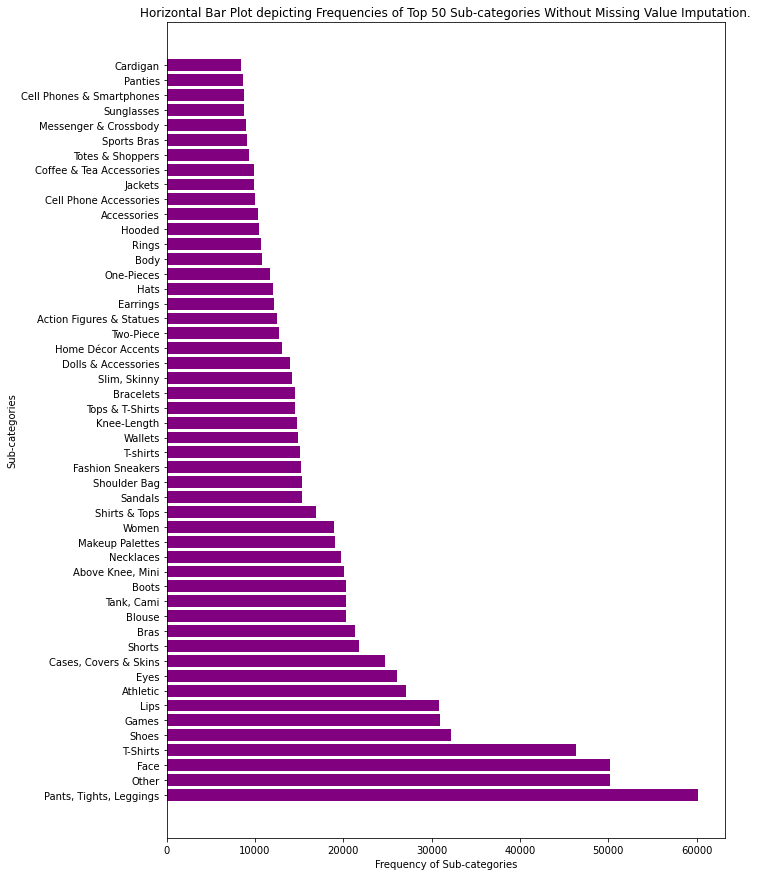

In [32]:
# Getting the top 50 Sub-Categories along with their frequencies
temp = dict(Counter(sub_category))
data_dict = {"sub_cat2":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 15)) 
ax = plt.barh(df_sorted_desc['sub_cat2'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Sub-categories") 
plt.ylabel("Sub-categories") 
plt.title("Horizontal Bar Plot depicting Frequencies of Top 50 Sub-categories Without Missing Value Imputation.")

plt.show()

*Therefore it's predominant from this graph that there are a majority of **attire-based listings** and most of them are related to **Women** of course.*

### 7.4.2. Missing Value Imputation

Let's do the same type of imputation with respect to Sub categories as well.

In [33]:
temp_unique_categories = dict(Counter(sub_category))
unique_categories = {}
for k,v in temp_unique_categories.items():
  if k!= 'NA':
    if len(k.split())<2:
      unique_categories[k] = [k.lower()]
    else:
      temp_cats = []
      for i in k.split():
        if i != '&' and i != 'and' and i != 'And':
          temp_cats.append(i.lower())
        else:
          temp_cats.append(k)
      temp_cats.append(k.replace(" ",""))
      temp_cats.append(re.sub("\s*&\s*"," and ",k))
      unique_categories[k] = temp_cats

temp = unique_categories["Other Accessories"]
del unique_categories["Other Accessories"]
unique_categories["Other Accessories"] = temp

temp = unique_categories["Other Furniture"]
del unique_categories["Other Furniture"]
unique_categories["Other Furniture"] = temp

temp = unique_categories["Other"]
del unique_categories["Other"]
unique_categories["Other"] = temp

temp = unique_categories["Others"]
del unique_categories["Others"]
unique_categories["Others"] = temp

unique_categories

{'100 Years or Older': ['100',
  'years',
  'or',
  'older',
  '100YearsorOlder',
  '100 Years or Older'],
 '50 To 75 Years': ['50',
  'to',
  '75',
  'years',
  '50To75Years',
  '50 To 75 Years'],
 '75 To 100 Years': ['75',
  'to',
  '100',
  'years',
  '75To100Years',
  '75 To 100 Years'],
 'A-Line': ['a-line'],
 'Above Knee, Mini': ['above',
  'knee,',
  'mini',
  'AboveKnee,Mini',
  'Above Knee, Mini'],
 'Accessories': ['accessories'],
 'Accessory': ['accessory'],
 'Aceo': ['aceo'],
 'Action Figure': ['action', 'figure', 'ActionFigure', 'Action Figure'],
 'Action Figures & Statues': ['action',
  'figures',
  'Action Figures & Statues',
  'statues',
  'ActionFigures&Statues',
  'Action Figures and Statues'],
 'Action, Adventure': ['action,',
  'adventure',
  'Action,Adventure',
  'Action, Adventure'],
 'Activity Centers & Entertainers': ['activity',
  'centers',
  'Activity Centers & Entertainers',
  'entertainers',
  'ActivityCenters&Entertainers',
  'Activity Centers and Entertain

In [34]:
for i in tqdm(range(len(sub_category))):
  if sub_category[i] == 'NA':
    count = 0
    for k,v in unique_categories.items():
      for cat in v:
        if cat in all_text[i]:
          sub_category[i] = k
          count = 1
          break
      if count>0:
        break

100%|██████████| 1482535/1482535 [00:08<00:00, 167952.69it/s]


In [35]:
print("Number of NA values in Sub-categories is",sub_category.count("NA"))

Number of NA values in Sub-categories is 63


*Thus the count has reduced from **6327** to **64** of **NA values** in Sub Main category and this is supposed to be **the best improvement** with respect to all the the type of categories*

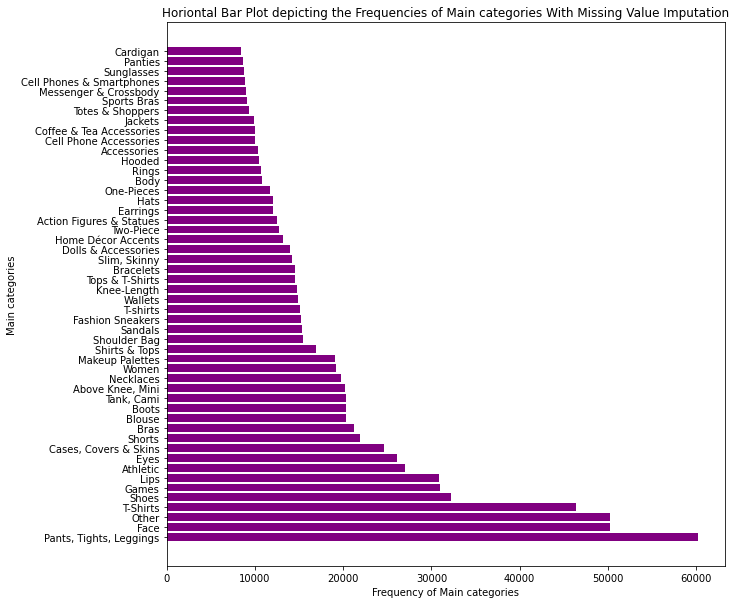

In [36]:
# Getting the Main Categories along with their frequencies
temp = dict(Counter(sub_category))
data_dict = {"main_cat":list(temp.keys()),"freq":list(temp.values())}
df = pd.DataFrame(data_dict)
df_sorted_desc= df.sort_values('freq',ascending=False)

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 10)) 
ax = plt.barh(df_sorted_desc['main_cat'][:50],
             df_sorted_desc['freq'][:50],
             color ='purple') 
plt.xlabel("Frequency of Main categories") 
plt.ylabel("Main categories") 
plt.title("Horiontal Bar Plot depicting the Frequencies of Main categories With Missing Value Imputation")

plt.show()

*The graph presented here is also **somewhat similar** as the one before the imputation and it's just that the **frequencies have changed**.*

### 7.4.3. Sub-Category vs (Item_condition_id and Shipping)

In [37]:
#Creating numerical columns w.r.t Categories for multivariate analysis
train["filled_sub_category"] = sub_category

main_categories_with_condition_id_1 = []
main_categories_with_condition_id_2 = []
main_categories_with_condition_id_3 = []
main_categories_with_condition_id_4 = []
main_categories_with_condition_id_5 = []

main_categories_with_shipping_0 = []
main_categories_with_shipping_1 = []

main_categories_with_condition_id_1_shipping_0 = []
main_categories_with_condition_id_1_shipping_1 = []
main_categories_with_condition_id_5_shipping_0 = []
main_categories_with_condition_id_5_shipping_1 = []

def create_and_print_top_categories(list_of_categories):
  # Setting the categories in descending order based on frequency
  temp = [item for items, c in Counter(list_of_categories).most_common() for item in [items] * c]
  # intilize a null list
  list_of_categories = [] 

  # traverse for all elements 
  for x in temp:
    # check if exists in unique_list or not
    if x not in list_of_categories:
      list_of_categories.append(x)

  for i in list_of_categories[:10]:
      print(i)

for i in range(len(train['item_condition_id'])):
  if train['item_condition_id'][i] == 1:
    main_categories_with_condition_id_1.append(train['filled_sub_category'][i])
  elif train['item_condition_id'][i] == 2:
    main_categories_with_condition_id_2.append(train['filled_sub_category'][i])
  elif train['item_condition_id'][i] == 3:
    main_categories_with_condition_id_3.append(train['filled_sub_category'][i])
  elif train['item_condition_id'][i] == 4:
    main_categories_with_condition_id_4.append(train['filled_sub_category'][i])
  elif train['item_condition_id'][i] == 5:
    main_categories_with_condition_id_5.append(train['filled_sub_category'][i])

for i in range(len(train['shipping'])):
  if train['shipping'][i]==0:
    main_categories_with_shipping_0.append(train['filled_sub_category'][i])
  elif train['shipping'][i]==1:
    main_categories_with_shipping_1.append(train['filled_sub_category'][i])

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_1_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_1,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_1_shipping_1.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_0):
  if a==b:
    main_categories_with_condition_id_5_shipping_0.append(a)

for a,b in zip(main_categories_with_condition_id_5,main_categories_with_shipping_1):
  if a==b:
    main_categories_with_condition_id_5_shipping_1.append(a)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Sub-categories based on frequency with item_condition_id = 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1)
print("\nTop 10 Sub-categories based on frequency with item_condition_id = 2 are : ")
create_and_print_top_categories(main_categories_with_condition_id_2)
print("\nTop 10 Sub-categories based on frequency with item_condition_id = 3 are : ")
create_and_print_top_categories(main_categories_with_condition_id_3)
print("\nTop 10 Sub-categories based on frequency with item_condition_id = 4 are : ")
create_and_print_top_categories(main_categories_with_condition_id_4)
print("\nTop 10 Sub-categories based on frequency with item_condition_id = 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the buyer are : ")
create_and_print_top_categories(main_categories_with_shipping_0)
print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the seller are : ")
create_and_print_top_categories(main_categories_with_shipping_1)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the seller and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_1)
print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the buyer and item condition id is 1 are : ")
create_and_print_top_categories(main_categories_with_condition_id_1_shipping_0)
print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the seller and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_1)
print("\nTop 10 Sub-categories based on frequency where shipping charges are paid by the buyer and item condition id is 5 are : ")
create_and_print_top_categories(main_categories_with_condition_id_5_shipping_0)

print("\n=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 10 Sub-categories based on frequency with item_condition_id = 1 are : 
Face
Pants, Tights, Leggings
Lips
Other
Eyes
Cases, Covers & Skins
T-Shirts
Women
Makeup Palettes
Necklaces

Top 10 Sub-categories based on frequency with item_condition_id = 2 are : 
T-Shirts
Pants, Tights, Leggings
Other
Games
Above Knee, Mini
Shorts
Face
Blouse
Tank, Cami
Shoes

Top 10 Sub-categories based on frequency with item_condition_id = 3 are : 
Shoes
T-Shirts
Games
Other
Pants, Tights, Leggings
Athletic
Shorts
Boots
Face
Tops & T-Shirts

Top 10 Sub-categories based on frequency with item_condition_id = 4 are : 
Athletic
Shoes
Boots
Games
Shoulder Bag
Fashion Sneakers
Cell Phones & Smartphones
Other
T-Shirts
Wallets

Top 10 Sub-categories based on frequency with item_condition_id = 5 are : 
Cell Phones & Smartphones
Consoles
Games
Athletic
Laptops & Netbooks
Other
iPad
Dolls & Accessories
Shoulder Bag
Fashion Sneakers

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*

*Over here, we can clearly see the **electronic based sub categories** with **condition id 5** in all scenarios.*

### 7.4.4. Sub-Category vs Brands

In [38]:
print_top_10_brands_for_categories(list(train['filled_sub_category']),list(train['filled_brand_name']))

****These brands are for the top 10 Main Sub-Categories****

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Pants, Tights, Leggings are 
LuLaRoe
PINK
Lululemon
Nike
nan
Independent

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Face are 
nan
Sephora
Tarte
Urban Decay
MAC
Too Faced

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Other are 
nan
PINK
Victoria's Secret
LuLaRoe
Disney
Nike

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category T-Shirts are 
PINK
nan
LuLaRoe
Victoria's Secret
Brandy Melville
FOREVER 21

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Shoes are 
Nike
nan
Converse
Boots
Jordan
PINK

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Games are 
Nintendo
Sony
Xbox
nan
GAME
Pokemon

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Top 5 brands for the category Lips are 
n

*As we saw that there were a majority of **Women based main category**, we see that there are more of **Women based brands** in this as well.*

Let's convert the string based categories to numbers for further analysis.

In [39]:
train["main_category_codes"] = train["filled_main_category"].astype('category').cat.codes
train["main_sub_category_codes"] = train["filled_main_sub_category"].astype('category').cat.codes
train["sub_category_codes"] = train["filled_sub_category"].astype('category').cat.codes

# **8. Colours**

## 8.1. Univariate Analysis

Since Mercari has an option of colour for filtering the search for a particular category, it might be interesting to gain some insights for the same. 

Reference - https://www.mercari.com/us/category/2/ (have a look at the '**Filter by**' portion in the website)

In [40]:
# Since there are 14 colours mentioned in the website, I have used those colours
colours = ["black",
           "grey",
           "white",
           "beige",
           "red",
           "pink",
           "purple",
           "blue",
           "green",
           "yellow",
           "orange",
           "brown",
           "gold",
           "silver"]

In [41]:
# Creating lists to make columns in the dataset
black = []
grey = []
white = []
beige = []
red = []
pink = []
purple = []
blue = []
green = []
yellow = []
orange = []
brown = []
gold = []
silver = []

# Initializing a list containing the number of colours present in the text
number_of_colours = []

# Initializing a dictionary where - 
# keys : The colours
# values : lists containing whether the colour is present or not
colours_dictionary = {}

In [42]:
number_of_colours = list(np.zeros(len(train["name"]),np.int))

In [43]:
for colour in colours:
  temp = []
  counter = 0
  for a,b in zip(train['name'],train['item_description']):
    if colour in a.lower() or colour in b.lower():
      temp.append(1)
      number_of_colours[counter] = number_of_colours[counter] + 1
    else:
      temp.append(0)
    counter = counter +1
  colours_dictionary[colour] = temp

In [44]:
for k,v in colours_dictionary.items():
  train[k] = v
train["number_of_colours"] = number_of_colours

In [45]:
print("Number of colours along with their counts")
train['number_of_colours'].value_counts()

Number of colours along with their counts


0     896132
1     397132
2     130969
3      37547
4      11758
5       4441
6       1767
9        926
7        869
8        665
10       230
11        62
12        22
13        12
14         3
Name: number_of_colours, dtype: int64

*It is surprising to see that there are **considerable amount of listings** which have **number of colours greater than 1** mentioned in them.*

In [46]:
print("There are {} out of {} datapoints which have colours.".format(train['number_of_colours'].value_counts()[1:].sum(),len(train["name"])))
print("That is around {:.2f}% of the total datapoints.".format((train['number_of_colours'].value_counts()[1:].sum()/len(train["name"]))*100))

There are 586403 out of 1482535 datapoints which have colours.
That is around 39.55% of the total datapoints.


*Thus almost **40% of the data have colours** mentioned in them and might prove useful while training the models.*

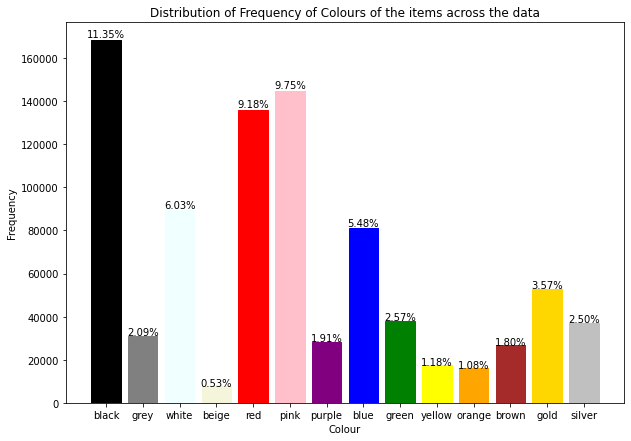

In [47]:
# Creating a dictionary with colours as keys and their counts as values
colour_freq = {}
for col in colours:
  colour_freq[col] = train[col].value_counts()[1]
# Getting the total number of items in the train data to calculate the percentages later on
total = len(train["name"])

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(colour_freq.keys(),
             colour_freq.values(),
             width = 0.8) 

# Setting the colours of bars w.r.t the original colours
for i in range(len(colours)):
  ax[i].set_color(colours[i])
# Setting azure as the white colour, since white bar won't be visible
ax[2].set_color('azure')

plt.xlabel("Colour") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Colours of the items across the data")

# Code to print percentages of the frequency of colours w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*Thus, **black, pink and red** colours have the highest **majority** amongst the listings based on colours.*

## 8.2. Colours vs (Item_condition_id and Shipping)

In [48]:
# Contingency Table
table = pd.crosstab(train['number_of_colours'],[train['shipping'],train['item_condition_id']])
table

shipping                0                         ...      1                  
item_condition_id       1       2       3      4  ...      2      3     4    5
number_of_colours                                 ...                         
0                  174130  142715  171381  13103  ...  88998  92987  6526  642
1                   72932   63087   77265   6002  ...  37292  38261  2693  169
2                   22889   19946   25505   1835  ...  12311  12652   870   36
3                    6761    5024    6980    509  ...   3138   3395   204    9
4                    2048    1222    1759    108  ...    771    809    51    2
5                     683     327     501     28  ...    253    242    11    1
6                     313      97     181     14  ...     90     80     4    0
7                     142      42      82      1  ...     45     25     0    0
8                      74      17      20      2  ...     47      9     0    0
9                      34      27      15      1  ...     21      6     0    0
10                     75       5       1      0  ...      3      3     0    0
11                      9       0       1      0  ...      1      1     0    0
12                      8       0       0      0  ...      0      0     0    0
13                      6       0       0      0  ...      0      0     0    0
14                      3       0       0      0  ...      0      0     0    0

[15 rows x 10 columns]

The major takeaway from this analysis is that the products which are in a **"New" condition**(Item_condition_id=1) have **more colours**.

## 8.3. Colours vs Categories

In [49]:
# Contingency Table
table = pd.crosstab(train['number_of_colours'],train['filled_main_category'])
table

filled_main_category,Beauty,Electronics,Handmade,Home,Kids,Men,NA,Other,Sports & Outdoors,Vintage & Collectibles,Women
number_of_colours,,,,,,,,,,,
0,151875,84427,18109,49034,123648,57853,3592,31362,16137,32502,327593
1,40247,27167,8035,13763,31168,24121,1070,9360,6079,9939,226183
2,9492,7487,2916,3602,11263,9076,335,2552,1916,2435,79895
3,3247,1719,818,981,3714,2449,72,976,739,713,22119
4,1440,1056,392,288,1077,493,29,597,258,254,5874
5,915,437,202,96,418,131,14,496,73,67,1592
6,212,266,83,55,229,60,5,194,39,29,595
7,193,56,73,38,99,17,3,59,13,20,298
8,64,40,76,61,67,6,0,21,18,173,139


The **Women based products** have a **lot of colours**.

# **9. Price**

## 9.1. Univariate Analysis

In [50]:
print("{} listings have a price of $0.0".format(list(train["price"]).count(0.0)))

874 listings have a price of $0.0


*Thus there are 874 listings which have a price of \$0 which is just around 0.05% of the entire dataset. Let's see which categories and brands are responsible for this $0 price.*

In [51]:
brands_with_zero_price = []
categories_with_zero_price = []
for i in range(len(train["price"])):
  if train['price'][i]==0.0:
    brands_with_zero_price.append(train['filled_brand_name'][i])
    categories_with_zero_price.append(train['filled_main_category'][i])

In [52]:
print("Top Main Categories which have zero prices along with their frequencies are : ")
Counter(categories_with_zero_price).most_common()

Top Main Categories which have zero prices along with their frequencies are : 


[('Women', 395),
 ('Kids', 134),
 ('Beauty', 103),
 ('Men', 74),
 ('Electronics', 58),
 ('Home', 40),
 ('Other', 23),
 ('Sports & Outdoors', 20),
 ('Vintage & Collectibles', 11),
 ('NA', 9),
 ('Handmade', 7)]

In [53]:
print("Top 30 brands which have zero prices along with their frequencies are : ")
Counter(brands_with_zero_price).most_common()[:30]

Top 30 brands which have zero prices along with their frequencies are : 


[(nan, 152),
 ('Nike', 40),
 ('LuLaRoe', 32),
 ('PINK', 26),
 ("Victoria's Secret", 25),
 ('Michael Kors', 12),
 ('American Eagle', 12),
 ('Adidas', 11),
 ('Nintendo', 9),
 ('Apple', 9),
 ('FOREVER 21', 9),
 ('Lululemon', 8),
 ('Disney', 8),
 ('Sephora', 8),
 ('Rae Dunn', 7),
 ('Samsung', 6),
 ('Old Navy', 6),
 ('BLUE', 6),
 ('Ralph Lauren', 5),
 ('Hollister', 5),
 ('Vintage', 5),
 ('Juicy Couture', 5),
 ('Calvin Klein', 5),
 ("Carter's", 5),
 ('American Girl ®', 5),
 ('NFL', 5),
 ('Urban Decay', 5),
 ('VANS', 5),
 ('Coach', 5),
 ('H&M', 4)]

*Thus over here, we can see that the **nan** category type of **brands** have the most prices as $0. Most of the women based brands too have \$0 price and hence that's the reason **Women** in the main categories have a major share.*

Let's get the **indexes** of these listings with \$0 price so as to manipulate **variable transformation** for logarithms since **Logarithm of 0 is not defined**.

In [54]:
index_with_zero_price = []
for i in range(len(train["price"])):
  if train["price"][i]==0.0:
    index_with_zero_price.append(i)

In [55]:
print("First 10 indexes of the listings which have a price-tag of $0.0 are ",index_with_zero_price[:10])

First 10 indexes of the listings which have a price-tag of $0.0 are  [1325, 2544, 2712, 3576, 3761, 5237, 6175, 7116, 7622, 10812]


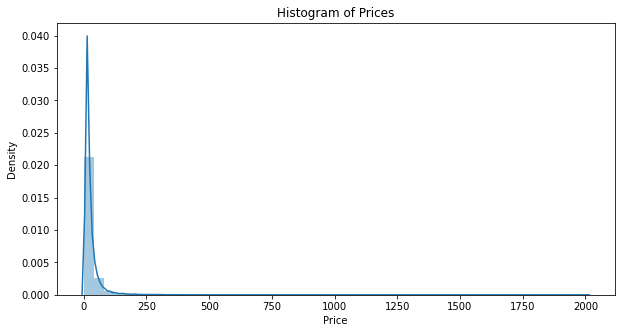

In [56]:
# Code to print the Histogram of Prices
plt.figure(figsize=(10,5))
sns.distplot(train["price"])
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Histogram of Prices")
plt.show()

### Brands vs price

*Since the graph is highly right skewed distributed(positively skewed distribution) and also since the prices are just positive numbers, transforming the prices to their roots would be a good option. Let's gain insights from logarithms as well!*

## 9.2. Variable Transformations

### 9.2.1. Log to the base 10

In [57]:
# Calculating log of prices whilst ignoring the listings with $0 price
log_of_prices = []
for i in range(len(train["price"])):
  if i in index_with_zero_price:
    log_of_prices.append(train["price"][i])
  else:
    log_of_prices.append(np.log10(train["price"][i]))

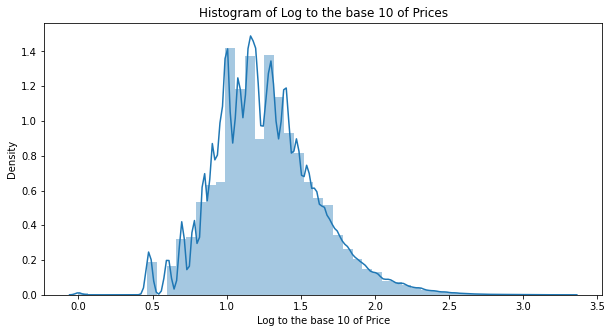

In [58]:
# Code to get the histogram of Log to the base 10 of prices.
plt.figure(figsize=(10,5))
sns.distplot(log_of_prices)
plt.xlabel("Log to the base 10 of Price")
plt.ylabel("Density")
plt.title("Histogram of Log to the base 10 of Prices")
plt.show()

*The histogram out here is **not pretty smooth** as it has a lot of peaks suggesting that it could have **a multimodal characteristic**.*

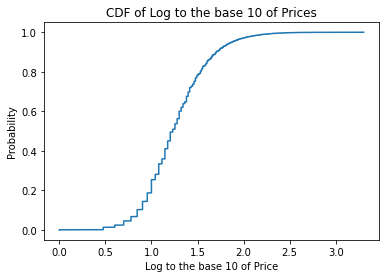

In [59]:
# Code to get the CDF of Log to the base 10 of the price
X=sorted(log_of_prices)
Y=[]
l=len(X)
Y.append(float(1)/l)
for i in range(2,l+1):
    Y.append(float(1)/l+Y[i-2])
plt.plot(X,Y,label='xyz')
plt.xlabel("Log to the base 10 of Price")
plt.ylabel("Probability")
plt.title("CDF of Log to the base 10 of Prices")
plt.show()

*This graph has more taper towards the right and so is depicts that this type of data has very less mean and the variance is a bit greater than expected.*

### 9.2.2. Log to the base 10 of Log to the base 10

To smoothen the histogram of log to the base 10, I have used log again on top of that. Let's see how the results come out to be.

In [60]:
# Calculating log of log of price whilst ignoring the ones which are equal to $0
log_of_log_of_prices = []
for i in range(len(log_of_prices)):
  if i in index_with_zero_price:
    log_of_log_of_prices.append(log_of_prices[i])
  else:
    log_of_log_of_prices.append(np.log10(log_of_prices[i]))

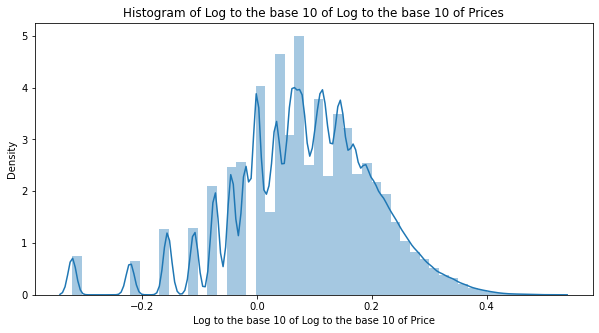

In [61]:
# Code to get the histogram of Log to the base 10 of Log to the base 10 of prices.
plt.figure(figsize=(10,5))
sns.distplot(log_of_log_of_prices)
plt.xlabel("Log to the base 10 of Log to the base 10 of Price")
plt.ylabel("Density")
plt.title("Histogram of Log to the base 10 of Log to the base 10 of Prices")
plt.show()

*Even in this case there are **several peaks** and depicts **a multimodal characteristic**.*

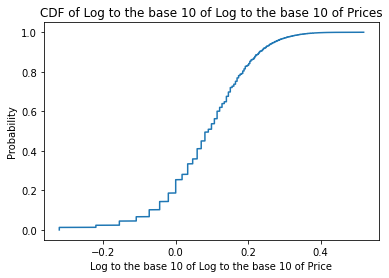

In [62]:
# Code to get the CDF of Log to the base 10 of Log to the base 10 of the price
X=sorted(log_of_log_of_prices)
Y=[]
l=len(X)
Y.append(float(1)/l)
for i in range(2,l+1):
    Y.append(float(1)/l+Y[i-2])
plt.plot(X,Y,label='xyz')
plt.xlabel("Log to the base 10 of Log to the base 10 of Price")
plt.ylabel("Probability")
plt.title("CDF of Log to the base 10 of Log to the base 10 of Prices")
plt.show()

*Because of the multimodal structure of the histogram, the **CDF too isn't smooth**.*

### 9.2.3. Square Root

Since the Logarithms did show a multimodal structure, let's try out roots of the prices.

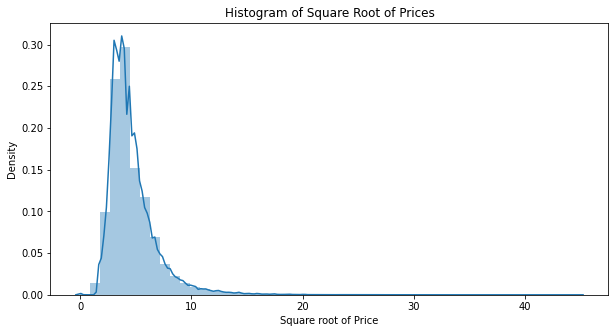

In [63]:
# Code to get the histogram of Square Root of prices.
plt.figure(figsize=(10,5))
sns.distplot(np.power(train["price"],0.5))
plt.xlabel("Square root of Price")
plt.ylabel("Density")
plt.title("Histogram of Square Root of Prices")
plt.show()

*There is still a lot of **right skew** and hence let's try out taking a square root of the square root of prices.*

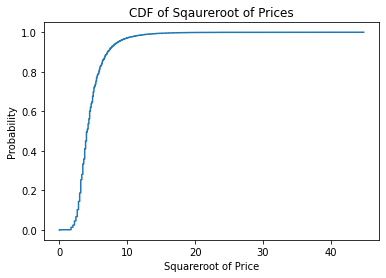

In [64]:
# Code to get the CDF of the Square root of the price
X=sorted(np.power(train["price"],0.5))
Y=[]
l=len(X)
Y.append(float(1)/l)
for i in range(2,l+1):
    Y.append(float(1)/l+Y[i-2])
plt.plot(X,Y,label='xyz')
plt.xlabel("Squareroot of Price")
plt.ylabel("Probability")
plt.title("CDF of Sqaureroot of Prices")
plt.show()

*Because of the **right skew characteristics**, the CDF too has tapered above and the mean has shifted more towards the left and is not centered.*

### 9.2.4. Quadra Root

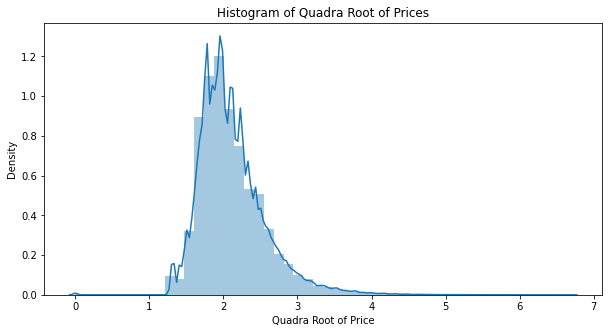

In [65]:
# Code to get the histogram of Quadra Root of prices.
plt.figure(figsize=(10,5))
sns.distplot(np.power(train["price"],0.25))
plt.xlabel("Quadra Root of Price")
plt.ylabel("Density")
plt.title("Histogram of Quadra Root of Prices")
plt.show()

*Even in this case the **right skew is still kind of present** and so let's try out the **octaroot** in the **further step**.*

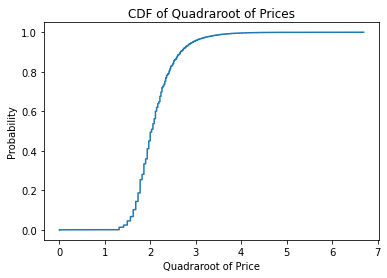

In [66]:
# Code to get the CDF of the Quadra root of the price
X=sorted(np.power(train["price"],0.25))
Y=[]
l=len(X)
Y.append(float(1)/l)
for i in range(2,l+1):
    Y.append(float(1)/l+Y[i-2])
plt.plot(X,Y,label='xyz')
plt.xlabel("Quadraroot of Price")
plt.ylabel("Probability")
plt.title("CDF of Quadraroot of Prices")
plt.show()

*This graph has more taper towards the right and so is depicts that this type of data has very less mean and the variance is a bit greater than expected.*

### 9.2.5. Octa Root

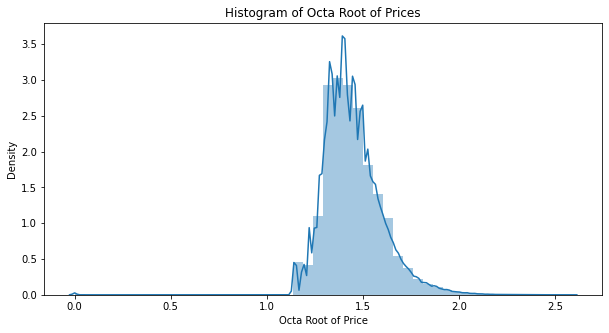

In [67]:
# Code to get the histogram of Octa Root of prices.
plt.figure(figsize=(10,5))
sns.distplot(np.power(train["price"],0.125))
plt.xlabel("Octa Root of Price")
plt.ylabel("Density")
plt.title("Histogram of Octa Root of Prices")
plt.show()

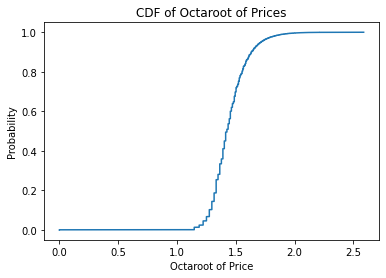

In [68]:
X=sorted(np.power(train["price"],0.125))
Y=[]
l=len(X)
Y.append(float(1)/l)
for i in range(2,l+1):
    Y.append(float(1)/l+Y[i-2])
plt.plot(X,Y,label='xyz')
plt.xlabel("Octaroot of Price")
plt.ylabel("Probability")
plt.title("CDF of Octaroot of Prices")
plt.show()

*This graph looks very decent with a pretty centered mean and lower variance.*

Reference : Wikipedia.


<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/300px-Normal_Distribution_CDF.svg.png"></img>

*Thus the Octa Root's histogram looks pretty much decent with a shape like a highly tapered curve with long tails.(Leptokurtic distribution)*

Trying out an analysis with the Cumulative Distribution Function was a good choice to figure out which distribution is better and hence I hace concluded that I'll be using the octaroot of prices.

In [69]:
#Considering the octaroot
train["transformed_price"] = np.power(train["price"],0.125)

In [70]:
print("Maximum transformed price is $",train["transformed_price"].max())
print("Minimum transformed price is $",train["transformed_price"].min())
print("Mean transformed price is    $",train["transformed_price"].mean())

Maximum transformed price is $ 2.587453133063808
Minimum transformed price is $ 0.0
Mean transformed price is    $ 1.4455401658061506


## 9.3. In-depth Univariate Analysis

Since the original histogram as stated above without any variable transformation had a very high skew let's see what the range of prices look like.

In [71]:
for i in range(10, 110, 10):
  print("{0}th percentile is {1}".format(i,np.percentile(train["price"],i)))

10th percentile is 7.0
20th percentile is 10.0
30th percentile is 12.0
40th percentile is 14.0
50th percentile is 17.0
60th percentile is 20.0
70th percentile is 26.0
80th percentile is 34.0
90th percentile is 51.0
100th percentile is 2009.0


In [72]:
for i in range(90, 101):
  print("{0}th percentile is {1}".format(i,np.percentile(train["price"],i)))

90th percentile is 51.0
91th percentile is 55.0
92th percentile is 58.0
93th percentile is 62.0
94th percentile is 67.0
95th percentile is 75.0
96th percentile is 85.0
97th percentile is 99.0
98th percentile is 122.0
99th percentile is 170.0
100th percentile is 2009.0


In [73]:
for i in range(1,11):
  print("{0}th percentile is {1}".format((99+0.1*i),np.percentile(train["price"],(99+0.1*i))))

99.1th percentile is 180.0
99.2th percentile is 189.0
99.3th percentile is 200.0
99.4th percentile is 210.0
99.5th percentile is 230.3300000000745
99.6th percentile is 256.0
99.7th percentile is 286.0
99.8th percentile is 340.0
99.9th percentile is 450.0
100.0th percentile is 2009.0


In [74]:
for i in range(1,11):
  print("{:.2f}th percentile is {:.2f}".format((99.9+0.01*i),np.percentile(train["price"],(99.9+0.01*i))))

99.91th percentile is 459.00
99.92th percentile is 490.00
99.93th percentile is 509.00
99.94th percentile is 556.00
99.95th percentile is 603.20
99.96th percentile is 659.99
99.97th percentile is 734.00
99.98th percentile is 838.48
99.99th percentile is 1015.00
100.00th percentile is 2009.00


In [75]:
for i in range(1,11):
  print("{:.3f}th percentile is {:.2f}".format((99.99+0.001*i),np.percentile(train["price"],(99.99+0.001*i))))

99.991th percentile is 1059.00
99.992th percentile is 1102.38
99.993th percentile is 1200.00
99.994th percentile is 1223.34
99.995th percentile is 1300.00
99.996th percentile is 1382.47
99.997th percentile is 1500.00
99.998th percentile is 1618.49
99.999th percentile is 1815.00
100.000th percentile is 2009.00


*Therefore,*
    
    There are around 97% of products with prices within 2 digits.
    
    There are around 2.98% of products with prices within 3 digits.
    
    There are around 0.02% of products with prices within the thousands mark.

*Thus, we can conclude that there are majority of prices of the listings less than 100$.*

On [Mercari's website](https://www.mercari.com/us/brand/54/) theres are price ranges which makes the search easier.
They are **\$0-\$25, \$25-\$50, \$50-\$100, \$100-\$200 and \$200 above**. Accordingly I have created 5 categories which are **Very Low, Low, Medium, High and Very High**.

In [76]:
price_categories = []
for i in train["price"]:
  if i<25.0:
    price_categories.append("Very Low")
  elif i>25.0 and i<50.0:
    price_categories.append("Low")
  elif i>50.0 and i<100.0:
    price_categories.append("Medium")
  elif i>100.0 and i<200.0:
    price_categories.append("High")
  else:
    price_categories.append("Very High")

In [77]:
train["price_categories"] = price_categories

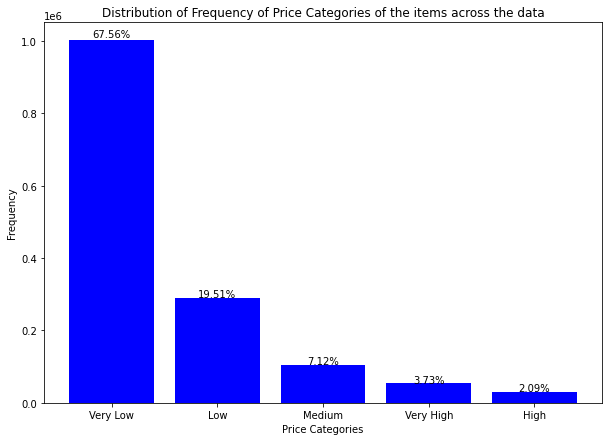

In [78]:
# Creating a dictionary with condition ids as keys and their counts as values
count_item_cond = dict(train["price_categories"].value_counts())
# Getting the total number of items in the train data to calculate the percentages later on
total = len(train["price_categories"])

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='blue',
             width = 0.8) 
plt.xlabel("Price Categories") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Price Categories of the items across the data")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

Thus over here we can see that almost **67% of the listings** have **prices below \$25**. 

## 9.4. Price vs Categorical features

### 9.4.1. Premium and Non-Premium Brands

Since we concluded in 9.3 that \$0-\$50 could be the most affordable category, let's consider that the products which have **MEAN prices above $50** as **Premium Brand category**.

In [79]:
len_costly_brands = len([element for element in list(dict(dict(train[['filled_brand_name','price']].groupby("filled_brand_name").mean())['price']).values()) if element > 50])
print("There are {} brands with mean prices above $50".format(len_costly_brands))

There are 425 brands with mean prices above $50


In [80]:
len_cheap_brands = len([element for element in list(dict(dict(train[['filled_brand_name','price']].groupby("filled_brand_name").mean())['price']).values()) if element <= 50])
print("There are {} brands with mean prices below $50".format(len_cheap_brands))

There are 4384 brands with mean prices below $50


*Thus **423 brands** lie in the **Premium Brands Category** and the rest aren't Premium.*

Let's print the **top 50 Premium Brands**.

In [81]:
print("These are the top 50 from the {} brands whose mean prices are above $50 along with their average prices : ".format(len_costly_brands))
train[['brand_name','price']].groupby("brand_name").mean().sort_values("price", ascending=False).head(50)

These are the top 50 from the 425 brands whose mean prices are above $50 along with their average prices : 


,price
brand_name,
Demdaco,429.000000
Proenza Schouler,413.250000
Auto Meter,344.000000
Oris,300.000000
MCM Worldwide,289.173913
Longines,254.000000
Vitamix,253.111111
Blendtec,251.800000
David Yurman,248.611570


Let's print the brands which have the **least means**.

In [82]:
print("These are the bottom 50 from the {} brands whose mean prices are below $50 along with their average prices : ".format(len_cheap_brands))
train[['brand_name','price']].groupby("brand_name").mean().sort_values("price", ascending=True).head(50)

These are the bottom 50 from the 4384 brands whose mean prices are below $50 along with their average prices : 


,price
brand_name,
CM Style Fashion,0.0
Gossip Girl,0.0
DUO,3.0
Revlon Colorsilk,3.0
Play MG,3.0
AA Aquarium,3.0
Scunci,3.0
A.B.S. by Allen Schwartz,3.0
Old Glory,3.0


*In this case, we can see that brands like **CM Style Fashion** and **Gossip Girl** might be the 2 brands responsible for the listings with price as $0.*

Let's now do an **in depth analysis** with respect to these **brands vs. the rest of the categorical features**.

In [83]:
brands_greater = list(dict(dict(train[['brand_name','price']].groupby("brand_name").mean().sort_values("price", ascending=False))['price']).keys())[:len_costly_brands]

brand_greater_main_category = []
brand_greater_colours = []
brand_greater_shipping = []
brand_greater_condition_id = []
brand_greater_black = []
brand_greater_grey = []
brand_greater_white = []
brand_greater_beige = []
brand_greater_red = []
brand_greater_pink = []
brand_greater_purple = []
brand_greater_blue = []
brand_greater_green = []
brand_greater_yellow = []
brand_greater_orange = []
brand_greater_brown = []
brand_greater_gold = []
brand_greater_silver = []

number_of_listings_counter = 0

for i in tqdm(range(len(train["filled_brand_name"]))):
  if train["filled_brand_name"][i] in brands_greater:
      brand_greater_main_category.append(train['filled_main_category'][i])
      brand_greater_colours.append(train['number_of_colours'][i])
      brand_greater_shipping.append(train['shipping'][i])
      brand_greater_condition_id.append(train['item_condition_id'][i])
      brand_greater_black.append(train['black'][i])
      brand_greater_grey.append(train['grey'][i])
      brand_greater_white.append(train['white'][i])
      brand_greater_beige.append(train['beige'][i])
      brand_greater_red.append(train['red'][i])
      brand_greater_pink.append(train['pink'][i])
      brand_greater_purple.append(train['purple'][i])
      brand_greater_blue.append(train['blue'][i])
      brand_greater_green.append(train['green'][i])
      brand_greater_yellow.append(train['yellow'][i])
      brand_greater_orange.append(train['orange'][i])
      brand_greater_brown.append(train['brown'][i])
      brand_greater_gold.append(train['gold'][i])
      brand_greater_silver.append(train['silver'][i])

brands_cheaper = list(dict(dict(train[['brand_name','price']].groupby("brand_name").mean().sort_values("price", ascending=True))['price']).keys())[:len_cheap_brands]

brands_cheaper_main_category = []
brands_cheaper_colours = []
brands_cheaper_shipping = []
brands_cheaper_condition_id = []
brands_cheaper_black = []
brands_cheaper_grey = []
brands_cheaper_white = []
brands_cheaper_beige = []
brands_cheaper_red = []
brands_cheaper_pink = []
brands_cheaper_purple = []
brands_cheaper_blue = []
brands_cheaper_green = []
brands_cheaper_yellow = []
brands_cheaper_orange = []
brands_cheaper_brown = []
brands_cheaper_gold = []
brands_cheaper_silver = []

for i in tqdm(range(len(train["filled_brand_name"]))):
  if train["filled_brand_name"][i] in brands_cheaper:
      brands_cheaper_main_category.append(train['filled_main_category'][i])
      brands_cheaper_colours.append(train['number_of_colours'][i])
      brands_cheaper_shipping.append(train['shipping'][i])
      brands_cheaper_condition_id.append(train['item_condition_id'][i])
      brands_cheaper_black.append(train['black'][i])
      brands_cheaper_grey.append(train['grey'][i])
      brands_cheaper_white.append(train['white'][i])
      brands_cheaper_beige.append(train['beige'][i])
      brands_cheaper_red.append(train['red'][i])
      brands_cheaper_pink.append(train['pink'][i])
      brands_cheaper_purple.append(train['purple'][i])
      brands_cheaper_blue.append(train['blue'][i])
      brands_cheaper_green.append(train['green'][i])
      brands_cheaper_yellow.append(train['yellow'][i])
      brands_cheaper_orange.append(train['orange'][i])
      brands_cheaper_brown.append(train['brown'][i])
      brands_cheaper_gold.append(train['gold'][i])
      brands_cheaper_silver.append(train['silver'][i])

print("\n\nThere are {} listings with prices above $50.".format(len(brand_greater_main_category)))
print("There are {} listings with prices below $50.".format(len(brands_cheaper_main_category)))

100%|██████████| 1482535/1482535 [03:34<00:00, 6925.44it/s]



There are 129806 listings with prices above $50.
There are 1114378 listings with prices below $50.


### 9.4.2. (Brands and Prices) vs. Main Category

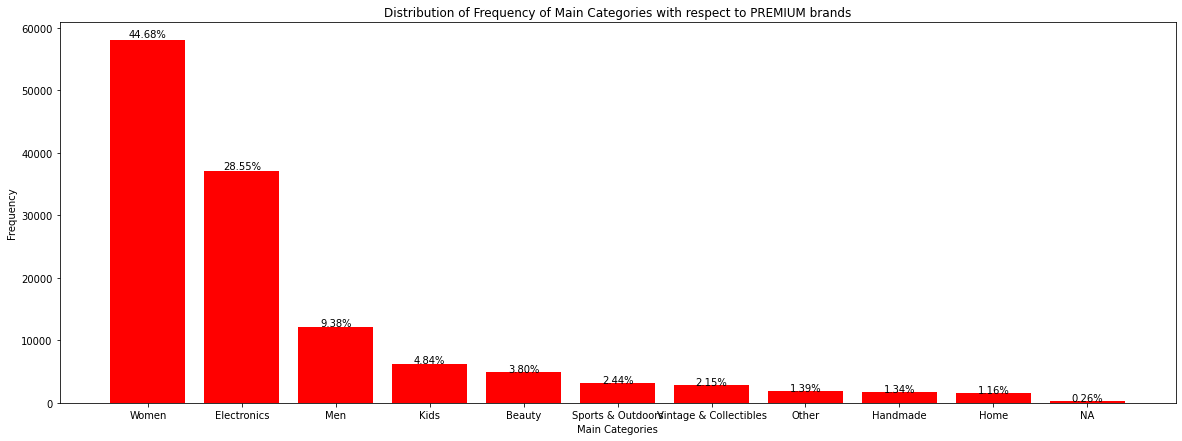

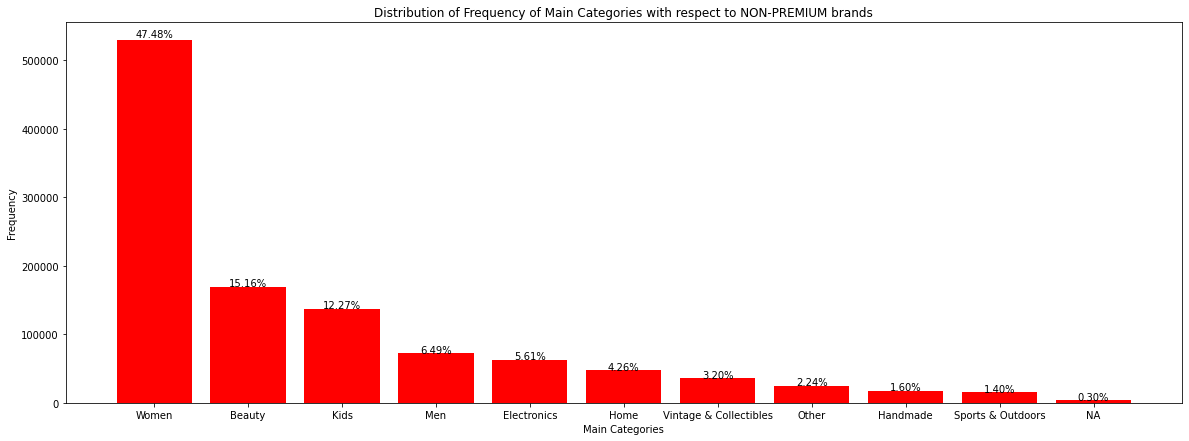

In [84]:
# Creating a dictionary with condition ids as keys and their counts as values
count_main_category = dict(Counter(brand_greater_main_category).most_common())
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brand_greater_main_category)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(20, 7)) 
ax = plt.bar(count_main_category.keys(),
             count_main_category.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Main Categories") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Main Categories with respect to PREMIUM brands")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

# Creating a dictionary with condition ids as keys and their counts as values
count_main_category = dict(Counter(brands_cheaper_main_category).most_common())
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brands_cheaper_main_category)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(20, 7)) 
ax = plt.bar(count_main_category.keys(),
             count_main_category.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Main Categories") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Main Categories with respect to NON-PREMIUM brands")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*The graphs above give pretty useful insights. The category of **Women** have the **most and almost equal majority in both** the premium and the non premium category of brands.*

*It looks like **fashion related brands** come under the **Premium brands** as we can see **Women and Men** categories come in the top 3.*

*It's surprising to see that even if the **Electronics** category had a major share with the least **Item condition id(5)** they still cost way more.*

Let's have a look at the **range of prices** for different category. I used Boxplots and Violin plots before but they weren't interpretable enough. This is why I have used Density plots like **kdeplot**.

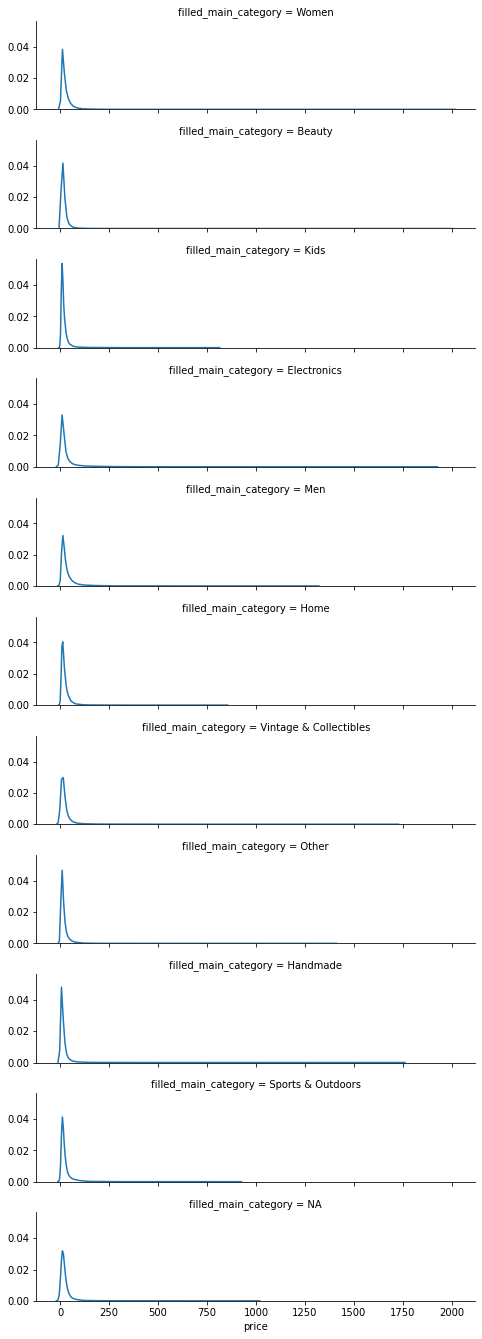

In [85]:
ordered_days = train.filled_main_category.value_counts().index
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, row="filled_main_category", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "price")
plt.show()

*The **Women** and **Beauty** categories have pretty much the same price range and are the costliest. It's surprising to see that **Electronics** category price less than both of them.*

Since the density plot was pretty much the same up till $750, let's see how many listings actually do lie beyond that for each category.

In [86]:
train[train["price"]>750][['price','filled_main_category']].groupby("filled_main_category").count().sort_values("price", ascending=False)

,price
filled_main_category,
Women,238
Electronics,88
Vintage & Collectibles,53
Beauty,13
Men,11
Other,9
Handmade,2
Kids,2
Home,1


*So in this case we can see that there are **only 13 listings** w.r.t the **Beauty** category which cost beyond $750.*

Let's now see which brands are responsible for the same.

In [87]:
for cat in train['filled_main_category'].unique():
  print("\n\nTop brands for {} are : ".format(cat.upper()))
  brands = []
  price = []
  for i in range(len(train['price'])):
    if train['filled_main_category'][i]==cat:
      if train['price'][i]>750:
        brands.append(train['filled_brand_name'][i])
        price.append(train['price'][i])
  if brands:
    print(pd.Series(brands).value_counts())



Top brands for MEN are : 
Adidas              3
adidas Originals    1
Tag Heuer           1
Rolex               1
Oakley              1
Movado              1
Louis Vuitton       1
dtype: int64


Top brands for ELECTRONICS are : 
Apple            63
Canon             5
ASUS              3
Microsoft         3
Intel             2
Sanyo             1
Bose              1
Cooler Master     1
Xbox              1
Acer              1
Dell              1
Power A           1
Pro               1
DJI               1
Crest             1
dtype: int64


Top brands for WOMEN are : 
Louis Vuitton        111
Chanel                27
Saint Laurent         12
Ring                  11
MCM Worldwide         10
Gucci                  8
David Yurman           5
MCM                    5
Diamond                4
Burberry               3
Michael Kors           3
MICHELE                3
Givenchy               3
Valentino              3
Vintage                3
Celine                 3
PINK                   2
V

*Therefore, **Apple, Louis Vuitton and Chanel** have the most number of listings with **prices above $750**.*

Let's see the relationship of categories with shipping and prices.

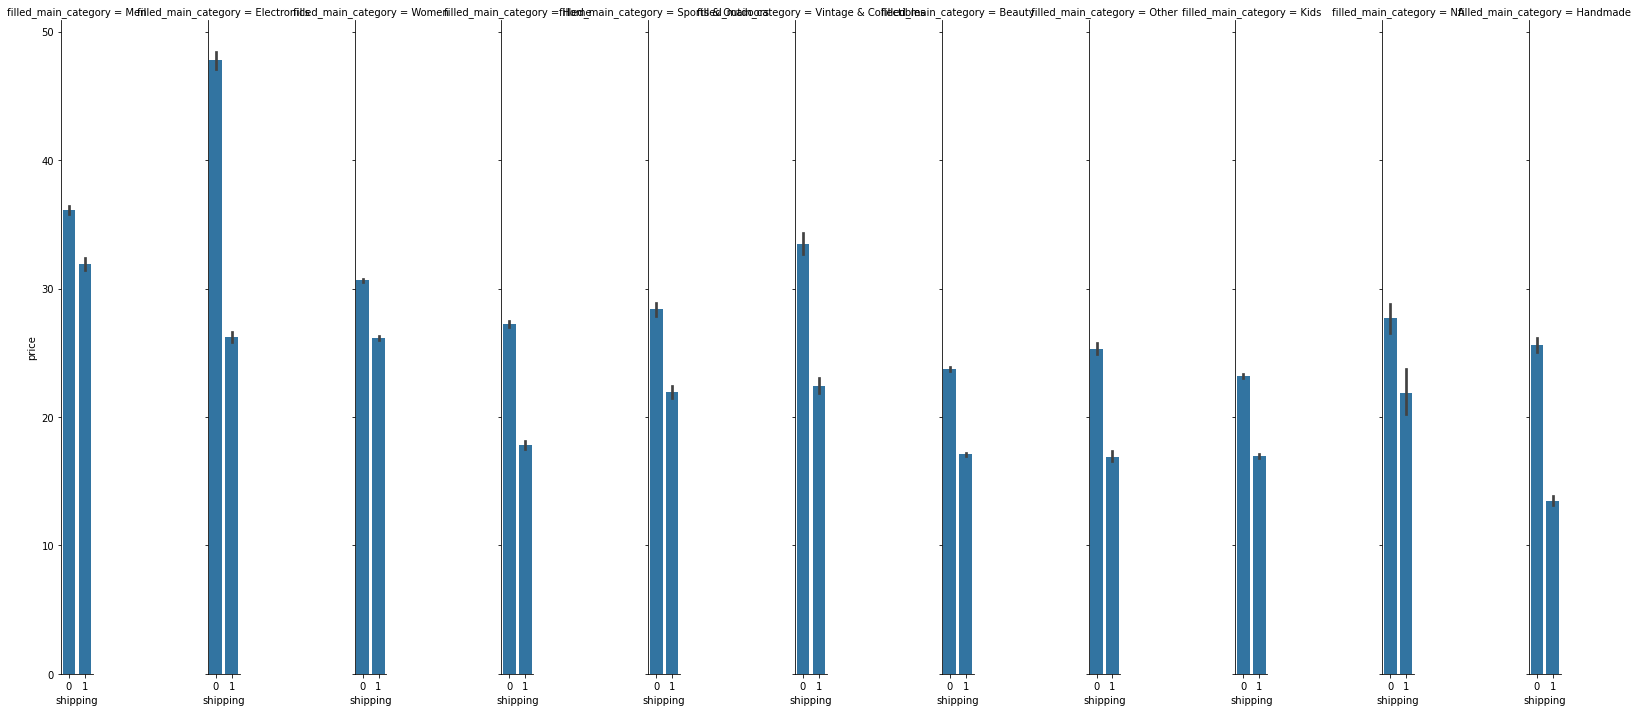

In [88]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col="filled_main_category", height=10, aspect=.2)
g.map(sns.barplot, "shipping", "price", order=[0, 1])
plt.show()

*Well this graph draws pretty useful insights! It looks the the listings which have the **shipping charges paid by the buyer cost more** for every type of category. Thus this might prove **profitable for the seller** since they do not have to pay for the shipping charges.*

### 9.4.3. (Brands and Prices) vs. Colours

Let's now have a look at how Brands and Price realte with colours

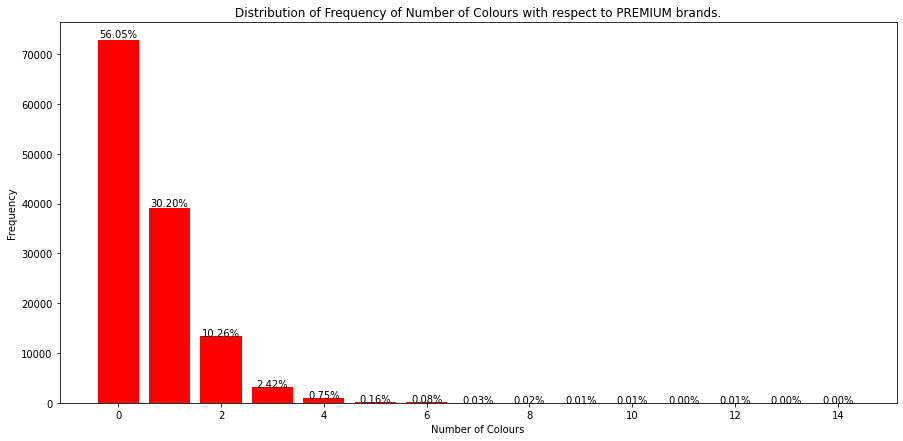

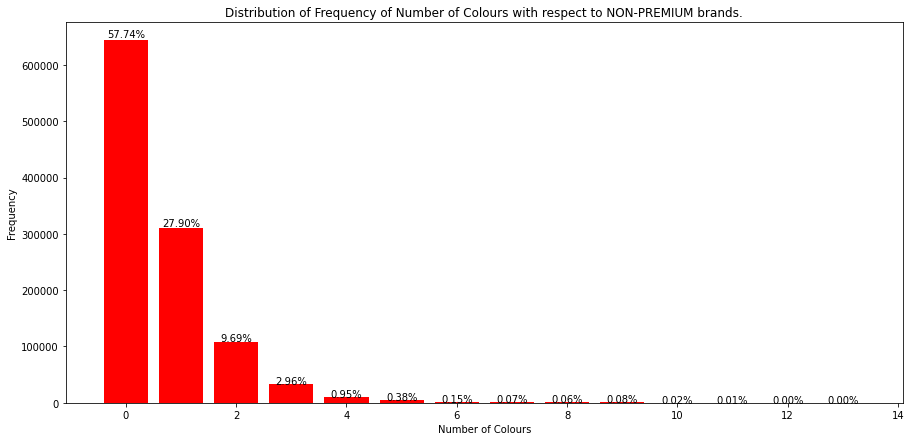

In [89]:
# Creating a dictionary with condition ids as keys and their counts as values
count_colours = Counter(brand_greater_colours)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brand_greater_colours)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(15, 7)) 
ax = plt.bar(count_colours.keys(),
             count_colours.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Number of Colours") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Number of Colours with respect to PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

# Creating a dictionary with condition ids as keys and their counts as values
count_colours = Counter(brands_cheaper_colours)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brands_cheaper_colours)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(15, 7)) 
ax = plt.bar(count_colours.keys(),
             count_colours.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Number of Colours") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Number of Colours with respect to NON-PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*Thus the variation of the **number of colours** is almost the **same** for both Premium and Non-Premium brands.*

Let's look at which colours matter the most.

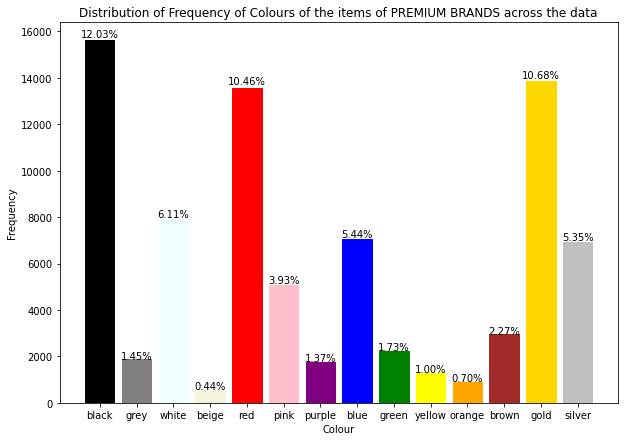

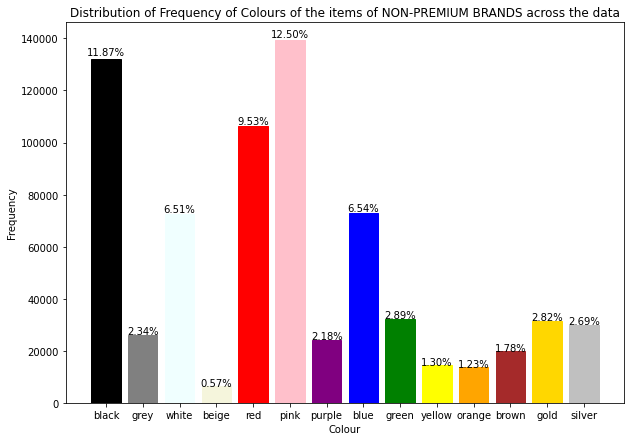

In [90]:
# Creating a dictionary with colours as keys and their counts as values
colours = {}
colours['black'] = brand_greater_black.count(1)
colours['grey'] = brand_greater_grey.count(1)
colours['white'] = brand_greater_white.count(1)
colours['beige'] = brand_greater_beige.count(1)
colours['red'] = brand_greater_red.count(1)
colours['pink'] = brand_greater_pink.count(1)
colours['purple'] = brand_greater_purple.count(1)
colours['blue'] = brand_greater_blue.count(1)
colours['green'] = brand_greater_green.count(1)
colours['yellow'] = brand_greater_yellow.count(1)
colours['orange'] = brand_greater_orange.count(1)
colours['brown'] = brand_greater_brown.count(1)
colours['gold'] = brand_greater_gold.count(1)
colours['silver'] = brand_greater_silver.count(1)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brand_greater_colours)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(colours.keys(),
             colours.values(),
             width = 0.8) 

# Setting the colours of bars w.r.t the original colours
for i in range(len(colours.keys())):
  ax[i].set_color(list(colours.keys())[i])
# Setting azure as the white colour, since white bar won't be visible
ax[2].set_color('azure')

plt.xlabel("Colour") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Colours of the items of PREMIUM BRANDS across the data")

# Code to print percentages of the frequency of colours w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

# Creating a dictionary with colours as keys and their counts as values
colours = {}
colours['black'] = brands_cheaper_black.count(1)
colours['grey'] = brands_cheaper_grey.count(1)
colours['white'] = brands_cheaper_white.count(1)
colours['beige'] = brands_cheaper_beige.count(1)
colours['red'] = brands_cheaper_red.count(1)
colours['pink'] = brands_cheaper_pink.count(1)
colours['purple'] = brands_cheaper_purple.count(1)
colours['blue'] = brands_cheaper_blue.count(1)
colours['green'] = brands_cheaper_green.count(1)
colours['yellow'] = brands_cheaper_yellow.count(1)
colours['orange'] = brands_cheaper_orange.count(1)
colours['brown'] = brands_cheaper_brown.count(1)
colours['gold'] = brands_cheaper_gold.count(1)
colours['silver'] = brands_cheaper_silver.count(1)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brands_cheaper_colours)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(colours.keys(),
             colours.values(),
             width = 0.8) 

# Setting the colours of bars w.r.t the original colours
for i in range(len(colours.keys())):
  ax[i].set_color(list(colours.keys())[i])
# Setting azure as the white colour, since white bar won't be visible
ax[2].set_color('azure')

plt.xlabel("Colour") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Colours of the items of NON-PREMIUM BRANDS across the data")

# Code to print percentages of the frequency of colours w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*Wow so **Gold** and **silver** have **higher prices**. Since the colours are manipulated by string comparison it could even happen that Gold and Silver might be actual metals rather than the colours and so they cost more.*

*The colour **pink** is pretty famous with the **non-premium brands**. Rest of the colours have pretty much the same distribution with both the brand types.*

Let's have a look at the mean of the prices for a better understanding.

In [91]:
colour_mean_price = {}
for col in colours.keys():
  temp_colour = train[col]
  temp_prices = train['price']
  values_price = []
  for i in range(len(temp_colour)):
    if temp_colour[i]==1:
      values_price.append(temp_prices[i])
  colour_mean_price[col] = statistics.mean(values_price)

In [92]:
print("COLOURS\t\tAVERAGE PRICE")
for col in colours:
  print("{} \t: \t${}".format(col,colour_mean_price[col]))

COLOURS		AVERAGE PRICE
black 	: 	$28.559854843311616
grey 	: 	$29.003410266356347
white 	: 	$26.62948207171315
beige 	: 	$24.111330362826227
red 	: 	$28.781803016050326
pink 	: 	$24.746039597111153
purple 	: 	$24.486935740839087
blue 	: 	$27.003653675819308
green 	: 	$24.231424067262218
yellow 	: 	$27.844068475896027
orange 	: 	$24.6793304495016
brown 	: 	$28.563780469567817
gold 	: 	$40.54802094359595
silver 	: 	$29.5724191894663


*So, yes, **Gold** could be an actual metal in most of the string manipulations.*

### 9.4.4. (Brands and Prices) vs. Shipping

Let's now have a look at how the Shipping matters.

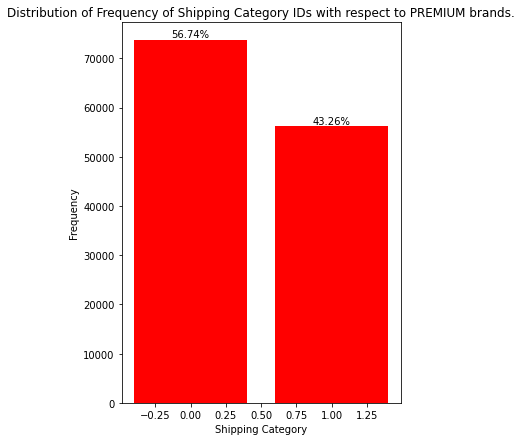

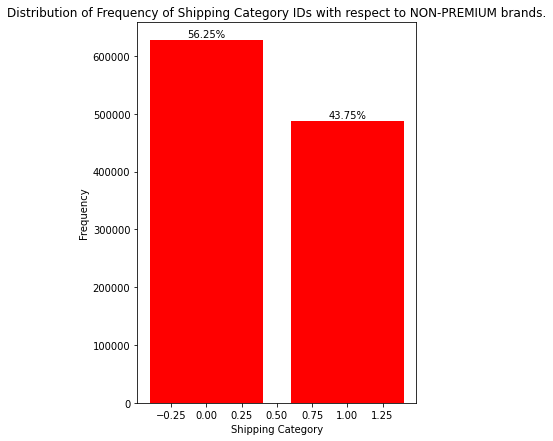

In [93]:
# Creating a dictionary with condition ids as keys and their counts as values
count_shipping = Counter(brand_greater_shipping)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brand_greater_shipping)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(5, 7)) 
ax = plt.bar(count_shipping.keys(),
             count_shipping.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Shipping Category") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Shipping Category IDs with respect to PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

# Creating a dictionary with condition ids as keys and their counts as values
count_shipping = Counter(brands_cheaper_shipping)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brands_cheaper_shipping)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(5, 7)) 
ax = plt.bar(count_shipping.keys(),
             count_shipping.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Shipping Category") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Shipping Category IDs with respect to NON-PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*The distributions are almost the same for both types of brands where the **shipping charges paid by the buyer dominate(0)**.*

Let's look at the same type of density plot which we used to determine the range of prices earlier.

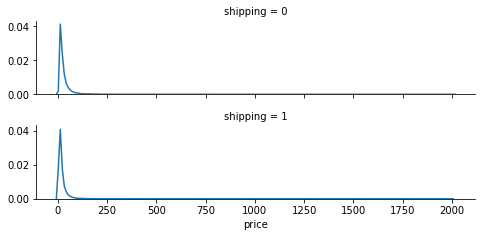

In [94]:
ordered_days = train.shipping.value_counts().index
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, row="shipping", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "price")
plt.show()

*The **range of prices** are pretty **similar** with both the shipping categories.*

Let's have a look at how many listings lie in each of the categories with prices above $250.

In [95]:
train[train["price"]>250][['price','shipping']].groupby("shipping").count().sort_values("price", ascending=False)

,price
shipping,
0,3888
1,2239


*Thus we had concluded this even earlier that most of the listings with **higher prices** had shipping charges **paid by the buyer**.*

Let's have a look at which brands matter the most w.r.t Shipping.

In [96]:
for cat in train['shipping'].unique():
  if cat==0:
    print("\n\nTop brands which cost more than $250 where the shipping charges are paid by the buyer are : ")
  else:
    print("\n\nTop brands which cost more than $250 where the shipping charges are paid by the seller are : ")
  brands = []
  price = []
  for i in range(len(train['price'])):
    if train['shipping'][i]==cat:
      if train['price'][i]>250:
        brands.append(train['filled_brand_name'][i])
        price.append(train['price'][i])
  if brands:
    print(pd.Series(brands).value_counts()[:30])



Top brands which cost more than $250 where the shipping charges are paid by the seller are : 
Apple                  455
Louis Vuitton          313
Samsung                 63
Chanel                  56
Sony                    55
Gucci                   49
PINK                    40
David Yurman            39
Air Jordan              38
Adidas                  37
Kendra Scott            35
Canon                   33
Christian Louboutin     32
Michael Kors            30
Ring                    29
Xbox                    27
Nintendo                24
Burberry                23
Funko                   21
Tory Burch              20
Stamped                 18
Tiffany & Co.           18
Saint Laurent           17
Microsoft               16
LuLaRoe                 16
MCM                     15
Valentino               15
Rolex                   14
Intel                   12
Sherri Hill             11
dtype: int64


Top brands which cost more than $250 where the shipping charges are paid by the

*It's surprising to see that the order of brands are almost the same with respect to both the shipping types.*

### 9.4.5. (Brands and Prices) vs. Item_condition_id

Now let's look at how the Item_condition_ids matter.

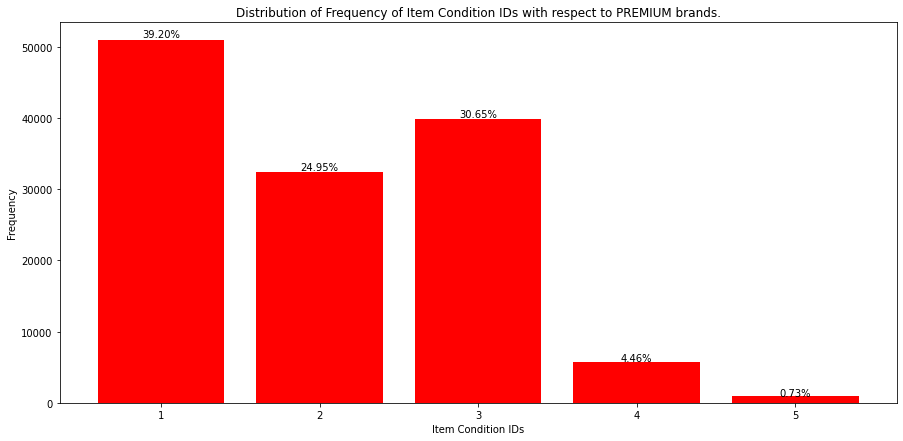

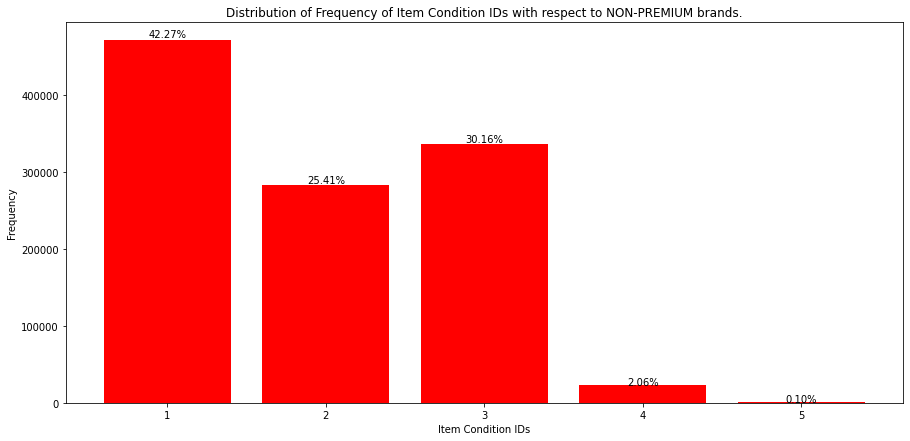

In [97]:
# Creating a dictionary with condition ids as keys and their counts as values
count_item_cond = Counter(brand_greater_condition_id)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brand_greater_condition_id)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(15, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Item Condition IDs") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Item Condition IDs with respect to PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

# Creating a dictionary with condition ids as keys and their counts as values
count_item_cond = Counter(brands_cheaper_condition_id)
# Getting the total number of items in the train data to calculate the percentages later on
total = len(brands_cheaper_condition_id)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(15, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='red',
             width = 0.8) 
plt.xlabel("Item Condition IDs") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Item Condition IDs with respect to NON-PREMIUM brands.")

# Code to print percentages of the frequency of condition ids w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*The **distribution of listings** w.r.t. item condition ids is pretty much the **same** for both Premium and Non-Premium brands.*

Let's try to gain insights from the density plot for the range of prices for each condition id.

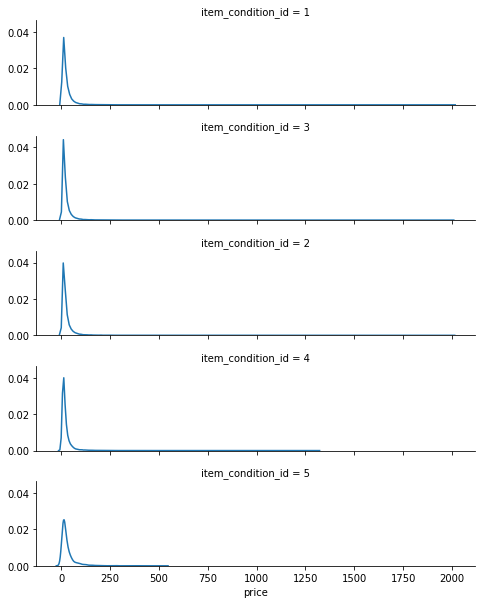

In [98]:
ordered_days = train.item_condition_id.value_counts().index
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, row="item_condition_id", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "price")
plt.show()

*Over here we can see that the range of prices for **condition ids 1,2 and 3** are pretty much the **same**. **Condition id 5** has a price range from \$0 to somewhere around **\$550** only and for the **condition id 4** it is up till somewhere around **\$1350**.*

Since the kdeplot plot is almost the same up till \$250. Let's see how many listings are actually present for each condition id for prices above \$250.

In [99]:
train[train["price"]>250][['price','item_condition_id']].groupby("item_condition_id").count().sort_values("price", ascending=False)

,price
item_condition_id,
3,2157
1,1959
2,1883
4,114
5,14


*Thus we can see there is a **close gap** between **condition ids 1 and 2** even if condition id 1 have more number of listings. Thus, **item condition id 3** has the **highest prices** amongst all with respect to number of listings which cost above \$250.*

Let's see which brands do actually matter with respect to last cell's analysis.

In [100]:
for cat in train['item_condition_id'].unique():
  print("\n\nTop brands which cost more than $250 for ITEM_CONDITION_ID = {} are : ".format(cat))
  brands = []
  price = []
  for i in range(len(train['price'])):
    if train['item_condition_id'][i]==cat:
      if train['price'][i]>250:
        brands.append(train['filled_brand_name'][i])
        price.append(train['price'][i])
  if brands:
    print(pd.Series(brands).value_counts()[:20])



Top brands which cost more than $250 for ITEM_CONDITION_ID = 3 are : 
Apple                  573
Louis Vuitton          541
Christian Louboutin     62
Chanel                  53
Samsung                 46
Canon                   44
Gucci                   44
Sony                    42
Ring                    31
Nintendo                24
Stamped                 23
Burberry                22
Vintage                 22
David Yurman            22
Sherri Hill             20
Nikon                   20
Tiffany & Co.           17
PINK                    15
MICHELE                 15
Kendra Scott            15
dtype: int64


Top brands which cost more than $250 for ITEM_CONDITION_ID = 1 are : 
Apple                199
Air Jordan           130
Louis Vuitton         74
Nintendo              65
Adidas                64
Michael Kors          58
PINK                  55
Tory Burch            55
Sony                  40
Gucci                 38
Samsung               36
Xbox                  33
MCM

*It's surprising to see that **Apple** and **Louis Vuitton** have higher frequency of listings with **prices greater than \$250**. These 2 brands stood **really low** with respect to the top 50 brands with the highest mean prices according to our analysis in **9.4.1**.*

Let's see on how shipping is related to Item condition id.

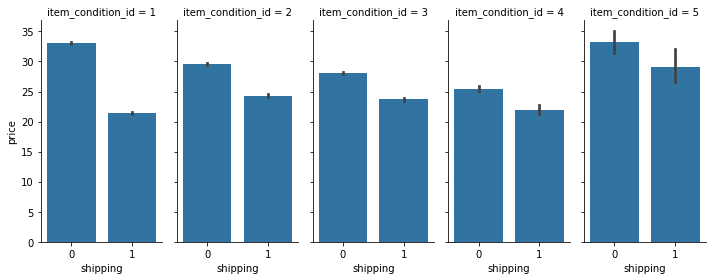

In [101]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col="item_condition_id", height=4, aspect=.5)
g.map(sns.barplot, "shipping", "price", order=[0, 1])
plt.show()

*The conclusion for this graph is supposed to be the same as seen with the Main-categories. The products for which the **shipping charges are paid by the buyer cost more** for every condition id.*

# **10. Item Description**

*There will be a bit more EDA while preprocessing the text data for Item Description and Name. For now, I have considered only the length of the text data.*

## 10.1. Univariate Analysis

In [102]:
# Getting the lengths of item desciptions
item_desc_len = train["item_description"].str.len() 

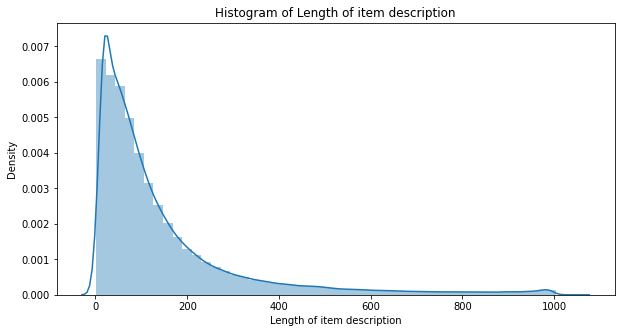

In [103]:
# Code for getting the histogram of length of item description
plt.figure(figsize=(10,5))
sns.distplot(item_desc_len)
plt.xlabel("Length of item description")
plt.ylabel("Density")
plt.title("Histogram of Length of item description")
plt.show()

*Since this graph is right skewed as well and since this data also consists of positive numbers, I have tried out various types of roots and logarithm in the next section.*

## 10.2. Variable Transformations

### 10.2.1. Square Root

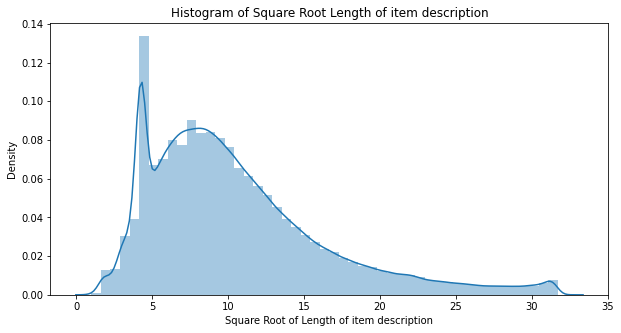

In [104]:
# Code for getting the histogram of sqaure root of length of item description
plt.figure(figsize=(10,5))
sns.distplot(np.power(item_desc_len,0.5))
plt.xlabel("Square Root of Length of item description")
plt.ylabel("Density")
plt.title("Histogram of Square Root Length of item description")
plt.show()

*Since it still looks tapered towards the right let's try out the quadraroot.*

### 10.2.2. Quadra Root

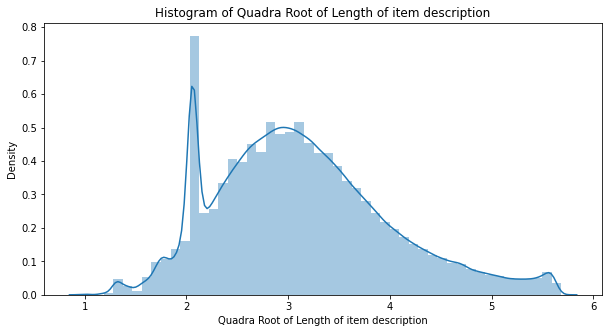

In [105]:
# Code for getting the histogram of quadra root of length of item description
plt.figure(figsize=(10,5))
sns.distplot(np.power(item_desc_len,0.25))
plt.xlabel("Quadra Root of Length of item description")
plt.ylabel("Density")
plt.title("Histogram of Quadra Root of Length of item description")
plt.show()

*There is still a slight right skew and so let's see the results w.r.t octaroot.*

### 10.2.3. Octa Root

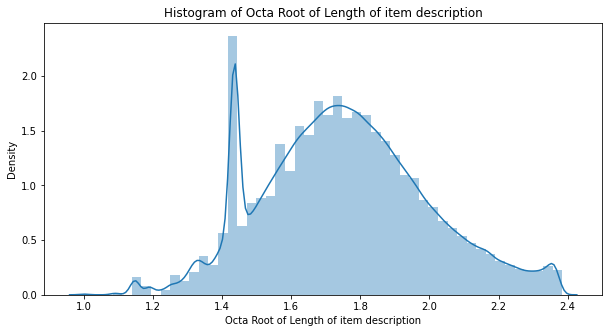

In [106]:
# Code for getting the histogram of octa root of length of item description
plt.figure(figsize=(10,5))
sns.distplot(np.power(item_desc_len,0.125))
plt.xlabel("Octa Root of Length of item description")
plt.ylabel("Density")
plt.title("Histogram of Octa Root of Length of item description")
plt.show()

*Thus the Octa Root's graph looks more or less like a multimodal distribution with less skewness. Since it's just the length of the item desription, variable transformation up to this stage might prove enough for further analysis.*

### 10.2.4. Log with Base 10

Let's have a final look at how the logarithm behaves for the same.

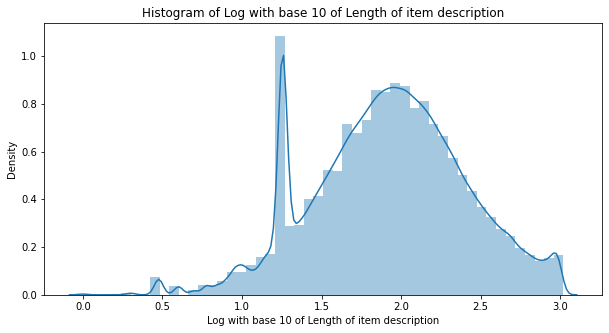

In [107]:
# Code for getting the histogram of Log with base 10 of length of item description
plt.figure(figsize=(10,5))
sns.distplot(np.log10(item_desc_len))
plt.xlabel("Log with base 10 of Length of item description")
plt.ylabel("Density")
plt.title("Histogram of Log with base 10 of Length of item description")
plt.show()

*Thus over here we can see there's more of a left skew and hence we'll move on with the octaroot of the length.*

In [108]:
# Creating columns accordingly for multi variate analysis
train["item_desc_len"] = item_desc_len
train["item_desc_len_octa"] = np.power(item_desc_len,0.125)

## 10.3. Special character [rm]

Since Mercari had mentioned that they have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]. Let's have a look at how many descriptions have the cleaned label [rm].

In [109]:
# Creating a boolean column where 1 stands for [rm] is present in the description and 0 for the ones which don't have it.
item_rm = []
price_1 = []
price_0 = []
# Replacing NULL values with a dummy string
#train["item_description"] = train["item_description"].fillna(value="No description yet.")

for i in range(len(train["item_description"])):
  if '[rm]' in train["item_description"][i]:
    item_rm.append(1)
    price_1.append(train['price'][i])
  else:
    item_rm.append(0)
    price_0.append(train['price'][i])

train["Item_desc_[rm]_flag"] = item_rm

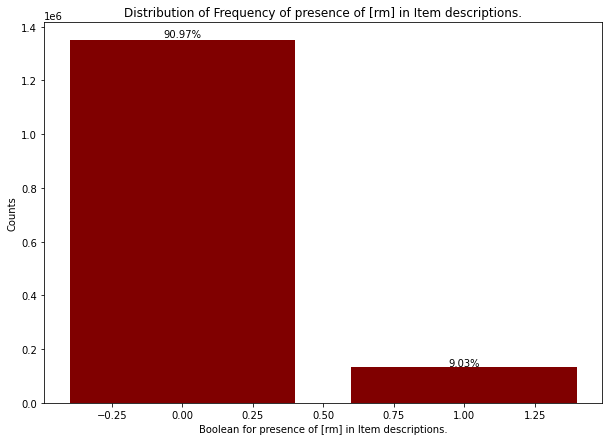

In [110]:
# Creating a dictionary with 1 and 0 as keys and their counts as values
count_item_cond = dict(train["Item_desc_[rm]_flag"].value_counts())
# Getting the total number of items in the train data to calculate the percentages
total = len(train["item_condition_id"])

# Code to output barplot with respect to the above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='maroon',
             width = 0.8) 
plt.xlabel("Boolean for presence of [rm] in Item descriptions.") 
plt.ylabel("Counts") 
plt.title("Distribution of Frequency of presence of [rm] in Item descriptions.")

# Code to print percentages 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

In [111]:
print("Mean price of products which do not have [rm] in them is $",pd.Series(price_0).mean())
print("Mean price of products have [rm] in them is $",pd.Series(price_1).mean())

Mean price of products which do not have [rm] in them is $ 26.22636274596305
Mean price of products have [rm] in them is $ 31.889806884594115


*Most of the item descriptions do not have the [rm] label since there are 90.97% of datapoints. Also the **mean prices** of listings which have **[rm] tag is more**.*

## 10.4. Item Description Length vs. Categorical Features

Let's see how item description length matters with categorical features.

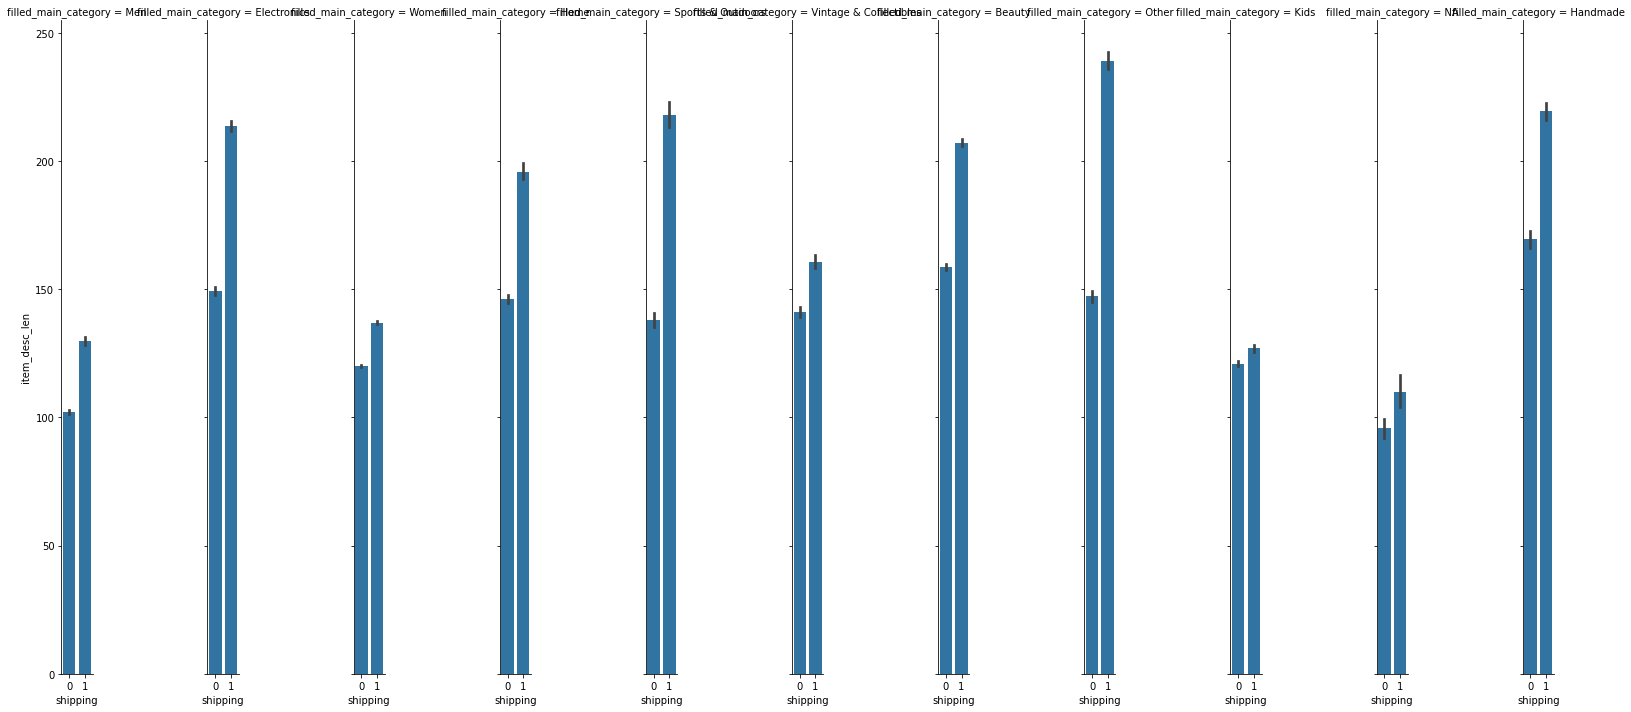

In [112]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col="filled_main_category", height=10, aspect=.2)
g.map(sns.barplot, "shipping", "item_desc_len", order=[0, 1])
plt.show()

*Well Item Description's length is behaving pretty much contrast in this case w.r.t. price. If the **item description length is more**, then the likelihood of the **shipping charges paid by the seller** is more for all categories. Considering price, it was w.r.t shipping charges paid by the buyer.*

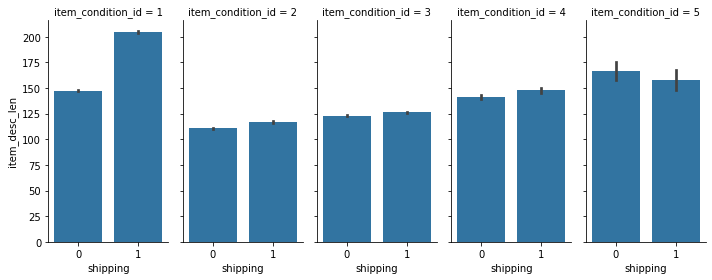

In [113]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col="item_condition_id", height=4, aspect=.5)
g.map(sns.barplot, "shipping", "item_desc_len", order=[0, 1])
plt.show()

*There's not much to conclude here as the listings with item condition id as 1 only have a drastic difference of item description length.*

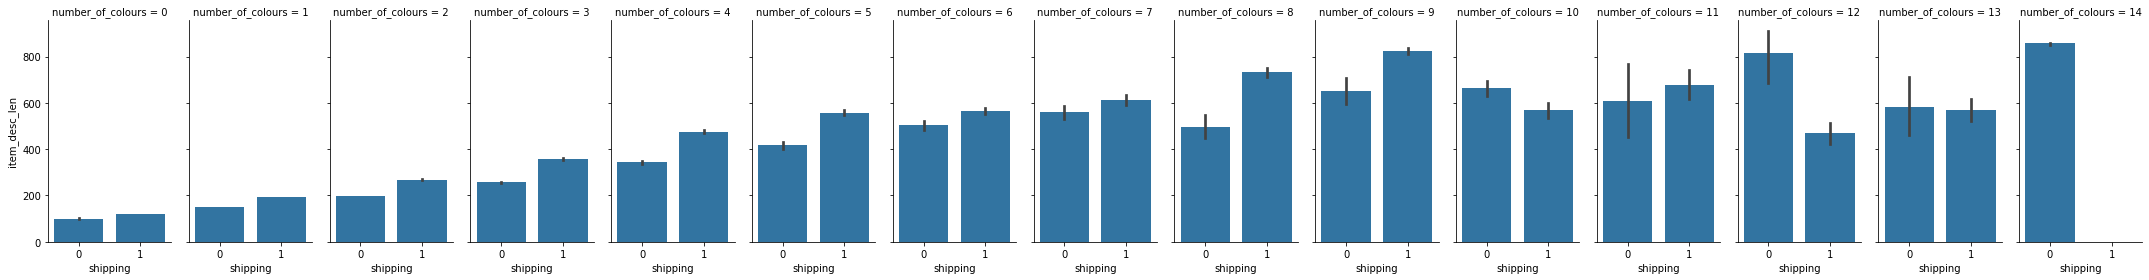

In [114]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col='number_of_colours', height=4, aspect=.5)
g.map(sns.barplot, "shipping", "item_desc_len", order=[0, 1])
plt.show()

*Wow, this graph gives an interesting insight. As the **number of colours increases**, the **length of the item description also increases**.*

## 10.5. Item Description Length vs. Price

*This analysis gives inferences about the relationship between the continuous variables.*

Reference - https://ssc.wisc.edu/sscc/pubs/DWE/book/3-2-relationships-between-two-continuous-variables.html

			GG-Plot of price vs item_desc_len


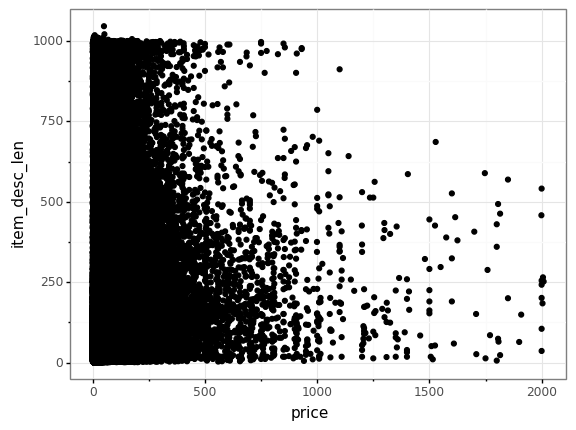

<ggplot: (-9223363296797515618)>


In [115]:
warnings.filterwarnings('ignore')
print("\t\t\tGG-Plot of price vs item_desc_len")
print(
    p9.ggplot(train, p9.aes(x='price', y='item_desc_len')) + 
    p9.geom_point() +
    p9.theme_bw())

*With this ggplot we can conclude that **more the item description length** is, **less the prices** are.*

# **11. Name**

## 11.1. Univariate Analysis

In [116]:
item_name_len = train["name"].str.len() 

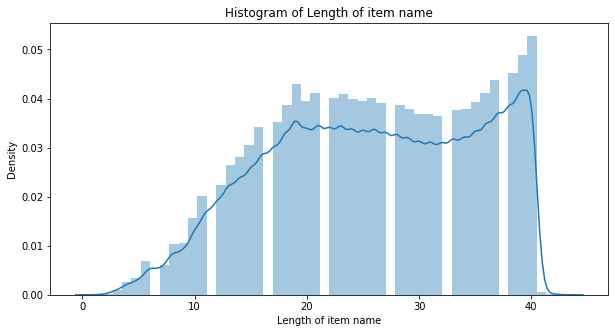

In [117]:
# Code for getting the histogram of length of listing's name
plt.figure(figsize=(10,5))
sns.distplot(item_name_len)
plt.xlabel("Length of item name")
plt.ylabel("Density")
plt.title("Histogram of Length of item name")
plt.show()

##Brands
##Categories

*This histogram is pretty weird. But over here there is a bit of left skew and hence let's try out some tranformations.*

## 11.2. Variable Transformations

### 11.2.1. Squares

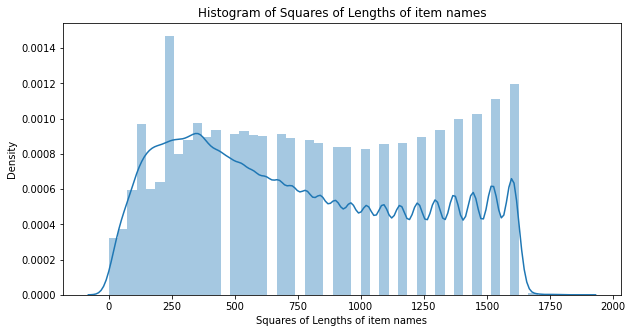

In [118]:
# Code for getting the histogram squares of lengths of listing's name
plt.figure(figsize=(10,5))
sns.distplot(np.power(item_name_len,2))
plt.xlabel("Squares of Lengths of item names")
plt.ylabel("Density")
plt.title("Histogram of Squares of Lengths of item names")
plt.show()

### 11.2.2. Square Root

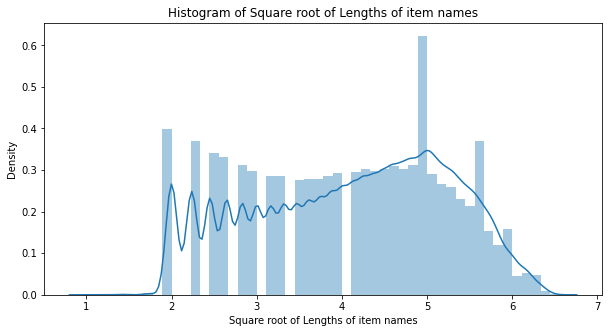

In [119]:
# Code for getting the histogram of square root of length of listing's name
# (Based on the reference provided below)
# Reference - https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r/
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(max(item_name_len+1)-item_name_len))
plt.xlabel("Square root of Lengths of item names")
plt.ylabel("Density")
plt.title("Histogram of Square root of Lengths of item names")
plt.show()

### 11.2.3. Transformations Analysis

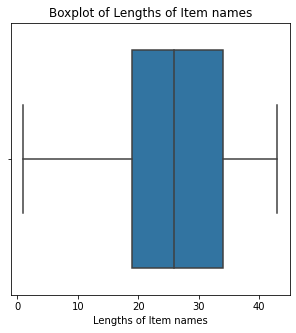

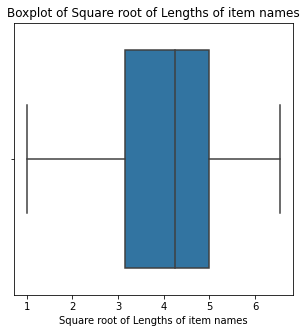

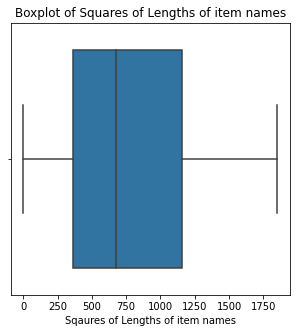

In [120]:
#Code for getting the boxplots of various transformations as provided above
plt.figure(figsize=(5,5))
sns.boxplot(item_name_len,orient='vertical')
plt.xlabel("Lengths of Item names")
plt.title("Boxplot of Lengths of Item names")
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(np.sqrt(max(item_name_len+1)-item_name_len),orient='vertical')
plt.xlabel("Square root of Lengths of item names")
plt.title("Boxplot of Square root of Lengths of item names")
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(np.power(item_name_len,2),orient='vertical')
plt.xlabel("Sqaures of Lengths of item names")
plt.title("Boxplot of Squares of Lengths of item names")
plt.show()

*Since the Inter Quartile Range and the median are more center-set in the case of square root of the lengths, it's better to consider that for further analysis as well as for feature engineering.*

In [121]:
# Creating columns for multivariate analysis
train["item_name_len"] = item_name_len
train["item_name_len_sqrt"] = np.sqrt(max(item_name_len+1)-item_name_len)

## 11.3. Special Character [rm]

*Since Mercari had mentioned that they have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]. Let's have a look at how many listing names have the cleaned label [rm].*

In [122]:
# Creating a boolean column where 1 stands for [rm] is present in the description and 0 for the ones which don't have it.
item_rm = []
price_1 = []
price_0 = []
# Replacing NULL values with a dummy string
#train["item_description"] = train["item_description"].fillna(value="No description yet.")

for i in range(len(train["name"])):
  if '[rm]' in train["name"][i]:
    item_rm.append(1)
    price_1.append(train['price'][i])
  else:
    item_rm.append(0)
    price_0.append(train['price'][i])

train["Name_[rm]_flag"] = item_rm

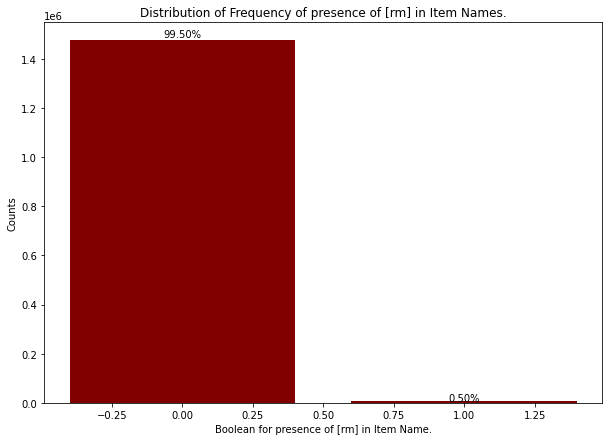

In [123]:
# Creating a dictionary with 1 and 0 as keys and their counts as values
count_item_cond = dict(train["Name_[rm]_flag"].value_counts())
# Getting the total number of items in the train data to calculate the percentages
total = len(train["item_condition_id"])

# Code to output barplot with respect to the above mentioned data
fig = plt.subplots(figsize =(10, 7)) 
ax = plt.bar(count_item_cond.keys(),
             count_item_cond.values(),
             color ='maroon',
             width = 0.8) 
plt.xlabel("Boolean for presence of [rm] in Item Name.") 
plt.ylabel("Counts") 
plt.title("Distribution of Frequency of presence of [rm] in Item Names.")

# Code to print percentages 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.2%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')
plt.show()

*Thus, as compared to the item description column, the listing names' column have much less percentage of the [rm] label.*

In [124]:
print("Mean price of products which do not have [rm] in them is $",pd.Series(price_0).mean())
print("Mean price of products have [rm] in them is $",pd.Series(price_1).mean())

Mean price of products which do not have [rm] in them is $ 26.739142077521482
Mean price of products have [rm] in them is $ 26.416018766756032


*As compared to item description length, there's not much noticable difference between the mean prices.*

## 11.4. Item Name Length vs. Categorical Features

Let's see how item name length matters with categorical features.

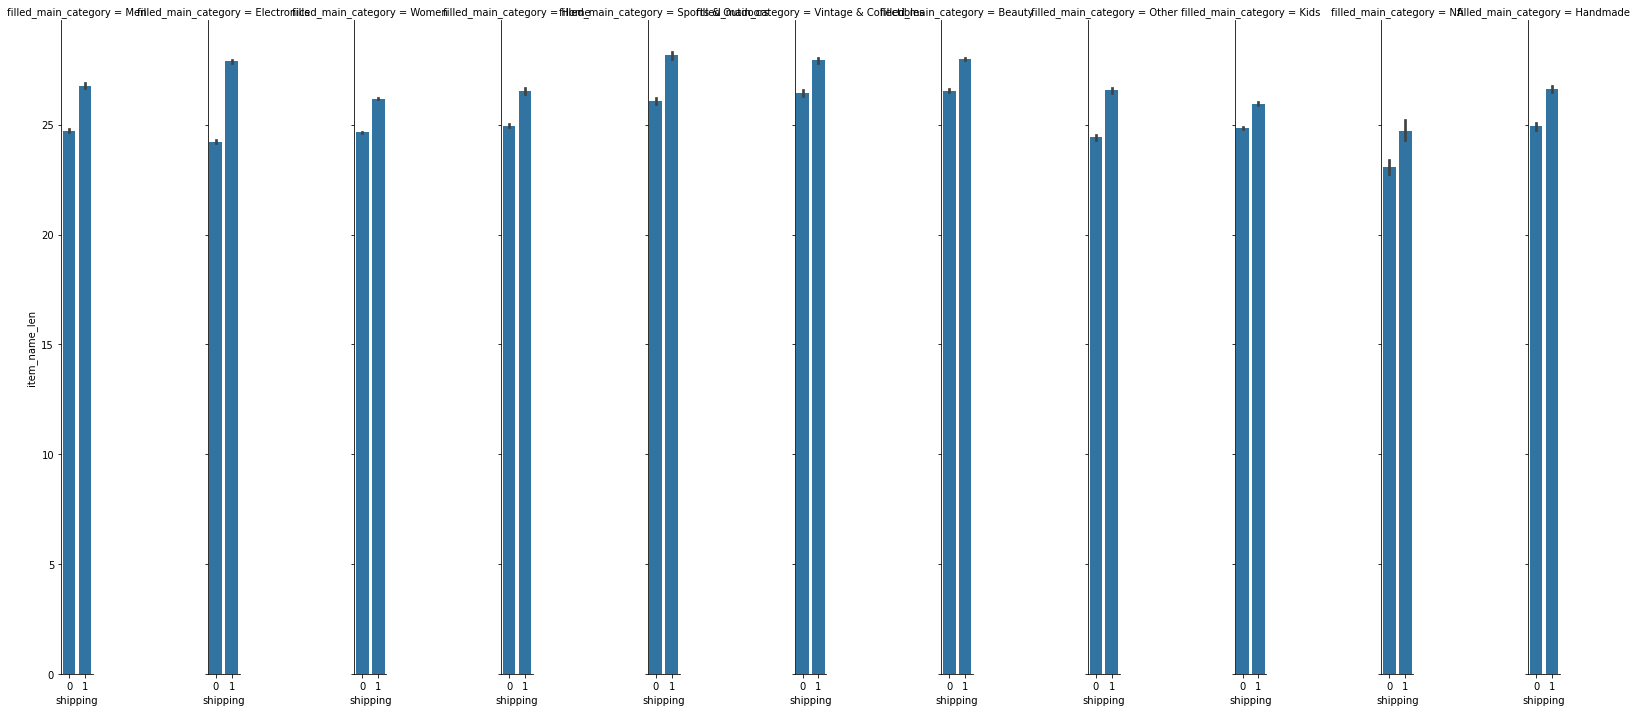

In [125]:
# Reference - https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(train, col="filled_main_category", height=10, aspect=.2)
g.map(sns.barplot, "shipping", "item_name_len", order=[0, 1])
plt.show()

*Just like the item description length, **more the length of the item name** is, more is the likelihood for the shipping charges to be **paid by the seller**.*

Since colours and item condition id gave the same insights, I did not print them again.

## 11.5. Item name Length vs. Price

		GG-Plot of price vs item_name_len


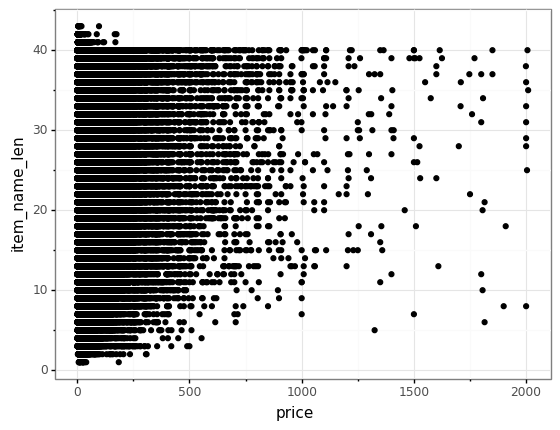

<ggplot: (-9223363296799437445)>


In [126]:
warnings.filterwarnings('ignore')
print("\t\tGG-Plot of price vs item_name_len")
print(
    p9.ggplot(train, p9.aes(x='price', y='item_name_len')) + 
    p9.geom_point() +
    p9.theme_bw())

*So, **more the item name length** is, **more the prices of the products** are.*

# **12. Continuous variables' distributions analysis**

*This analysis is done to test which features might be reduntant.*

This is a kurtosis test to measure the tailedness of the distributions.

In [127]:
# https://www.quora.com/What-does-a-negative-kurtosis-indicates
train["transformed_price"] = np.power(train["price"],0.125)
train[["price",
       "transformed_price",
       "item_desc_len",
       "item_desc_len_octa",
       "item_name_len",
       "item_name_len_sqrt"]].kurtosis()

price                 283.821669
transformed_price       6.404159
item_desc_len           7.029136
item_desc_len_octa     -0.220114
item_name_len          -0.974660
item_name_len_sqrt     -1.001960
dtype: float64

*Thus, the main takeaway here is that variable transformations have worked out wonders in the case of the item description length as well as the price even though it is a target variable. Negative kurtosis value indicates that the distribution has lighter tails and the Positive kurtosis indicates the other way around.*

These are the QQ plots which give some meaningful insights

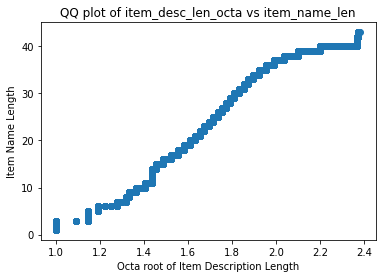

In [128]:
plt.scatter(np.sort(train['item_desc_len_octa']), np.sort(train['item_name_len']))
plt.xlabel('Octa root of Item Description Length')
plt.ylabel('Item Name Length')
plt.title('QQ plot of item_desc_len_octa vs item_name_len')
plt.show()

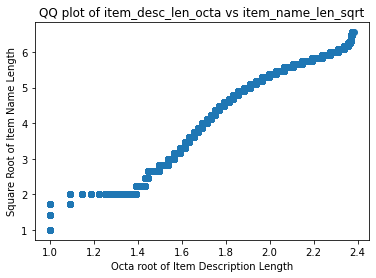

In [129]:
plt.figure()
plt.scatter(np.sort(train['item_desc_len_octa']), np.sort(train['item_name_len_sqrt']))
plt.xlabel('Octa root of Item Description Length')
plt.ylabel('Square Root of Item Name Length')
plt.title('QQ plot of item_desc_len_octa vs item_name_len_sqrt')
plt.show()
plt.close()

*In conclusion, Octa root of Item Description Length and Item Name Length have almost the same distributions and might be redundant features if scales aren't a major concern. In the second plot though, we can see the relationship isn't that much.*

# **13. Categorical features vs Mean of continuous features**

*From this analysis, the conclusion is that usually if the **price is more**, the **item description length is less** in most of the cases.*

In [130]:
# Reference - https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=catego
train[["filled_main_category", 
       "price", 
       "transformed_price",
       "item_desc_len",
       "item_desc_len_octa",
       "item_name_len",
       "item_name_len_sqrt"]].groupby("filled_main_category").mean()

,price,transformed_price,item_desc_len,item_desc_len_octa,item_name_len,item_name_len_sqrt
filled_main_category,,,,,,
Beauty,19.672382,1.410180,188.263412,1.801937,27.429076,3.911584
Electronics,35.173750,1.450176,186.972663,1.790380,26.363050,4.030802
Handmade,18.154846,1.369866,200.055309,1.821716,25.963160,4.089855
Home,24.545016,1.446804,160.277265,1.760739,25.405693,4.163242
Kids,20.642142,1.412503,123.402735,1.725415,25.294801,4.174599
Men,34.658833,1.493991,111.604141,1.707430,25.433523,4.152388
NA,25.555740,1.437019,100.883053,1.680609,23.680594,4.368974
Other,20.809897,1.402321,196.441023,1.800358,25.571710,4.137130
Sports & Outdoors,25.533718,1.443708,173.408684,1.776435,27.004141,3.956041


In [131]:
# Reference - https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=catego
train[["shipping", 
       "price", 
       "item_desc_len",
       "item_desc_len_octa",
       "item_name_len",
       "item_name_len_sqrt"]].groupby("shipping").mean()

,price,item_desc_len,item_desc_len_octa,item_name_len,item_name_len_sqrt
shipping,,,,,
0,30.111778,128.241501,1.734476,24.924114,4.222363
1,22.567726,167.300100,1.775844,26.851977,3.977857


In [132]:
# Reference - https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=catego
train[["item_condition_id", 
       "price", 
       "item_desc_len",
       "item_desc_len_octa",
       "item_name_len",
       "item_name_len_sqrt"]].groupby("item_condition_id").mean()

,price,item_desc_len,item_desc_len_octa,item_name_len,item_name_len_sqrt
item_condition_id,,,,,
1,26.486967,179.630378,1.785267,27.532556,3.893671
2,27.563225,112.984601,1.715133,24.428961,4.285231
3,26.540711,123.945972,1.736423,24.575279,4.264729
4,24.349212,143.363838,1.770868,23.331644,4.408979
5,31.703859,163.614094,1.799497,22.869547,4.445543


# **14. Feature Correlation**

This analysis is done to find the correlation between various features. The analysis is done using both the Pearson as well as Spearman coefficients.

Since the data has monotonic relationships as seen in the section 4.7., Spearman rank coefficient could work wonders in this case. Since there is an ordinal variable named condition_id, it might be useful to draw conclusions for the purpose of filling missing values into the respective columns with missing values.

The Pearson's correlation coefficient works well in finding linear reltionships between variables. Since the target variable is continuous this coefficient is useful here.

Reference - https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

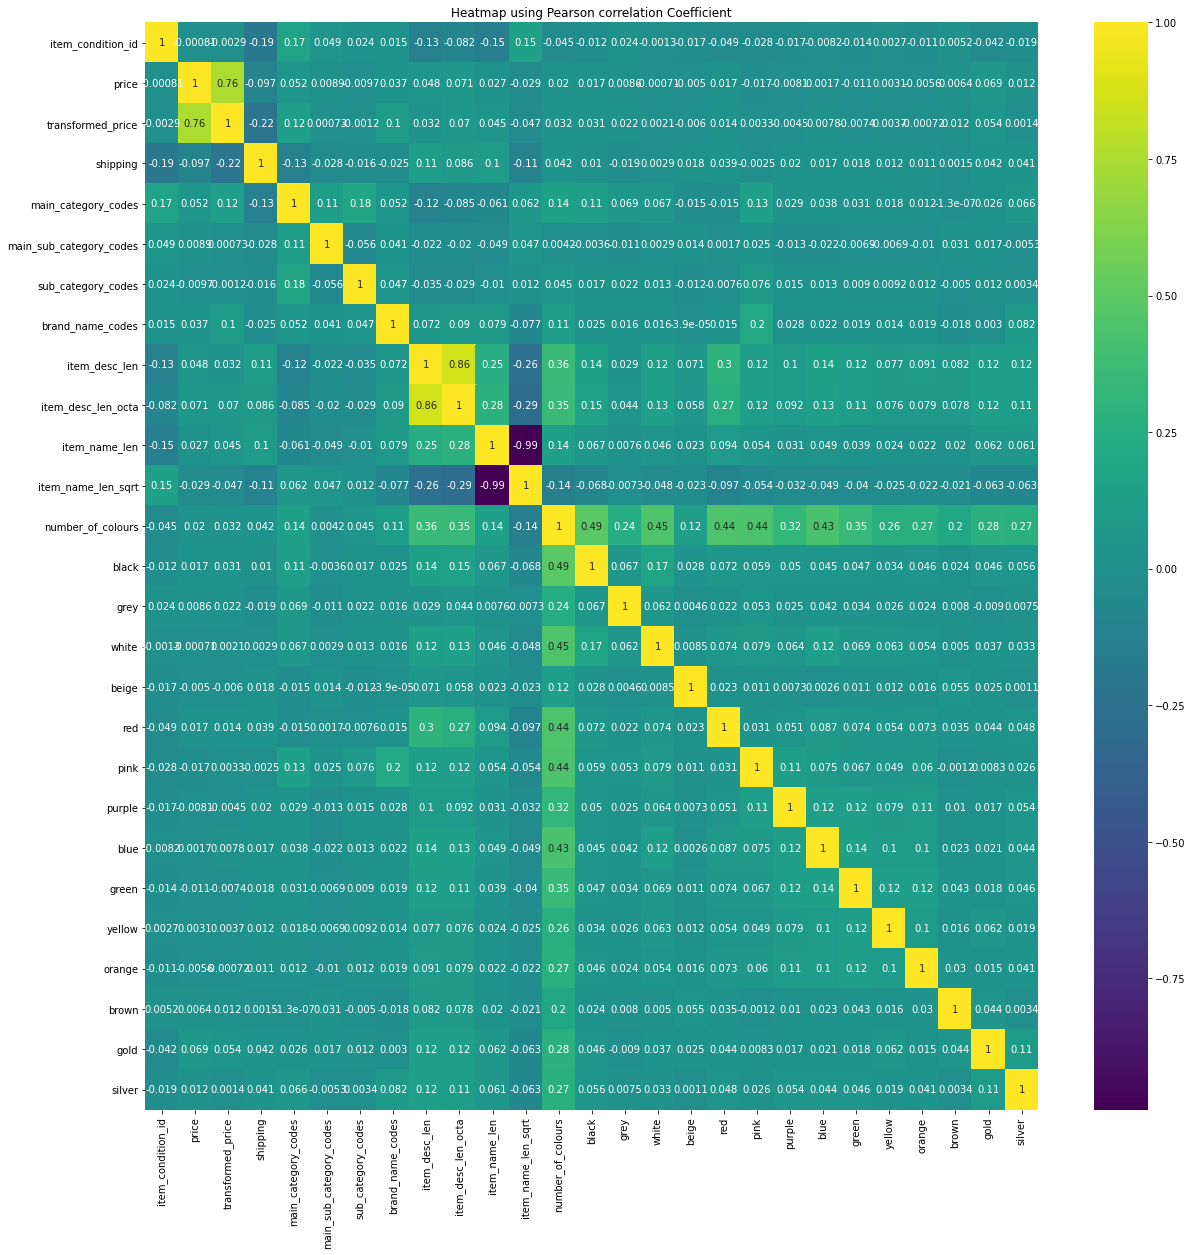

In [133]:
plt.figure(figsize=(20,20))
# Reference - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(train[["item_condition_id", 
                   "price", 
                   "transformed_price",
                   "shipping", 
                   "main_category_codes",
                   "main_sub_category_codes",
                   "sub_category_codes",
                   "brand_name_codes",
                   "item_desc_len",
                   "item_desc_len_octa",
                   "item_name_len",
                   "item_name_len_sqrt",
                   "number_of_colours",
                   "black",
                   "grey",
                   "white",
                   "beige",
                   "red",
                   "pink",
                   "purple",
                   "blue",
                   "green",
                   "yellow",
                   "orange",
                   "brown",
                   "gold",
                   "silver"]].corr(), 
            annot = True, 
            cmap = 'viridis')

plt.title("Heatmap using Pearson correlation Coefficient")
plt.show()

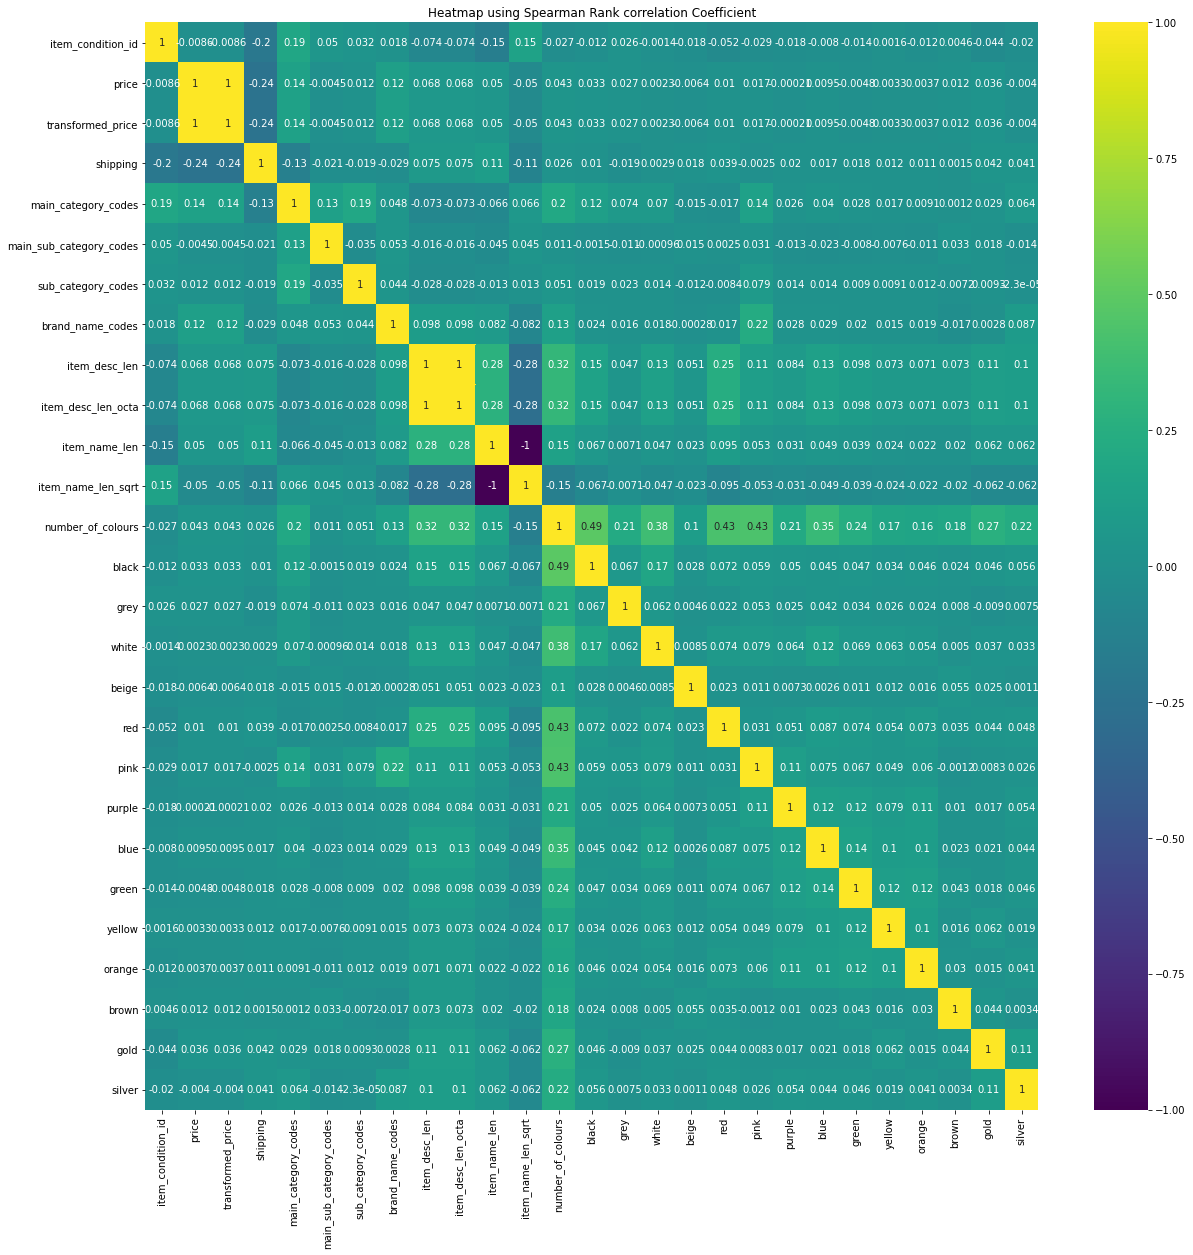

In [134]:
plt.figure(figsize=(20,20))
# Reference - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(train[["item_condition_id", 
                   "price", 
                   "transformed_price",
                   "shipping", 
                   "main_category_codes",
                   "main_sub_category_codes",
                   "sub_category_codes",
                   "brand_name_codes",
                   "item_desc_len",
                   "item_desc_len_octa",
                   "item_name_len",
                   "item_name_len_sqrt",
                   "number_of_colours",
                   "black",
                   "grey",
                   "white",
                   "beige",
                   "red",
                   "pink",
                   "purple",
                   "blue",
                   "green",
                   "yellow",
                   "orange",
                   "brown",
                   "gold",
                   "silver"]].corr(method='spearman'), 
            annot = True, 
            cmap = 'viridis')

plt.title("Heatmap using Spearman Rank correlation Coefficient")
plt.show()

*Thus these heatmaps give very interesting insights :*

*After the missing value imputations of **brands** and **categories** things if improved quite a lot! **Main_category_codes** and **brand_name_codes** are highly correlated with the prices. The colours too show higher positive correlation with the prices.*

*There's also a surprisingly **high correlation** of **colours** with the **item description's length and the octa root** of it as well! Whereas **item condition id** and **shipping** somewhat show **positive correlation** with **item name's length and its transformation**.*

*There's positive correlation between **gold and silver** as well depicting the actual metal or the colours' relation.*

# **15. Final Conclusion**



1.   There are **1482535 datapoints** with **8 columns**.
2.   The metric to be used is **RMSLE**.
3.   There are **majority** of products with the **condition id** as '1' which is **'New'** and there **aren't many** listings present in the dataset with condition ids as 4 and 5 which are in the **'Fair'** and **'Poor'** state.
4.   **Most** of the listings have the **shipping** charges **paid by the buyer**. Most of the listings with **condition id '1'** have products where the shipping charges are paid by the seller. This could also depict that most of the sellers might have an online market on Mercari where they sell brand new **products along with free shipping**.
5.   **43%** of the datapoints in the **Brands** column are filled with **Nan** values. After the **string based missing value imputation** as done in **6.2**. this percentage came down to **16%**(238448 out of 1482535 datapoints) which is really good. Brands like **"PINK"**, **"LuLaRoe"**, **"Nike"** and **"Victoria's Secret"** still held the highest majority after the imputation. Most of the **Fashion based brands** are **brand new** and the **Electronics based brands** have the **least quality** based on the analysis done with respect to Brands, Item condition id and shipping.
6.   **0.42%** of the datapoints in the **category** column are filled with **Nan** values. There are 3 types of categories namely **"Main Categories"**, **"Main Sub-Categories"** and **"Sub-Categories"**. Based on the Main Categories analysis **Women Based listings** have the **highest majority**. During the missing value imputation of the Main Categories, it was observed that while doing the missing value imputations for brands, the brand **"PINK"** might have been misinterpretated as a **colour instead for the brand** itself for most of the listings. There was a noteworthy difference of missing value imputations with respect to the **Sub-categories** as it was left only with **64 Nan values** after the imputation.
7.   **40%** of the listings in the dataset have **colours** in them. **Black**, **pink** and **red** colours have the highest majority and the products which have **condition id as 1** as well as those which have the category as **Women** have the most colours.
8.   Taking the **8th root** (Octaroot) of the price was the best way to transform the price. **97%** of products have prices **within 2 digits**. In 9.3 it was concluded that \$0-\$50 could be the most affordable category and so I considered the products which have **mean prices above \$50** belonging to the **Premium Brand category**. **Apple**, **Louis Vuitton** and **Chanel** have the most number of listings with **prices above \$750**. The **shipping charges paid by the buyer cost more** for every type of category. Thus this might prove **profitable for the seller** since they do not have to pay for the shipping charges. **Gold** and **silver** have higher prices. Since the colours are manipulated by string comparison it could even happen that **Gold and Silver** might be **actual metals** rather than the **colours** and so they cost more.
The colour **pink** is pretty famous with the **non-premium brands**. Rest of the colours have pretty much the same distribution with both the brand types.
9.   Mercari had mentioned that they have cleaned the texts that look like prices (e.g. \$20) to avoid leakage. The **mean prices** of listings which have **[rm] tag in the item description** is more. If the **item description length** is **more**, then the likelihood of the **shipping charges paid by the seller** is **more**. Also, **more** the **item description length** is, **less** the **prices** are.
10.   Just like the item description length, **more the length of the item name** is, more is the likelihood for the **shipping charges to be paid by the seller**. But **more the item name length** is, **more the prices of the products** are.
11.   **Octa root of Item Description Length** and **Item Name Length** have almost the same distributions and might be redundant features as analyzed in section **12.**.
12.   **Main_category_codes** and **brand_name_codes** are highly correlated with the **prices**. The **colours** too show higher positive correlation with the prices.